# 1 Imports and initial configurations

In [102]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import numpy  as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set_style('ticks')
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

from scipy.special import kl_div

from astropy.coordinates import SkyCoord
import astropy.units as u

from tqdm.auto import tqdm

In [112]:
# Plot visual settings
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

thesis_settings = {
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "font.size": 9,
    "axes.labelsize": "medium",
    "axes.titlesize": "medium",
    "figure.labelsize": "medium",
    "figure.titlesize": "medium",
    # Make the legend/label fonts a little smaller
    "legend.fontsize": "small",
    "legend.title_fontsize": "small",
    "xtick.labelsize": "small",
    "ytick.labelsize": "small",
    # Enable axis grids
    "axes.grid": True,
    "grid.alpha": 0.5,
    # Constrained layout
    "figure.constrained_layout.use": True, # When this in True, do not use tight_layout
    "savefig.transparent": True,
}
plt.rcParams.update(thesis_settings)

width = 455.24411
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [116]:
dark_mode = True

if dark_mode == True:
    #If the plots are to be used in a dark presentation
    plt.style.use('default') 
    default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    plt.style.use("dark_background")
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=default_colors)

    plt.rcParams.update(thesis_settings)
    
    plt.rcParams.update({
        # "lines.color": "white",
        # "patch.edgecolor": "white",
        # "text.color": "white",
        #"axes.facecolor": "#1a1a1a",
        # "axes.facecolor": "white",
        # "axes.edgecolor": "lightgray",
        # "axes.labelcolor": "white",
        "grid.linewidth": 0.5,
        "grid.alpha": 0.5,
        # "grid.color": "lightgray",
        # "xtick.color": "black",
        # "ytick.color": "white",
        # "figure.facecolor": "red",
        # "figure.edgecolor": "blue",
        #"savefig.facecolor": "(0.0, 0.0, 1.0, 0.0)",
        #"savefig.facecolor": "yellow",
        #"savefig.edgecolor": "green"
        "legend.facecolor": "#1a1a1a",
        "legend.edgecolor": "white",
        'text.color': 'white',
        })
    
    bbox = dict(facecolor='#1a1a1a', edgecolor='white', lw=0.5, boxstyle='round,pad=0.2')
    
    details_colour = 'white'

In [114]:
saveformat = 'pdf' # 'svg'

# 2 Plots

## 2.1 Transmission curves

In [4]:
# SPLUS
names_SPLUS = ['u', 'J0378', 'J0395', 'J0410', 'J0430', 'g', 'J0515', 'r', 'J0660', 'i', 'J0861', 'z']
curve_files_SPLUS = [s for s in os.listdir('_data/transmission_curves/SPLUS/')]
curves_SPLUS = {}
for file in curve_files_SPLUS:
    curves_SPLUS[file.replace('.F', '.J0').split('.')[1]] = pd.read_csv(f'_data/transmission_curves/SPLUS/{file}', header=None, sep='\s+')

# WISE
names_WISE = ['W1', 'W2']
curve_files_WISE = [s for s in os.listdir('_data/transmission_curves/WISE/')]
curves_WISE = {}
for file in curve_files_WISE:
    curves_WISE[file.split('.')[1]] = pd.read_csv(f'_data/transmission_curves/WISE/{file}', header=None, sep='\s+')
    
# VHS
names_VHS = ['Y', 'J', 'H', 'Ks']

curve_files_VHS = [s for s in os.listdir('_data/transmission_curves/VHS/')]

curves_VHS = {}
for file in curve_files_VHS:
    curves_VHS[file.replace('VISTA_Filters_at80K_forETC_', '').replace('.dat', '')] = pd.read_csv(f'_data/transmission_curves/VHS/{file}', header=None, sep='\s+')

# GALEX
names_GALEX = ['FUV', 'NUV']

curve_files_GALEX = [s for s in os.listdir('_data/transmission_curves/GALEX/')]

curves_GALEX = {}
for file in curve_files_GALEX:
    curves_GALEX[file.split('_')[1].split('.')[0]] = pd.read_csv(f'_data/transmission_curves/GALEX/{file}', header=None, sep='\s+')

: 

In [13]:
from matplotlib.backends.backend_pgf import FigureCanvasPgf

: 

G:\Temp\ipykernel_16944\732706437.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{s:0.0f}" for s in ax.get_xticks()/1000])


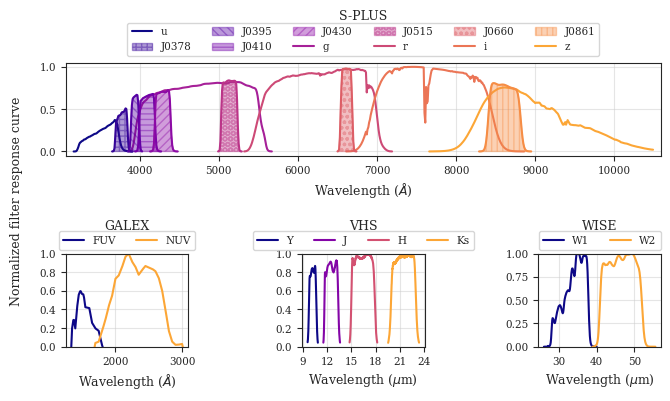

: 

In [49]:
fig = plt.figure(figsize=set_size(width, subplots=(2, 2)))
gs  = gridspec.GridSpec(2, 3, figure=fig, hspace=0.1)

# SPLUS
ax = fig.add_subplot(gs[0, :])

n = 12
colors = plt.cm.plasma(np.linspace(0,0.8,n))

dashes  = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]
hatches = [None, '+++', '\\\\\\\\', '---', '////', None, 'OOO', None, 'ooo', None, '|||', None]

for i, name in enumerate(names_SPLUS):
    if ('J0' not in name):
        ax.plot(curves_SPLUS[name][0], curves_SPLUS[name][1]/np.max(curves_SPLUS['i'][1]), 
                color=colors[i], label=name)
    else:
        ax.plot(curves_SPLUS[name][0], curves_SPLUS[name][1]/np.max(curves_SPLUS['i'][1]), 
                zorder=10, color=colors[i])
        ax.fill_between(curves_SPLUS[name][0], y1=0, y2=curves_SPLUS[name][1]/np.max(curves_SPLUS['i'][1]), 
                        zorder=10, color=colors[i], hatch=hatches[i], alpha=0.4, label=name, rasterized=True)
        
ax.set_xlim(curves_SPLUS['u'][0].min()-100, curves_SPLUS['z'][0].max()+100)
ax.text(0.5, 1.5, 'S-PLUS', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.legend(loc='center', ncols=6, handlelength=2, bbox_to_anchor=(0.5, 1.25))
ax.set_xlabel('Wavelength ($\AA$)')
ax.grid(True)

# GALEX
ax = fig.add_subplot(gs[1, 0])
n = 2
colors = plt.cm.plasma(np.linspace(0,0.8,2))
for i, name in enumerate(names_GALEX):
    ax.plot(curves_GALEX[name][0], curves_GALEX[name][1]/np.max(curves_GALEX['NUV'][1]), color=colors[i], label=name)
ax.text(0.5, 1.3, 'GALEX', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.legend(loc='center', ncols=2, handlelength=2, bbox_to_anchor=(0.5, 1.14))
ax.set_ylim(0, 1.0)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xlabel('Wavelength ($\AA$)')
ax.grid(True)

# VHS
ax = fig.add_subplot(gs[1, 1])
n = 4
colors = plt.cm.plasma(np.linspace(0,0.8,n))
for i, name in enumerate(names_VHS):
    cond = (curves_VHS[name][1] > 4)
    ax.plot(curves_VHS[name][cond][0]*10, curves_VHS[name][cond][1]/np.max(curves_VHS['H'][1]), color=colors[i], label=name)
ax.text(0.5, 1.3, 'VHS', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.legend(loc='center', ncols=4, handlelength=2, bbox_to_anchor=(0.5, 1.14))
ax.set_ylim(0, 1.0)
ax.set_xticks(np.arange(9000, 25000, 3000))
ax.set_xticklabels([f"{s:0.0f}" for s in ax.get_xticks()/1000])
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xlabel('Wavelength ($\mu$m)')
ax.grid(True)

# unWISE
ax = fig.add_subplot(gs[1, 2])
n = 2
colors = plt.cm.plasma(np.linspace(0,0.8,n))
for i, name in enumerate(names_WISE):
    ax.plot(curves_WISE[name][0], curves_WISE[name][1], color=colors[i], label=name)
ax.text(0.5, 1.3, 'WISE', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.legend(loc='center', ncols=2, handlelength=2, bbox_to_anchor=(0.5, 1.14))
ax.set_ylim(0, 1.0)
ax.set_xticklabels([f"{s:0.0f}" for s in ax.get_xticks()/1000])
ax.set_xlabel('Wavelength ($\mu$m)')
ax.grid(True)

fig.text(-0.04, 0.5, 'Normalized filter response curve', va='center', rotation='vertical')

plt.savefig(f'images/transmission_curves.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

## 2.2 Spectroscopic data

In [ ]:
specz_data = pd.read_csv('../../thesis_scripts/_data/specz_compilation_20240620.csv')

G:\Temp\ipykernel_4120\3186143915.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  specz_data = pd.read_csv('../../thesis_scripts/_data/specz_compilation_20240620.csv')


: 

### 2.2.1 All-sky plot

In [6]:
def plot_square_path(center_ra, center_dec, size, plot_kwargs={}, ax=None):
    if ax is None:
        ax = plt.gca()
    
    size_x = size/np.cos(center_dec)
    size_y = size

    patch = mpatches.Rectangle((center_ra-size, center_dec-size), size_x, size_y, **plot_kwargs)
    ax.add_patch(patch)

def plot_square_path_cartesian(center_ra, center_dec, size, plot_kwargs={}, ax=None):
    if ax is None:
        ax = plt.gca()
    
    size_x = size
    size_y = size

    patch = mpatches.Rectangle((center_ra-size, center_dec-size), size_x, size_y, **plot_kwargs)
    ax.add_patch(patch)

: 

In [7]:
# AllSky Object Coords
gal_cond = specz_data['class_spec'].str.contains('GALAXY')
gal_coords = SkyCoord(ra=specz_data[gal_cond]['RA'], 
                      dec=specz_data[gal_cond]['DEC'], 
                      radial_velocity=specz_data[gal_cond]['z'], 
                      unit=u.deg)

mw_line = SkyCoord(l=np.linspace(0, 360, 1000), 
                   b=np.zeros(1000), 
                   unit=u.deg, 
                   frame='galactic')
mw_line = mw_line.transform_to('icrs')

: 

In [8]:
# Calculations and stuff for plots
# Load and process field lists
all_splus_footprint = pd.read_csv('../../thesis_scripts/_data/all_splus_current.csv')
idr5_splus_footprint = pd.read_csv('../../thesis_scripts/_data/iDR5_pointings.csv')
idr5_splus_footprint = idr5_splus_footprint[idr5_splus_footprint['Photometry'] == 'aperture']

idr5_splus_footprint['Field'] = idr5_splus_footprint['Field'].str.replace('STRIPE82-', 'STRIPE82_')
idr5_splus_footprint['Field'] = idr5_splus_footprint['Field'].str.replace('HYDRA-', 'HYDRA_')
idr5_splus_footprint['Field'] = idr5_splus_footprint['Field'].str.replace('HYDRA_D-', 'HYDRA_D_')

all_fields  = all_splus_footprint['NAME'].unique()
idr5_fields = idr5_splus_footprint['Field'].unique()

non_observed = np.setdiff1d(all_fields, idr5_fields)

all_splus_footprint = all_splus_footprint[all_splus_footprint['NAME'].isin(non_observed)]

: 

#### 2.2.1.1 With/without spectroscopic data

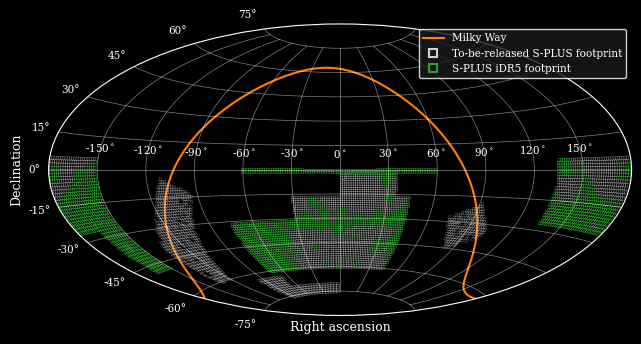

: 

In [ ]:
plot_with_spec = False

# Plot All-Sky
random_indexes = np.arange(0, len(gal_coords))
np.random.shuffle(random_indexes)

# Plot All-Sky
fig, ax = plt.subplots(1, 1, figsize=set_size(width), subplot_kw=dict(projection='aitoff'))

if plot_with_spec:
    scatter = plt.scatter(-gal_coords.ra.wrap_at('180d').radian[random_indexes], 
                        gal_coords.dec.radian[random_indexes], 
                        c=gal_coords.radial_velocity[random_indexes],
                        marker='.',
                        cmap='inferno_r', vmin=0, vmax=1, zorder=0, s=1, alpha=1, label='Sample (galaxies only)',
                        edgecolors='none', rasterized=True)

sorted_gal_idx = np.argsort(mw_line.ra.wrap_at('180d').radian)
plt.plot(-mw_line.ra.wrap_at('180d').radian[sorted_gal_idx], mw_line.dec.radian[sorted_gal_idx], 
         color='C1', label='Milky Way', zorder=-1)

# Do plots
non_obs_foot_coord = SkyCoord(ra=all_splus_footprint['RA'], dec=all_splus_footprint['DEC'], unit=(u.hour, u.deg), frame='icrs')
for obj in non_obs_foot_coord:
    plot_square_path(-obj.ra.wrap_at('180d').radian, obj.dec.radian, 1.4*np.pi/180,
                     plot_kwargs={'edgecolor':'lightgray', 'facecolor':'none', 'lw':0.4, 'alpha':0.4, 'rasterized':True}, ax=ax)
    
idr5_foot_coord = SkyCoord(ra=idr5_splus_footprint['RA'], dec=idr5_splus_footprint['DEC'], unit=(u.hour, u.deg), frame='icrs')
for obj in idr5_foot_coord:
    plot_square_path(-obj.ra.wrap_at('180d').radian, obj.dec.radian, 1.4*np.pi/180,
                     plot_kwargs={'edgecolor':'C2', 'facecolor':'none', 'lw':0.4, 'alpha':0.8, 'rasterized':True}, ax=ax)

# Legend
if plot_with_spec:
    sample_gal = mlines.Line2D([], [], markerfacecolor='yellow', markeredgecolor='none', marker='.', 
                            markeredgewidth=1.5, lw=0, label='Sample (galaxies only)')
milky_way_line = mlines.Line2D([], [], color='C1', label='Milky Way')
to_be_obs      = mlines.Line2D([], [], markerfacecolor='none', markeredgecolor='lightgray', marker='s', 
                          markeredgewidth=1.5, lw=0, label='To-be-released S-PLUS footprint')
idr5_footprint = mlines.Line2D([], [], markerfacecolor='none', markeredgecolor='C2', marker='s', 
                          markeredgewidth=1.5, lw=0, label='S-PLUS iDR5 footprint')

if plot_with_spec:
    plt.legend(handles=[sample_gal, milky_way_line, to_be_obs, idr5_footprint], loc='upper right')
else:
    plt.legend(handles=[milky_way_line, to_be_obs, idr5_footprint], loc='upper right')

# plt.xticks(np.array([-150+10, -120+5, -90+2.5, -60+1.5, -30, 0, 30, 60-1.5, 90-2.5, 120-5, 150-10])*np.pi/180, 
#            [s+'\n\n' for s in ['150$^\circ$', '120$^\circ$', '90$^\circ$', '60$^\circ$', '30$^\circ$', '0$^\circ$', 
#             '-30$^\circ$', '-60$^\circ$', '-90$^\circ$', '-120$^\circ$', '-150$^\circ$']],
#             zorder=10)

ax.set_xticklabels([])
xticks = [-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]
for xtick in xticks:
    plt.text(xtick*np.pi/180, 10*np.pi/180, f'{xtick}$^\circ$', ha='center', va='center', fontsize='small', zorder=10)

if plot_with_spec:
    cbar = plt.colorbar(scatter, label='Spectroscopic redshift', fraction=0.025, pad=0.04, extend='max')
    cbar.solids.set(alpha=1)
    cbar.ax.set_yticks(cbar.ax.get_yticks())
    cbar.ax.tick_params()

plt.ylabel('Declination')
plt.xlabel('Right ascension')
plt.grid(True)

if plot_with_spec:
    plt.savefig(f'images/spectroscopic_compilation.{saveformat}', dpi=288, bbox_inches='tight')
else:
    plt.savefig(f'images/splus_footprint_idr5.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

#### 2.2.1.2 2D histogram

In [ ]:
# Data
ra_rad  = gal_coords.ra.wrap_at('180d').radian # Right Ascension in degrees
dec_rad = gal_coords.dec.radian # Declination in degrees
redshift = specz_data[gal_cond]['z'].values # Redshift

# Define the number of bins for RA and Dec separately
n_bins_ra = 300  # Number of bins for RA (X direction)
n_bins_dec = 150  # Number of bins for Dec (Y direction)

# Create a 2D histogram for RA and Dec
hist, ra_edges, dec_edges = np.histogram2d(ra_rad, dec_rad, bins=[n_bins_ra, n_bins_dec])

# Calculate the median redshift in each bin
med_redshift = np.zeros((n_bins_ra, n_bins_dec))
for i in range(n_bins_ra):
    for j in range(n_bins_dec):
        mask = (
            (ra_rad >= ra_edges[i]) & (ra_rad < ra_edges[i + 1]) &
            (dec_rad >= dec_edges[j]) & (dec_rad < dec_edges[j + 1])
        )
        if np.any(mask):
            med_redshift[i, j] = np.median(redshift[mask])
        else:
            med_redshift[i, j] = np.nan  # Assign NaN for empty bins

# Convert bin edges to meshgrid for pcolormesh
ra_grid, dec_grid = np.meshgrid(ra_edges, dec_edges)

: 

In [ ]:
# Plot the 2D histogram with 'hammer' projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection="hammer")

# Do plots
non_obs_foot_coord = SkyCoord(ra=all_splus_footprint['RA'], dec=all_splus_footprint['DEC'], unit=(u.hour, u.deg), frame='icrs')
for obj in non_obs_foot_coord:
    plot_square_path(-obj.ra.wrap_at('180d').radian, obj.dec.radian, 1.4*np.pi/180,
                     plot_kwargs={'edgecolor':'red', 'facecolor':'none', 'lw':0.4, 'alpha':0.7}, ax=ax)
    
idr5_foot_coord = SkyCoord(ra=idr5_splus_footprint['RA'], dec=idr5_splus_footprint['DEC'], unit=(u.hour, u.deg), frame='icrs')
for obj in idr5_foot_coord:
    plot_square_path(-obj.ra.wrap_at('180d').radian, obj.dec.radian, 1.4*np.pi/180,
                     plot_kwargs={'edgecolor':'yellow', 'facecolor':'none', 'lw':0.4, 'alpha':0.7}, ax=ax)

# Use pcolormesh to plot the median redshift in each bin
pcm = ax.pcolormesh(ra_grid, dec_grid, np.log10(med_redshift.T), cmap='magma_r', shading='auto', vmin=-3, vmax=0, zorder=0)

# Add a color bar to indicate the median redshift values
cbar = plt.colorbar(pcm, ax=ax, label="Median redshift", fraction=0.025, pad=0.04, extend='max')
cbar.set_ticklabels([f"{10**val:.3f}" for val in cbar.get_ticks()])

ax.set_xticks(np.array([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150])*np.pi/180, 
           ['150$^\circ$\n', '120$^\circ$\n', '90$^\circ$\n', '60$^\circ$\n', '30$^\circ$\n', 
            '0$^\circ$\n', '-30$^\circ$\n', '-60$^\circ$\n', '-90$^\circ$\n', '-120$^\circ$\n', 
            '-150$^\circ$\n'],
           zorder=10)

ax.set_ylabel('Declination')
ax.set_xlabel('Right ascension')

ax.set_rasterized(True)

# Legend
sample_gal     = mlines.Line2D([], [], markerfacecolor='white', markeredgecolor='orange', marker='.', 
                          markeredgewidth=1.5, lw=0, label='Sample (galaxies only)')
milky_way_line = mlines.Line2D([], [], color='C1', label='Milky Way plane')
to_be_obs      = mlines.Line2D([], [], markerfacecolor='white', markeredgecolor='gray', marker='s', 
                          markeredgewidth=1.5, lw=0, label='To-be-released S-PLUS footprint')
idr5_footprint = mlines.Line2D([], [], markerfacecolor='white', markeredgecolor='C2', marker='s', 
                          markeredgewidth=1.5, lw=0, label='S-PLUS iDR5 footprint')
plt.legend(handles=[sample_gal, milky_way_line, to_be_obs, idr5_footprint])

plt.grid(linestyle='--', zorder=1)

plt.savefig(f'images/allsky_spec_histogram2d.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

: 

### 2.2.3 Distribution of spectroscopic information

In [45]:
# Flag distributions
flags    = ['Not available', 'KEEP', 'REMOVE']#, 'UNVERIFIED']
counts_f = []
for flag in flags:
    if flag == 'Not available':
        counts_f.append( len(specz_data[specz_data['f_z'].isna()]) )
    else:
        counts_f.append( len(specz_data[specz_data['f_z'].str.contains(flag, na=False)]) )

# Class distributions
classifs = ['GALAXY', 'STAR', 'QSO', 'AGN', 'UNCLEAR']
counts_c = []
for classif in classifs:
    if classif != 'STAR':
        counts_c.append( len(specz_data[specz_data['class_spec'].str.contains(classif, na=False)]) )
    else:
        counts_c.append( len(specz_data[specz_data['class_spec'] == classif]) )

sorted_idx = np.argsort(counts_c)[::-1]
classifs = np.array(classifs)[sorted_idx]
counts_c = np.array(counts_c)[sorted_idx]

: 

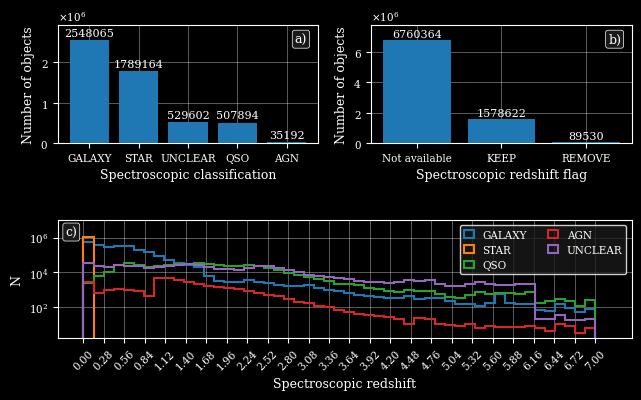

: 

In [ ]:
fig = plt.figure(figsize=(set_size(width, subplots=(2,2), fraction=1)))

gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.2)

bbox = dict(facecolor='#1a1a1a', edgecolor='white', lw=0.5, boxstyle='round,pad=0.2')

# Redshift distribution
ax_spec = fig.add_subplot(gs[1, 0:2])
specz_data_classes = ['GALAXY', 'STAR', 'QSO', 'AGN', 'UNCLEAR']
colors = plt.cm.plasma(np.linspace(0,0.9,len(specz_data_classes)))

for i, cl in enumerate(specz_data_classes):
    if cl == 'STAR':
        cond = specz_data['class_spec'] == cl
    else:
        cond = specz_data['class_spec'].str.contains(cl)
    ax_spec.hist(specz_data[cond]['z'], label=cl, range=(0, 7), bins=51, histtype='step', lw=1.5)
    
ax_spec.legend(ncols=2,handlelength=1, fontsize='small')
ax_spec.set_yscale('log')
ax_spec.set_ylim(top=1e7)
ax_spec.set_xlabel('Spectroscopic redshift')
ax_spec.set_ylabel('N')
ax_spec.text(0.013, 0.87, 'c)', transform=ax_spec.transAxes, bbox=bbox)
ax_spec.set_xticks(np.linspace(0, 7, 51))
for label in ax_spec.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
for tick in ax_spec.xaxis.get_major_ticks()[1::2]:
    tick.set_visible(False)
ax_spec.set_xlim(right=7.5)

plt.xticks(rotation=45)

# Classes
ax_class = fig.add_subplot(gs[0, 0])
ax_class.bar(np.arange(len(classifs)), counts_c, alpha=1, zorder=10)
ax_class.set_xticks(np.arange(len(classifs)), classifs)
for i, cl in enumerate(classifs):
    ax_class.text(i, counts_c[i]+100000, counts_c[i], ha='center', size=8)
ax_class.set_ylim(top=np.max(counts_c)*1.15)
ax_class.set_xlabel('Spectroscopic classification')
ax_class.set_ylabel('Number of objects')
ax_class.text(0.91, 0.85, 'a)', transform=ax_class.transAxes, bbox=bbox)

# Flags
ax_flags = fig.add_subplot(gs[0, 1])
ax_flags.bar(np.arange(len(flags)), counts_f, alpha=1, zorder=10)
ax_flags.set_xticks(np.arange(len(flags)), flags)
for i, cl in enumerate(flags):
    ax_flags.text(i, counts_f[i]+200000, counts_f[i], ha='center', size=8)
ax_flags.set_ylim(top=np.max(counts_f)*1.15)
ax_flags.set_xlabel('Spectroscopic redshift flag')
ax_flags.set_ylabel('Number of objects')
ax_flags.text(0.91, 0.85, 'b)', transform=ax_flags.transAxes, bbox=bbox)

for ax in [ax_spec, ax_class, ax_flags]:
    ax.grid(True)
    
for ax in [ax_class, ax_flags]:
    ax.ticklabel_format(style='sci',scilimits=(-3,4), axis='y', useMathText=True)

plt.savefig(f'images/specz_distributions.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

## 2.3 Photometric data

In [75]:
train_var = ['FUVmag', 'NUVmag', 'u_PStotal', 'J0378_PStotal', 'J0395_PStotal', 'J0410_PStotal', 'J0430_PStotal', 
             'g_PStotal', 'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 'i_PStotal', 'J0861_PStotal', 'z_PStotal', 
             'Ypmag', 'Jpmag', 'Hpmag', 'Kspmag', 'W1_ab', 'W2_ab', 'FUVmag-r_PStotal', 'NUVmag-r_PStotal', 
             'u_PStotal-r_PStotal', 'J0378_PStotal-r_PStotal', 'J0395_PStotal-r_PStotal', 'J0410_PStotal-r_PStotal', 
             'J0430_PStotal-r_PStotal', 'g_PStotal-r_PStotal', 'J0515_PStotal-r_PStotal', 'r_PStotal-J0660_PStotal', 
             'r_PStotal-i_PStotal', 'r_PStotal-J0861_PStotal', 'r_PStotal-z_PStotal', 'r_PStotal-Ypmag', 
             'r_PStotal-Jpmag', 'r_PStotal-Hpmag', 'r_PStotal-Kspmag', 'r_PStotal-W1_ab', 'r_PStotal-W2_ab', 
             'FWHM_n', 'ISOarea', 'MU_MAX_INST', 'KRON_RADIUS_A']

galex_features = ['FUVmag', 'NUVmag']
splus_features = ['u_PStotal', 'J0378_PStotal', 'J0395_PStotal', 'J0410_PStotal', 'J0430_PStotal', 
                  'g_PStotal', 'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 'i_PStotal', 'J0861_PStotal', 'z_PStotal']
vhs_features = ['Ypmag', 'Jpmag', 'Hpmag', 'Kspmag']
wise_features = ['W1_ab', 'W2_ab']

features = galex_features + splus_features + vhs_features + wise_features

: 

In [ ]:
input_data = pd.read_csv('../../photoz_idr5/_input_data/splus_idr5_2024-08-05_restricted_csfd.csv',#'_data/splus_idr5_2024-08-05_restricted_csfd.csv', 
                         usecols=['ID'] + features + ['class_spec', 'z', 'e_z', 'f_z', 'Separation', 'source'] + 
                         ['FWHM_n', 'ISOarea', 'MU_MAX_INST', 'KRON_RADIUS', 'A', 'SEX_FLAGS_DET', 'nDet_PStotal', 'r_auto'] + 
                         ['u_auto', 'g_auto'] + ['e_'+s for s in splus_features]
                         )

constraints_query = f"""
        14 <= r_auto <= 21 and
        0 <= SEX_FLAGS_DET <= 3 and
        nDet_PStotal >= 1 and
        0.002 <= z <= 1 and
        e_z.fillna(-99.) <= 0.002 and
        f_z.str.contains('KEEP', na=True) and
        class_spec.str.contains('GALAXY|SUPERNOVAE|AGN', na=False) and
        Separation <= 1.0 and
        not ID.str.contains('NGC6121') and
        not source.str.contains('morx') and
        not source.str.contains('VII/259/spectra')
    """

input_data_train = input_data.query(constraints_query.replace('\n', ''), engine='python')

for data in [input_data, input_data_train]:
    data.loc[data['u_auto'] >= 90, 'u_auto'] = np.nan
    data.loc[data['g_auto'] >= 90, 'g_auto'] = np.nan
    data.loc[data['r_auto'] >= 90, 'r_auto'] = np.nan

input_data = input_data[input_data['z'] >= 0.002]

: 

In [ ]:
input_data_train['KRON_RADIUS_A'] = input_data_train['KRON_RADIUS'] * input_data_train['A']

reference_band  = f'r_PStotal'
reference_idx   = features.index(reference_band)
features_to_left  = features[:reference_idx]
features_to_right = features[(reference_idx+1):]

for feature in features_to_left: # of reference_band
    input_data_train[feature+'-'+reference_band] = input_data_train[feature] - input_data_train[reference_band]

for feature in features_to_right: # of reference_band
    input_data_train[reference_band+'-'+feature] = input_data_train[reference_band] - input_data_train[feature]
    

: 

### 2.3.1 iDR5: Distribution of matches

#### 2.3.1.1 All-sky crossmatches

In [80]:
def plot_square_path(center_ra, center_dec, size, plot_kwargs={}, ax=None):
    if ax is None:
        ax = plt.gca()
    
    size_x = size/np.cos(center_dec)
    size_y = size

    patch = mpatches.Rectangle((center_ra-size, center_dec-size), size_x, size_y, **plot_kwargs)
    ax.add_patch(patch)

: 

In [81]:
# Load and process field lists
all_splus_footprint = pd.read_csv('../../thesis_scripts/_data/all_splus_current.csv')
idr5_splus_footprint = pd.read_csv('../../thesis_scripts/_data/iDR5_pointings.csv')
idr5_splus_footprint = idr5_splus_footprint[idr5_splus_footprint['Photometry'] == 'aperture']

idr5_splus_footprint['Field'] = idr5_splus_footprint['Field'].str.replace('STRIPE82-', 'STRIPE82_')
idr5_splus_footprint['Field'] = idr5_splus_footprint['Field'].str.replace('HYDRA-', 'HYDRA_')
idr5_splus_footprint['Field'] = idr5_splus_footprint['Field'].str.replace('HYDRA_D-', 'HYDRA_D_')

all_fields  = all_splus_footprint['NAME'].unique()
idr5_fields = idr5_splus_footprint['Field'].unique()

non_observed = np.setdiff1d(all_fields, idr5_fields)

all_splus_footprint = all_splus_footprint[all_splus_footprint['NAME'].isin(non_observed)]

: 

In [70]:
cross_info = pd.read_csv('../../thesis_scripts/_data/crossmatched_stats.csv')

cross_info['field'] = cross_info['field'].str.replace('STRIPE82-', 'STRIPE82_')
cross_info['field'] = cross_info['field'].str.replace('HYDRA-', 'HYDRA_')
cross_info['field'] = cross_info['field'].str.replace('HYDRA_D-', 'HYDRA_D_')

cross_info['has_galex'] = cross_info['n_galex'] != 0
cross_info['has_vhs'] = cross_info['n_vhs'] != 0
cross_info['has_wise'] = cross_info['n_unwise'] != 0

merged_cross_idr5 = cross_info.merge(idr5_splus_footprint, left_on='field', right_on='Field')

: 

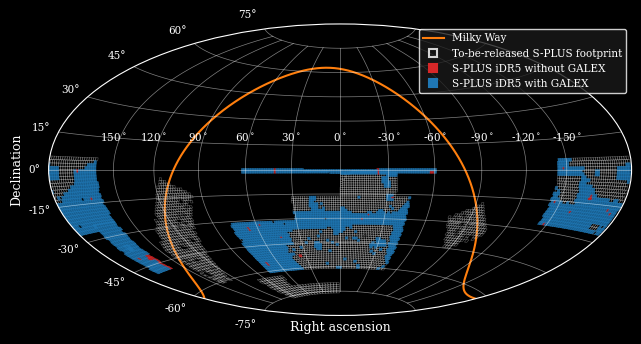

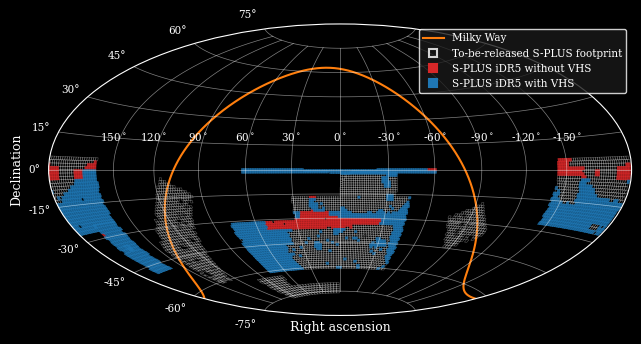

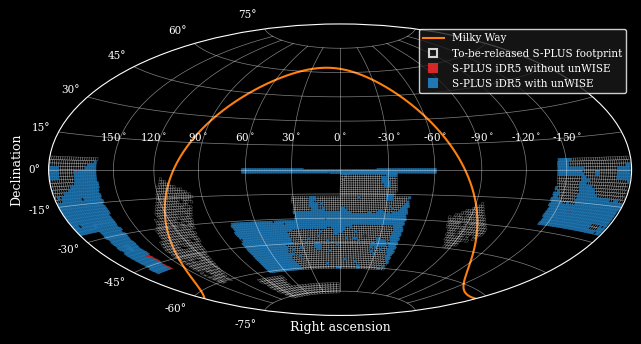

: 

In [ ]:
# Plot All-Sky
for name, cross_cond in zip(['GALEX', 'VHS', 'unWISE'], ['has_galex', 'has_vhs', 'has_wise']):
    data_with_crossmatch = merged_cross_idr5[merged_cross_idr5[cross_cond]]
    data_without_crossmatch = merged_cross_idr5[~merged_cross_idr5[cross_cond]]

    fig, ax = plt.subplots(1, 1, figsize=set_size(width), subplot_kw=dict(projection='aitoff'))

    sorted_gal_idx = np.argsort(mw_line.ra.wrap_at('180d').radian)
    plt.plot(-mw_line.ra.wrap_at('180d').radian[sorted_gal_idx], mw_line.dec.radian[sorted_gal_idx], 
            color='C1', label='Milky Way', zorder=-1)

    # Do plots
    non_obs_foot_coord = SkyCoord(ra=all_splus_footprint['RA'], dec=all_splus_footprint['DEC'], unit=(u.hour, u.deg), frame='icrs')
    for obj in non_obs_foot_coord:
        plot_square_path(-obj.ra.wrap_at('180d').radian, obj.dec.radian, 1.4*np.pi/180,
                        plot_kwargs={'edgecolor':'lightgray', 'facecolor':'none', 'lw':0.4, 'alpha':0.4, 'rasterized':True}, ax=ax)
        
    idr5_nonmatch_coord = SkyCoord(ra=data_without_crossmatch['RA'],
                                   dec=data_without_crossmatch['DEC'], 
                                   unit=(u.hour, u.deg), frame='icrs')
    for obj in idr5_nonmatch_coord:
        plot_square_path(-obj.ra.wrap_at('180d').radian, obj.dec.radian, 1.4*np.pi/180,
                        plot_kwargs={'edgecolor':'C3', 'facecolor':'C3', 'lw':0.4, 'alpha':0.8, 'rasterized':True}, ax=ax)
        
    idr5_match_coord = SkyCoord(ra=data_with_crossmatch['RA'],
                                dec=data_with_crossmatch['DEC'], 
                                unit=(u.hour, u.deg), frame='icrs')
    for obj in idr5_match_coord:
        plot_square_path(-obj.ra.wrap_at('180d').radian, obj.dec.radian, 1.4*np.pi/180,
                        plot_kwargs={'edgecolor':'C0', 'facecolor':'C0', 'lw':0.4, 'alpha':0.8, 'rasterized':True}, ax=ax)

    # Legend
    milky_way_line = mlines.Line2D([], [], color='C1', label='Milky Way')
    to_be_obs      = mlines.Line2D([], [], markerfacecolor='none', markeredgecolor='lightgray', marker='s', 
                            markeredgewidth=1.5, lw=0, label='To-be-released S-PLUS footprint')
    idr5_footprint = mlines.Line2D([], [], markerfacecolor='C3', markeredgecolor='C3', marker='s', 
                            markeredgewidth=1.5, lw=0, label=f'S-PLUS iDR5 without {name}')
    idr5_galex     = mlines.Line2D([], [], markerfacecolor='C0', markeredgecolor='C0', marker='s',
                                markeredgewidth=1.5, lw=0, label=f'S-PLUS iDR5 with {name}')
    plt.legend(handles=[milky_way_line, to_be_obs, idr5_footprint, idr5_galex], loc='upper right')

    plt.xticks(np.array([-150+10, -120+5, -90+2.5, -60+1.5, -30, 0, 30, 60-1.5, 90-2.5, 120-5, 150-10])*np.pi/180, 
            [s+'\n\n' for s in ['150$^\circ$', '120$^\circ$', '90$^\circ$', '60$^\circ$', '30$^\circ$', '0$^\circ$', 
                '-30$^\circ$', '-60$^\circ$', '-90$^\circ$', '-120$^\circ$', '-150$^\circ$']],
                zorder=10)

    plt.ylabel('Declination')
    plt.xlabel('Right ascension')

    plt.grid(True)

    plt.savefig(f'images/splus_footprint_idr5_{name}.{saveformat}', dpi=288)
    plt.show()

#### 2.3.1.2 Sample constraints

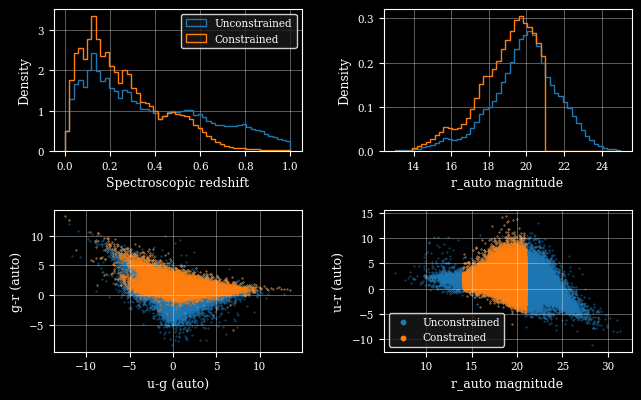

: 

In [ ]:
fig = plt.figure(figsize=set_size(width, subplots=(2, 2), fraction=1))

gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.1, wspace=0.1)

axes = [fig.add_subplot(gs[0, 0]), 
        fig.add_subplot(gs[0, 1]), 
        fig.add_subplot(gs[1, 0]), 
        fig.add_subplot(gs[1, 1])]

for name, data in zip(['Unconstrained', 'Constrained'], [input_data, input_data_train]):
    axes[0].hist(data['z'], bins=51, range=(0, 1), histtype='step', density=True, label=name)
    axes[1].hist(data['r_auto'], bins=51, range=(13, 25), histtype='step', density=True, label=name)
    axes[2].scatter(data['u_auto']-data['g_auto'], data['g_auto']-data['r_auto'], s=0.1, label=name, rasterized=True)
    axes[3].scatter(data['r_auto'], data['u_auto']-data['r_auto'], s=0.1, label=name, rasterized=True)

axes[0].set_xlabel('Spectroscopic redshift')
axes[0].set_ylabel('Density')

axes[1].set_xlabel('r_auto magnitude')
axes[1].set_ylabel('Density')

axes[2].set_xlabel('u-g (auto)')
axes[2].set_ylabel('g-r (auto)')

axes[3].set_xlabel('r_auto magnitude')
axes[3].set_ylabel('u-r (auto)')

axes[0].legend()
sc_leg = axes[3].legend(loc='lower left')
for lh in sc_leg.legend_handles: 
    # Change size of the scatter points in the legend
    lh.set_sizes([10])

plt.savefig(f'images/constraints_effect.{saveformat}', dpi=288)
plt.show()

#### 2.3.1.3 Crossmatch stats

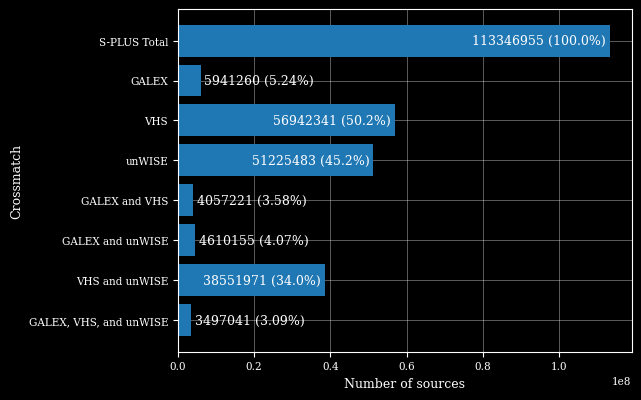

: 

In [89]:
cross_match_data = pd.read_csv('../../thesis_scripts/_data/crossmatched_stats.csv')

cond_counts = []
cond_names  = ['S-PLUS Total', 'GALEX', 'VHS', 'unWISE', 'GALEX and VHS', 'GALEX and unWISE', 'VHS and unWISE', 'GALEX, VHS, and unWISE']
cond_cols   = ['n_total', 'n_galex', 'n_vhs', 'n_unwise', 'n_galex_vhs', 'n_galex_unwise', 'n_vhs_unwise', 'n_all']
for cond_name, cond_col in zip(cond_names, cond_cols):
    cond_counts.append(cross_match_data[cond_col].sum())

fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=1))

y_pos = np.arange(len(cond_counts))
plt.barh(y_pos, cond_counts, zorder=2)
ax.set_yticks(y_pos, labels=cond_names)
ax.invert_yaxis()

for i, v in enumerate(cond_counts):
    if v > 10e6:
        ax.text(v-1000000, i, f'{v} ({100*v/cond_counts[0]:.1f}%)', color='white', va='center', ha='right')
    else:
        t = ax.text(v+1000000, i, f'{v} ({100*v/cond_counts[0]:.2f}%)', color='white', va='center', ha='left')
        #t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))

plt.xlabel('Number of sources')
plt.ylabel('Crossmatch')

plt.savefig(f'images/crossmatch_stats.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

#### 2.3.1.4 Color vs redshift analysis

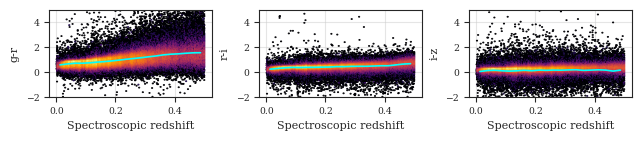

: 

In [31]:
fig, axes = plt.subplots(1, 3, figsize=set_size(width, subplots=(1, 3), fraction=1))

input_data_train['u-g'] = input_data_train['u_auto'] - input_data_train['g_auto']
input_data_train['g-r'] = input_data_train['g_auto'] - input_data_train['r_auto']
input_data_train['r-i'] = input_data_train['r_auto'] - input_data_train['i_auto']
input_data_train['i-z'] = input_data_train['i_auto'] - input_data_train['z_auto']

for i, color in enumerate(['g-r', 'r-i', 'i-z']):
    axes[i].hexbin(input_data_train['z'], input_data_train[color], gridsize=200, cmap='inferno', bins='log', extent=(0, 0.5, -2, 5))

    average_color = []
    for val in np.arange(0, 0.5, 0.025):
        cond = input_data_train['z'].between(val, val+0.025)
        average_color.append( np.mean(input_data_train[cond][color]) )
    axes[i].plot(np.arange(0, 0.5, 0.025)+0.0125, average_color, color='cyan', lw=1.2)

    axes[i].set_xlabel('Spectroscopic redshift')
    axes[i].set_ylabel(color)

for ax in axes:
    ax.set_ylim(-2, 5)

plt.show()

### 2.3.2 All-sky extinction map

In [5]:
extinction_columns = [s for s in pd.read_csv('_data/splus_idr5_2024-08-05_restricted_csfd.csv', nrows=1).columns.values if ('_ext' in s)]

input_data = pd.read_csv('_data/splus_idr5_2024-06-20_restricted_csfd.csv',
                            usecols=['RA', 'DEC']+extinction_columns)

: 

In [6]:
# gal_coords = SkyCoord(ra=input_data['RA'], 
#                       dec=input_data['DEC'], 
#                       unit=u.deg)

mw_line = SkyCoord(l=np.linspace(0, 360, 1000), 
                   b=np.zeros(1000), 
                   unit=u.deg, 
                   frame='galactic')
mw_line = mw_line.transform_to('icrs')

: 

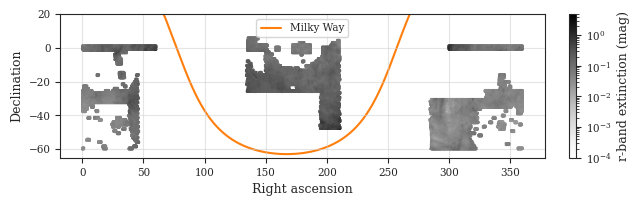

: 

In [7]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width=455, subplots=(1, 2), fraction=1))

#hexb = ax.hexbin(-gal_coords.ra.wrap_at('0d').deg, gal_coords.dec.deg, C=input_data['r_ext'], cmap='Greys', vmin=0.0001, vmax=5, gridsize=300, bins='log')
hexb = ax.hexbin(-input_data['RA']+360, input_data['DEC'], C=input_data['r_ext'], cmap='Greys', vmin=0.0001, vmax=5, gridsize=500, bins='log', rasterized=True)

sorted_gal_idx = np.argsort(mw_line.ra.wrap_at('0d').radian)
ax.plot(-mw_line.ra.wrap_at('0d').deg[sorted_gal_idx], mw_line.dec.deg[sorted_gal_idx], 
         color='C1', label='Milky Way', zorder=-1)

plt.ylim(-65, 20)

plt.xlabel('Right ascension')
plt.ylabel('Declination')

plt.legend(loc='upper center')

cbar = plt.colorbar(hexb, label='r-band extinction (mag)')

plt.savefig(f'images/extinction_map.{saveformat}', dpi=288)
plt.show()

### 2.3.3 Feature importance

#### 2.3.3.1 Mutual importance

In [10]:
from sklearn.feature_selection import mutual_info_regression

X = input_data_train[train_var].values
X = np.nan_to_num(X)
y = input_data_train['z'].values

#random_idx = np.random.choice(np.arange(X.shape[0]), 20000)
#mi = mutual_info_regression(X[random_idx], y[random_idx], random_state=0)

chunk_size = 30000
mis = []
for interval in tqdm(np.arange(0, len(X), chunk_size)):
    print(f'Interval: {interval,interval+chunk_size}')
    mis.append( mutual_info_regression(X[interval:interval+chunk_size], y[interval:interval+chunk_size], 
                                       discrete_features=False, random_state=0, n_jobs=8) )

  0%|          | 0/14 [00:00<?, ?it/s]

Interval: (0, 30000)
Interval: (30000, 60000)
Interval: (60000, 90000)
Interval: (90000, 120000)
Interval: (120000, 150000)
Interval: (150000, 180000)
Interval: (180000, 210000)
Interval: (210000, 240000)
Interval: (240000, 270000)
Interval: (270000, 300000)
Interval: (300000, 330000)
Interval: (330000, 360000)
Interval: (360000, 390000)
Interval: (390000, 420000)


: 

In [11]:
mi = np.median(mis, axis=0)

: 

In [12]:
np.percentile(mis, [5,95], axis=0)

array([[0.06720241, 0.07843769, 0.3372713 , 0.34986391, 0.30863542,
        0.36799893, 0.43728551, 0.61032749, 0.54880482, 0.46455008,
        0.41969364, 0.35434138, 0.31922021, 0.3123679 , 0.04755867,
        0.17747912, 0.11195144, 0.14848875, 0.18406609, 0.16489966,
        0.05746058, 0.06914937, 0.18114618, 0.18414767, 0.17904126,
        0.17228539, 0.19266954, 0.33813655, 0.30973675, 0.26286072,
        0.39017248, 0.35704398, 0.36219576, 0.01856032, 0.05916701,
        0.05319608, 0.08592486, 0.30519857, 0.28278065, 0.04255259,
        0.39827149, 0.25666017, 0.1420217 ],
       [0.17079824, 0.19097334, 0.41699567, 0.41183927, 0.36611337,
        0.43716538, 0.50409021, 0.68641799, 0.61395846, 0.55273546,
        0.50442817, 0.41462958, 0.37724668, 0.36599702, 0.10273869,
        0.24986934, 0.14006844, 0.21626403, 0.26806312, 0.24632116,
        0.14938627, 0.14840364, 0.20666932, 0.21916864, 0.21539274,
        0.22713742, 0.24394583, 0.39697114, 0.35374504, 0.28802198,
   

: 

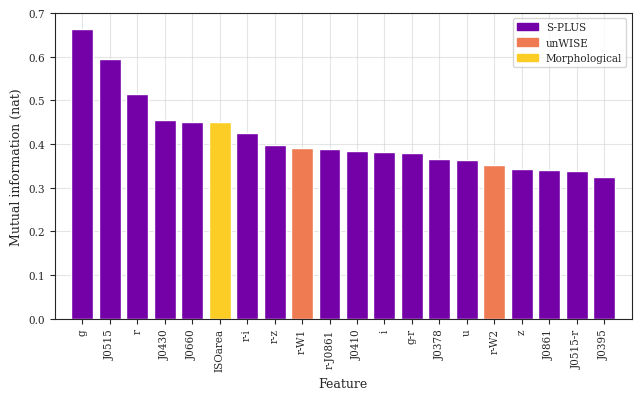

: 

In [15]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=1))

sorted_idx = np.argsort(mi)[::-1][:20]
color_hatch = None

colors = plt.cm.plasma(np.linspace(0,0.9,5))

for i, name, mi_val in zip(np.arange(len(train_var)), np.array(train_var)[sorted_idx], mi[sorted_idx]):
    alpha = 1
    hatch = None
    if name in [s for s in train_var if ('FUV' in s) or ('NUV' in s)]:
        color = colors[0]
        if '-' in name:
            hatch = color_hatch
    elif name in [s for s in train_var if (('u_' in s) or ('g_' in s) or ('r_' in s) or ('i_' in s) or ('z_' in s) or ('J0' in s)) and
                        (('W1' not in s) and ('W2' not in s) and ('FUV' not in s) and ('NUV' not in s) and ('Yp' not in s) and ('Jp' not in s) and ('H' not in s) and ('Ks' not in s))]:
        color = colors[1]
        if '-' in name:
            hatch = color_hatch
    elif name in [s for s in train_var if ('Yp' in s) or ('Jp' in s) or ('Hp' in s) or ('Ksp' in s)]:
        color = colors[2]
        if '-' in name:
            hatch = color_hatch
    elif name in [s for s in train_var if ('W1' in s) or ('W2' in s)]:
        color = colors[3]
        if '-' in name:
            hatch = color_hatch
    else:
        color = colors[4]

    ax.bar(i, mi_val, color=color, hatch=hatch)

ax.set_xticks(np.arange(len(sorted_idx)), labels=[s.replace('_PStotal', '').replace('_ab', '').replace('pmag', '') for s in np.array(train_var)[sorted_idx]])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

galex_legend   = mpatches.Patch(facecolor=colors[0], edgecolor=colors[0], label='GALEX')
splus_legend   = mpatches.Patch(facecolor=colors[1], edgecolor=colors[1], label='S-PLUS')
vhs_legend     = mpatches.Patch(facecolor=colors[2], edgecolor=colors[2], label='VHS')
wise_legend    = mpatches.Patch(facecolor=colors[3], edgecolor=colors[3], label='unWISE')
nonphot_legend = mpatches.Patch(facecolor=colors[4], edgecolor=colors[4], label='Morphological')

not_hatched_legend = mpatches.Patch(facecolor='white', edgecolor='black', label='Not colors')
#hatched_legend = mpatches.Patch(facecolor='white', edgecolor='black', hatch='////', label='Colors')

#ax.legend(handles=[galex_legend, splus_legend, vhs_legend, wise_legend, nonphot_legend], loc='upper right')
ax.legend(handles=[splus_legend, wise_legend, nonphot_legend], loc='upper right')

ax.set_ylabel('Mutual information (nat)')
ax.set_xlabel('Feature')

ax.set_xlim(-1, len(sorted_idx))
ax.set_ylim(0, 0.7)

plt.savefig(f'images/mutual_information_top20.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

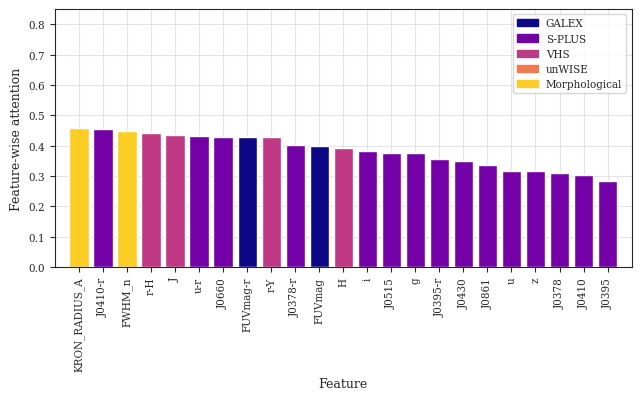

: 

In [14]:
model_attn = np.array([0.3985521 , 0.5748498 , 0.3168903 , 0.30855972, 0.2827559 ,
              0.30220342, 0.34927276, 0.3753462 , 0.3770898 , 0.46688136,
              0.43010014, 0.38219002, 0.33656752, 0.3150859 , 0.47168255,
              0.43562153, 0.3922883 , 0.5279701 , 0.4830477 , 0.52286565,
              0.4277525 , 0.49184164, 0.43268043, 0.40295184, 0.35728282,
              0.4550644 , 0.51360303, 0.6836926 , 0.59912884, 0.5625813 ,
              0.71392065, 0.6635079 , 0.6799264 , 0.42717078, 0.55834925,
              0.44170058, 0.6503197 , 0.8176362 , 0.7699671 , 0.44882694,
              0.65536064, 0.486746  , 0.45852777])

fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=1))

sorted_idx = np.argsort(model_attn)[::-1][20:]
color_hatch = None
colors = plt.cm.plasma(np.linspace(0,0.9,5))

for i, name, mi_val in zip(np.arange(len(train_var)), np.array(train_var)[sorted_idx], model_attn[sorted_idx]):
    alpha = 1
    hatch = None
    if name in [s for s in train_var if ('FUV' in s) or ('NUV' in s)]:
        color = colors[0]
        if '-' in name:
            hatch = color_hatch
    elif name in [s for s in train_var if (('u_' in s) or ('g_' in s) or ('r_' in s) or ('i_' in s) or ('z_' in s) or ('J0' in s)) and
                        (('W1' not in s) and ('W2' not in s) and ('FUV' not in s) and ('NUV' not in s) and ('Yp' not in s) and ('Jp' not in s) and ('H' not in s) and ('Ks' not in s))]:
        color = colors[1]
        if '-' in name:
            hatch = color_hatch
    elif name in [s for s in train_var if ('Yp' in s) or ('Jp' in s) or ('Hp' in s) or ('Ksp' in s)]:
        color = colors[2]
        if '-' in name:
            hatch = color_hatch
    elif name in [s for s in train_var if ('W1' in s) or ('W2' in s)]:
        color = colors[3]
        if '-' in name:
            hatch = color_hatch
    else:
        color = colors[4]

    ax.bar(i, mi_val, color=color, hatch=hatch)

ax.set_xticks(np.arange(len(sorted_idx)), labels=[s.replace('_PStotal', '').replace('_ab', '').replace('pmag', '') for s in np.array(train_var)[sorted_idx]])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

galex_legend   = mpatches.Patch(facecolor=colors[0], edgecolor=colors[0], label='GALEX')
splus_legend   = mpatches.Patch(facecolor=colors[1], edgecolor=colors[1], label='S-PLUS')
vhs_legend     = mpatches.Patch(facecolor=colors[2], edgecolor=colors[2], label='VHS')
wise_legend    = mpatches.Patch(facecolor=colors[3], edgecolor=colors[3], label='unWISE')
nonphot_legend = mpatches.Patch(facecolor=colors[4], edgecolor=colors[4], label='Morphological')

not_hatched_legend = mpatches.Patch(facecolor='white', edgecolor='black', label='Not colors')
#hatched_legend = mpatches.Patch(facecolor='white', edgecolor='black', hatch='////', label='Colors')

ax.legend(handles=[galex_legend, splus_legend, vhs_legend, wise_legend, nonphot_legend], loc='upper right')

ax.set_ylabel('Feature-wise attention')
ax.set_xlabel('Feature')

ax.set_xlim(-1, len(sorted_idx))
ax.set_ylim(0, 0.85)

plt.savefig(f'images/model_attn_rest.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

In [139]:
# Mutual information importance as a function of redshift
mis_z = []
for val in tqdm(np.arange(0, 0.8, 0.05)):
    labels = ['%.2f-%.2f' %(s, s+0.05) for s in np.arange(0, 0.8, 0.05)]
    cond = input_data_train['z'].between(val, val+0.05)
    
    if len(X[cond]) > 30000:
        chunk_size = 30000
        mis = []
        for interval in tqdm(np.arange(0, len(X[cond]), chunk_size)):
            print(f'Interval: {interval,interval+chunk_size}')
            mis.append( mutual_info_regression(X[cond][interval:interval+chunk_size], y[cond][interval:interval+chunk_size], 
                                               discrete_features=False, random_state=0, n_jobs=8) )

        mi = np.median(mis, axis=0)
        # random_idx = np.random.choice(np.arange(X[cond].shape[0]), 30000)
        # mi = mutual_info_regression(X[cond][random_idx], y[cond][random_idx], random_state=0)
    else:
        mi = mutual_info_regression(X[cond], y[cond], discrete_features=False, random_state=0, n_jobs=8)
    
    mis_z.append(mi)

mis_z = np.array(mis_z)
mis_z = mis_z/mis_z.sum(axis=1).reshape(-1,1)

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Interval: (0, 30000)
Interval: (30000, 60000)


  0%|          | 0/3 [00:00<?, ?it/s]

Interval: (0, 30000)
Interval: (30000, 60000)
Interval: (60000, 90000)


  0%|          | 0/2 [00:00<?, ?it/s]

Interval: (0, 30000)
Interval: (30000, 60000)


  0%|          | 0/2 [00:00<?, ?it/s]

Interval: (0, 30000)
Interval: (30000, 60000)


  0%|          | 0/2 [00:00<?, ?it/s]

Interval: (0, 30000)
Interval: (30000, 60000)


: 

In [142]:
galex_idxs = [0, 1]
galex_c_idxs = [20, 21]

splus_idxs = [2,3,4,5,6,7,8,9,10,11,12,13]
splus_c_ids = [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]

vhs_idxs = [14, 15, 16, 17]
vhs_c_idxs = [33, 34, 35, 36]

wise_idxs = [18, 19]
wise_c_idxs = [37, 38]

morph_idxs = [39, 40, 41, 42]

: 

In [143]:
galex_mis_z = np.array(mis_z)[:, galex_idxs]
galex_c_mis_z = np.array(mis_z)[:, galex_c_idxs]

splus_mis_z = np.array(mis_z)[:, splus_idxs]
splus_c_mis_z = np.array(mis_z)[:, splus_c_ids]

vhs_mis_z = np.array(mis_z)[:, vhs_idxs]
vhs_c_mis_z = np.array(mis_z)[:, vhs_c_idxs]

wise_mis_z = np.array(mis_z)[:, wise_idxs]
wise_c_mis_z = np.array(mis_z)[:, wise_c_idxs]

morph_mis_z = np.array(mis_z)[:, morph_idxs]

: 

In [144]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

: 

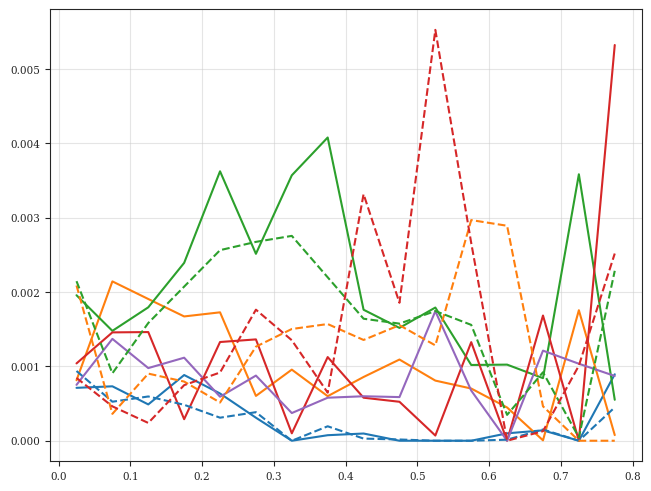

: 

In [145]:
plt.plot(np.arange(0, 0.8, 0.05)+0.025, np.median(galex_mis_z/mis_z.sum(), axis=1), color=colors[0])
plt.plot(np.arange(0, 0.8, 0.05)+0.025, np.median(splus_mis_z/mis_z.sum(), axis=1), color=colors[1])
plt.plot(np.arange(0, 0.8, 0.05)+0.025, np.median(vhs_mis_z/mis_z.sum(), axis=1), color=colors[2])
plt.plot(np.arange(0, 0.8, 0.05)+0.025, np.median(wise_mis_z/mis_z.sum(), axis=1), color=colors[3])
plt.plot(np.arange(0, 0.8, 0.05)+0.025, np.median(morph_mis_z/mis_z.sum(), axis=1), color=colors[4])

plt.plot(np.arange(0, 0.8, 0.05)+0.025, np.median(galex_c_mis_z/mis_z.sum(), axis=1), '--', color=colors[0])
plt.plot(np.arange(0, 0.8, 0.05)+0.025, np.median(splus_c_mis_z/mis_z.sum(), axis=1), '--', color=colors[1])
plt.plot(np.arange(0, 0.8, 0.05)+0.025, np.median(vhs_c_mis_z/mis_z.sum(), axis=1), '--', color=colors[2])
plt.plot(np.arange(0, 0.8, 0.05)+0.025, np.median(wise_c_mis_z/mis_z.sum(), axis=1), '--', color=colors[3])

In [ ]:
mis_z[:,0]

: 

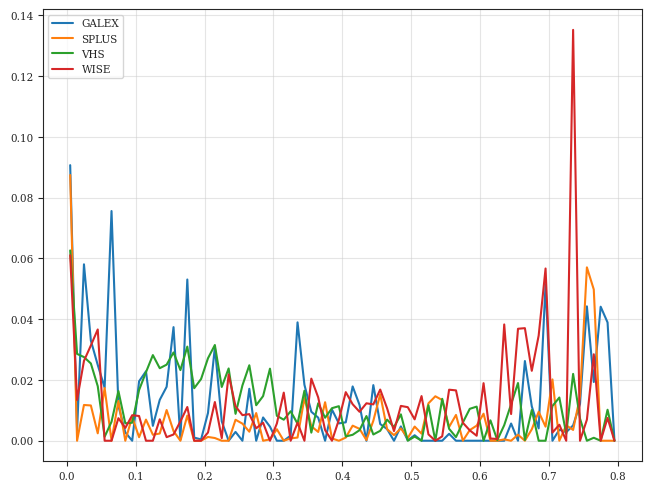

: 

In [84]:
plt.plot(np.arange(0, 0.8, 0.01)+0.005, np.median(galex_mis_z/galex_mis_z.sum(axis=0), axis=1), label='GALEX')
plt.plot(np.arange(0, 0.8, 0.01)+0.005, np.median(splus_mis_z/splus_mis_z.sum(axis=0), axis=1), label='SPLUS')
plt.plot(np.arange(0, 0.8, 0.01)+0.005, np.median(vhs_mis_z/vhs_mis_z.sum(axis=0), axis=1), label='VHS')
plt.plot(np.arange(0, 0.8, 0.01)+0.005, np.median(wise_mis_z/wise_mis_z.sum(axis=0), axis=1), label='WISE')

plt.legend()
plt.show()

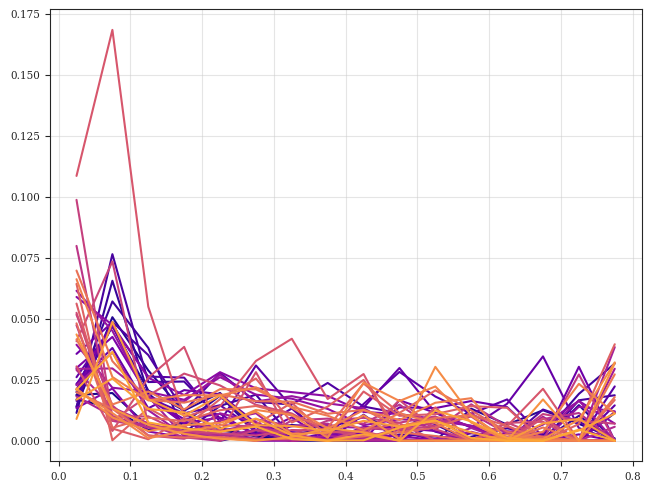

: 

In [21]:
colors = plt.cm.plasma(np.linspace(0,0.8,len(train_var)))

for i in range(len(train_var)):
    plt.plot(np.arange(0, 0.8, 0.05)+0.025, np.array(mis_z)[:,i], color=colors[i])

In [147]:
scores_dataframe = pd.DataFrame(np.transpose(mis), index=train_var, columns=labels)

: 

#### 2.3.3.2 Random forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

X = input_data_train[train_var].values
X = np.nan_to_num(X, nan=99)

y = input_data_train['z'].values

rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=0, n_jobs=8)
rf.fit(X, y)

RandomForestRegressor(max_depth=20, n_jobs=8, random_state=0)

: 

In [57]:
rf.feature_importances_

array([3.00175578e-04, 1.21375954e-03, 3.44413322e-03, 2.49235561e-03,
       1.99643359e-03, 2.37462461e-03, 1.91417882e-02, 6.41233941e-01,
       1.08376552e-02, 2.38843688e-02, 1.20969265e-02, 6.99238177e-03,
       4.03560152e-03, 5.89669069e-03, 3.53870397e-04, 1.61282200e-03,
       1.10442518e-03, 1.41528020e-03, 1.10595066e-02, 2.12303126e-02,
       2.30327062e-04, 1.29956422e-03, 7.74976099e-03, 3.91143586e-03,
       3.25199192e-03, 3.47173489e-03, 4.12476269e-03, 1.95361084e-02,
       1.19550232e-02, 6.93673782e-03, 3.23349414e-02, 5.98266511e-03,
       4.48319650e-02, 6.30629572e-04, 2.29440966e-03, 2.01635351e-03,
       2.38698941e-03, 2.45187049e-02, 9.51717984e-03, 2.85927895e-02,
       7.94368536e-04, 4.15476184e-03, 6.75974150e-03])

: 

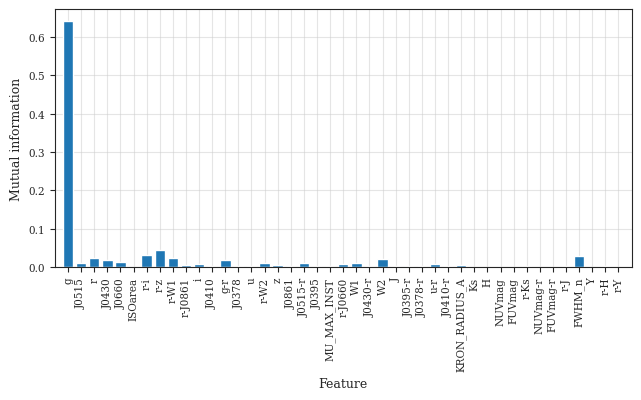

: 

In [58]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=1))

sorted_idx = np.argsort(mi)[::-1]
color_hatch = None

for i, name, mi_val, rf_val in zip(np.arange(len(train_var)), np.array(train_var)[sorted_idx], mi[sorted_idx], rf.feature_importances_[sorted_idx]):
    #ax.bar(i, mi_val, color='C0')
    ax.bar(i, rf_val, color='C0')

ax.set_xticks(np.arange(len(train_var)), labels=[s.replace('_PStotal', '').replace('_ab', '').replace('pmag', '') for s in np.array(train_var)[sorted_idx]])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

ax.set_ylabel('Mutual information')
ax.set_xlabel('Feature')

ax.set_xlim(-1, len(train_var))

#plt.savefig(f'images/mutual_information.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

### 2.3.4 Photometric errors

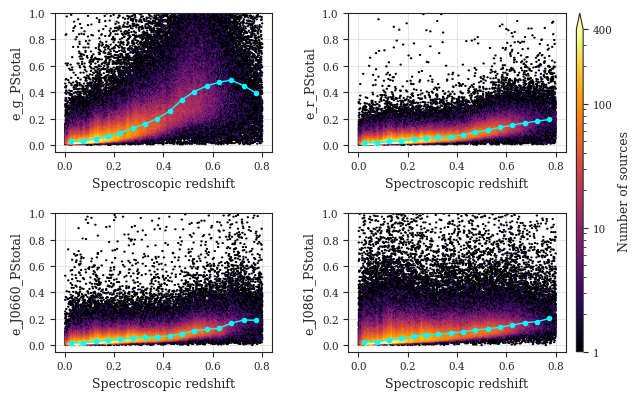

: 

In [42]:
fig = plt.figure(figsize=set_size(width, fraction=1))
gs  = gridspec.GridSpec(2, 2, figure=fig, wspace=0.1, hspace=0.1)

ax_g = fig.add_subplot(gs[0, 0])
ax_r = fig.add_subplot(gs[0, 1])
ax_660 = fig.add_subplot(gs[1, 0])
ax_861 = fig.add_subplot(gs[1, 1])

for ax, mag in zip([ax_g, ax_r, ax_660, ax_861], ['e_g_PStotal', 'e_r_PStotal', 'e_J0660_PStotal', 'e_J0861_PStotal']):
    ax.hexbin(input_data_train['z'], input_data_train[mag], bins='log', cmap='inferno', gridsize=200, extent=(0, 0.8, 0, 1), rasterized=True, vmin=1, vmax=400)
    ax.set_ylim(top=1)

    median = []
    for val in np.arange(0, 0.8, 0.05):
        cond = input_data_train['z'].between(val, val+0.05)
        median.append( np.median(input_data_train[cond][mag]) )
    ax.plot(np.arange(0, 0.8, 0.05)+0.025, median, '.-', color='cyan', lw=1)

    ax.set_xlabel('Spectroscopic redshift')
    ax.set_ylabel(mag)

cbar = plt.colorbar(ax.collections[0], ax=[ax_r, ax_861], aspect=50, extend='max')
cbar.set_label('Number of sources')
cbar.set_ticks([1, 10, 100, 400])
cbar.set_ticklabels([1, 10, 100, 400])

plt.savefig(f'images/errors_vs_specz.{saveformat}', dpi=288)
plt.show()

In [33]:
input_data_train['e_J0660_PStotal'].replace(99, np.nan, inplace=True)

: 

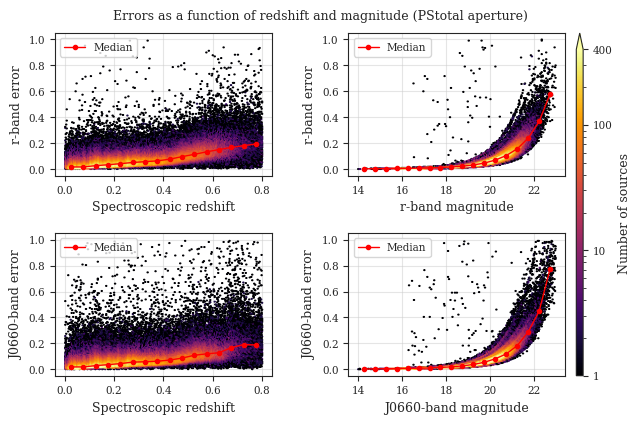

: 

In [61]:
fig = plt.figure(figsize=set_size(width, fraction=1))
gs  = gridspec.GridSpec(2, 2, figure=fig, wspace=0.1, hspace=0.1)

ax_r_z     = fig.add_subplot(gs[0, 0])
ax_r_mag   = fig.add_subplot(gs[0, 1])
ax_660_z   = fig.add_subplot(gs[1, 0])
ax_660_mag = fig.add_subplot(gs[1, 1])

ax_cbar = ax_r_z.hexbin(input_data_train['z'], input_data_train['e_r_PStotal'], bins='log', cmap='inferno', gridsize=200, extent=(0, 0.8, 0, 1), rasterized=True, vmin=1, vmax=400)
ax_r_mag.hexbin(input_data_train['r_PStotal'], input_data_train['e_r_PStotal'], bins='log', cmap='inferno', gridsize=200, extent=(14, 23, 0, 1), rasterized=True, vmin=1, vmax=400)

ax_660_z.hexbin(input_data_train['z'], input_data_train['e_J0660_PStotal'], bins='log', cmap='inferno', gridsize=200, extent=(0, 0.8, 0, 1), rasterized=True, vmin=1, vmax=400)
ax_660_mag.hexbin(input_data_train['J0660_PStotal'], input_data_train['e_J0660_PStotal'], bins='log', cmap='inferno', gridsize=200, extent=(14, 23, 0, 1), rasterized=True, vmin=1, vmax=400)

median_z_r = []
median_z_660 = []

median_mag_r = []
median_mag_660 = []

for val in np.arange(0, 0.8, 0.05):
    #labels = ['%.2f-%.2f' %(s, s+0.05) for s in np.arange(0, 0.8, 0.05)]
    cond = input_data_train['z'].between(val, val+0.05)

    median_z_r.append( np.nanmedian(input_data_train[cond]['e_r_PStotal']) )
    median_z_660.append( np.nanmedian(input_data_train[cond]['e_J0660_PStotal']) )

for val in np.arange(14, 23, 0.5):
    cond = input_data_train['r_PStotal'].between(val, val+0.5)
    median_mag_r.append( np.nanmedian(input_data_train[cond]['e_r_PStotal']) )
for val in np.arange(14, 23, 0.5):
    cond = input_data_train['J0660_PStotal'].between(val, val+0.5)
    median_mag_660.append( np.nanmedian(input_data_train[cond]['e_J0660_PStotal']) )

ax_r_z.plot(np.arange(0, 0.8, 0.05)+0.025, median_z_r, '.-', color='red', lw=1, label='Median')
ax_r_mag.plot(np.arange(14, 23, 0.5)+0.25, median_mag_r, '.-', color='red', lw=1, label='Median')

ax_660_z.plot(np.arange(0, 0.8, 0.05)+0.025, median_z_660, '.-', color='red', lw=1, label='Median')
ax_660_mag.plot(np.arange(14, 23, 0.5)+0.25, median_mag_660, '.-', color='red', lw=1, label='Median')

cbar = plt.colorbar(ax_cbar, ax=[ax_r_mag, ax_660_mag], aspect=50, extend='max')
cbar.set_label('Number of sources')
cbar.set_ticks([1, 10, 100, 400])
cbar.set_ticklabels([1, 10, 100, 400])

for ax in [ax_r_z, ax_660_z]:
    ax.set_xlabel('Spectroscopic redshift')

ax_r_z.set_ylabel('r-band error')
ax_r_mag.set_ylabel('r-band error')
ax_660_z.set_ylabel('J0660-band error')
ax_660_mag.set_ylabel('J0660-band error')

ax_r_mag.set_xlabel('r-band magnitude')
ax_660_mag.set_xlabel('J0660-band magnitude')

for ax in [ax_r_z, ax_r_mag, ax_660_z, ax_660_mag]:
    ax.legend(loc='upper left')

fig.text(0.5, 1.05, 'Errors as a function of redshift and magnitude (PStotal aperture)', ha='center', va='top')
plt.savefig(f'images/errors_vs_specz.{saveformat}', dpi=288)
plt.show()

In [36]:
input_data_train[cond]['e_J0660_PStotal'].median()

0.36279738

: 

### 2.3.5 Sample weights

In [46]:
def weibull(x, k, l):
    return (k/l)*(x/l)**(k-1)*np.exp(-(x/l)**k)

rlim = 21
l = -0.90693+0.05807*rlim
k = 1.77903+2.15043*l

bins = 51
# Get zspec bins (only for z >= 0.002)
z_cond = input_data_train['z'] >= 0.002
height, bins = np.histogram(input_data_train['z'][z_cond].sort_values(), density=True, bins=bins,
                            range=(0.002, 1))

# Get analytical function values
bins_center = bins + (np.diff(bins)/2)[0]
an_func = weibull(bins_center, k, l)
#an_func = van_waerbeke(bins_center, a, b, z0)

# Normalization constant
max_height_idx = np.argmax(height)
norm_ct = 1/(height[max_height_idx])

# Assigning weights
input_data_train['weights'] = 1.0
for i in range(len(bins)-1):
    cond = input_data_train['z'].between(bins[i], bins[i+1])
    input_data_train.loc[cond, 'weights'] = (an_func[i]*norm_ct-height[i]*norm_ct)+1

: 

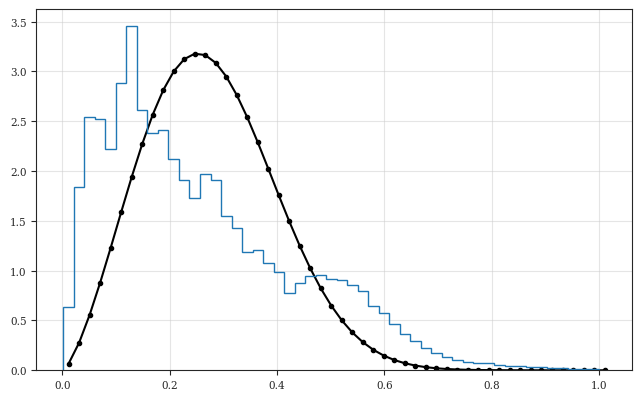

: 

In [60]:
fig = plt.figure(figsize=set_size(width, fraction=1))
gs = gridspec.GridSpec(1, 1, figure=fig, wspace=0.1, hspace=0.1)

ax = fig.add_subplot(gs[0, 0:2])

ax.plot(bins_center, an_func, '.-', label='Weibull', color='black')
ax.hist(input_data_train['z'][z_cond], bins=bins, range=(0.002, 1), histtype='step', density=True, label='S-PLUS iDR5', color='C0')



#ax.plot(input_data_train.sort_values(by='z')['z'], input_data_train.sort_values(by='z')['weights'], '-')

plt.show()

## 2.4 Results

In [90]:
aperture = 'auto_corrected'

result_df = pd.read_csv('../../thesis_scripts/_data/2024-10-30/train/merged_result_df.csv')

result_df['r_auto_corrected'] = result_df['r_auto'] - result_df['r_ext']
result_df = result_df.reset_index(drop=True)

: 

In [91]:
spec_z = result_df['z'].values
photo_z = result_df['zml'].values
delta = photo_z - spec_z

nmad = 1.48 * np.median(abs(delta - np.median(delta)) / (1+spec_z))
print(f"NMAD: {nmad:.4f}")
print(f"Bias: {np.median(delta):.3e}")
print(f"Normalized bias: {np.median(delta)/(1+np.median(spec_z)):.3e}")
print(f"Outliers 0.15: {np.count_nonzero(np.abs(delta)/(1+spec_z) > 0.15)/len(spec_z)*100:.4f}")
#print(f"Outliers 1 sigma: {np.count_nonzero(np.abs(delta)/(1+spec_z) > 1*nmad)/len(spec_z)*100:.4f}")
print(f"Outliers 3 sigma: {np.count_nonzero(np.abs(delta)/(1+spec_z) > 3*nmad)/len(spec_z)*100:.4f}")
print(f"Outliers 5 sigma: {np.count_nonzero(np.abs(delta)/(1+spec_z) > 5*nmad)/len(spec_z)*100:.4f}")

NMAD: 0.0211
Bias: 1.452e-04
Normalized bias: 1.195e-04
Outliers 0.15: 1.5020
Outliers 3 sigma: 9.1380
Outliers 5 sigma: 3.2880


: 

### 2.4.1 1D Results

In [92]:
bins_mag = np.linspace(14, 21, 25, endpoint=True)
bins_z   = np.linspace(0, 0.8, 25, endpoint=True)

mag_grid = np.diff(bins_mag)[0]
z_grid   = np.diff(bins_z)[0]

import matplotlib.colors as Mplcolours
class MidpointNormalize(Mplcolours.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Mplcolours.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

def calculate_metrics_2d(dataset, bins_mag, bins_z, metric='nmad', reference_mag='r_PStotal'):
    # For metrics in center plot
    metrics_2D    = {}

    mag_grid = np.diff(bins_mag)[0]
    z_grid   = np.diff(bins_z)[0]

    for bin_r in bins_mag:
        metrics_2D[bin_r] = {}

        for bin_z in bins_z:
            metrics_2D[bin_r][bin_z] = []

            cond_R = dataset[f'{reference_mag}'].between(bin_r, bin_r+mag_grid)
            cond_Z = dataset['z']               .between(bin_z, bin_z+z_grid)

            delta      = dataset[cond_R & cond_Z]['zml'] - dataset[cond_R & cond_Z]['z']
            specz_bin = dataset[cond_R & cond_Z]['z']

            if len(delta) > 5:
                if metric == 'nmad': metrics_2D[bin_r][bin_z].append( 1.48 * np.median(abs(delta - np.median(delta)) / (1+specz_bin)) )
                if metric == 'bias': metrics_2D[bin_r][bin_z].append( np.median(delta) )
                if metric == 'outf': metrics_2D[bin_r][bin_z].append( 100*(np.count_nonzero( abs(delta) / (1+specz_bin) > 0.15 ) / len(dataset)) )
                if metric == 'odds': metrics_2D[bin_r][bin_z].append( np.mean(dataset[cond_R & cond_Z]['odds']) )
                if metric == 'sig68': metrics_2D[bin_r][bin_z].append( np.mean((dataset[cond_R & cond_Z]['zml_840p'] - dataset[cond_R & cond_Z]['zml_160p'])/2) )
            else:
                metrics_2D[bin_r][bin_z].append( np.nan )

            if metric == 'number': 
                if len(delta) >= 1: 
                    metrics_2D[bin_r][bin_z].append( len(delta) )
                else:
                    metrics_2D[bin_r][bin_z].append( np.nan )

    # Transform metrics_2D into a matrix
    concat_lists = []
    for bin_r in bins_mag:
        concat_lists.append(np.concatenate(list(metrics_2D[bin_r].values())))

    result_matrix = np.vstack(concat_lists)

    return result_matrix

def calculate_metrics(dataframe, reference_mag, magnitude_bins=None, redshift_bins=None, cumulative=False):
    spec_z = dataframe['z'].to_numpy()
    photo_z = dataframe['zml'].to_numpy()
    magnitude_r = dataframe[reference_mag].to_numpy()

    if magnitude_bins is None:
        magnitude_bins = np.linspace(14, 21, 25, endpoint=True)

    if redshift_bins is None:
        redshift_bins = np.linspace(0, 0.6, 25, endpoint=True)

    magnitude_grid = np.diff(magnitude_bins)[0]
    redshift_grid = np.diff(redshift_bins)[0]

    results = {metric: {'r': [], 'z': []} for metric in ['nmad', 'bias', 'bias_norm', 'outf', 'outf3s', 'outf5s', 'odds', 'sig68', 'numb']}

    for bin_val in redshift_bins[:-1]:
        if not cumulative:
            cond_z = (spec_z > bin_val) & (spec_z <= bin_val + redshift_grid)
        else:
            cond_z = spec_z <= bin_val

        spec_z_bin = spec_z[cond_z]
        photo_z_bin = photo_z[cond_z]
        delta = photo_z_bin - spec_z_bin

        if len(spec_z_bin) > 0:
            abs_delta = np.abs(delta - np.median(delta))
            results['nmad']['z'].append(1.48 * np.median(abs_delta / (1 + spec_z_bin)))
            results['bias']['z'].append(np.median(delta))
            results['bias_norm']['z'].append(np.median(delta / (1 + spec_z_bin)))
            results['outf']['z'].append(100 * np.sum(abs_delta / (1 + spec_z_bin) > 0.15) / len(spec_z_bin))
            results['outf3s']['z'].append(100 * np.sum(abs_delta / (1 + spec_z_bin) > 3 * 1.48 * np.median(abs_delta / (1 + spec_z_bin))) / len(spec_z_bin))
            results['outf5s']['z'].append(100 * np.sum(abs_delta / (1 + spec_z_bin) > 5 * 1.48 * np.median(abs_delta / (1 + spec_z_bin))) / len(spec_z_bin))
            results['odds']['z'].append(np.mean(dataframe.loc[cond_z, 'odds']))
            results['sig68']['z'].append(np.mean((dataframe.loc[cond_z, 'zml_68_upper'] - dataframe.loc[cond_z, 'zml_68_lower']) / 2))
            results['numb']['z'].append(len(delta))
        else:
            results['nmad']['z'].append(np.nan)
            results['bias']['z'].append(np.nan)
            results['bias_norm']['z'].append(np.nan)
            results['odds']['z'].append(np.nan)
            results['outf']['z'].append(np.nan)
            results['outf3s']['z'].append(np.nan)
            results['outf5s']['z'].append(np.nan)
            results['sig68']['z'].append(np.nan)
            results['numb']['z'].append(0)

    for bin_val in magnitude_bins[:-1]:
        if not cumulative:
            cond_r = (magnitude_r > bin_val) & (magnitude_r <= bin_val + magnitude_grid)
        else:
            cond_r = magnitude_r <= bin_val

        spec_z_bin = spec_z[cond_r]
        photo_z_bin = photo_z[cond_r]
        delta = photo_z_bin - spec_z_bin

        if len(spec_z_bin) > 0:
            abs_delta = np.abs(delta - np.median(delta))
            results['nmad']['r'].append(1.48 * np.median(abs_delta / (1 + spec_z_bin)))
            results['bias']['r'].append(np.median(delta))
            results['bias_norm']['r'].append(np.median(delta / (1 + spec_z_bin)))
            results['outf']['r'].append(100 * np.sum(abs_delta / (1 + spec_z_bin) > 0.15) / len(spec_z_bin))
            results['outf3s']['r'].append(100 * np.sum(abs_delta / (1 + spec_z_bin) > 3 * 1.48 * np.median(abs_delta / (1 + spec_z_bin))) / len(spec_z_bin))
            results['outf5s']['r'].append(100 * np.sum(abs_delta / (1 + spec_z_bin) > 5 * 1.48 * np.median(abs_delta / (1 + spec_z_bin))) / len(spec_z_bin))
            results['odds']['r'].append(np.mean(dataframe.loc[cond_r, 'odds']))
            results['sig68']['r'].append(np.mean((dataframe.loc[cond_r, 'zml_68_upper'] - dataframe.loc[cond_r, 'zml_68_lower']) / 2))
            results['numb']['r'].append(len(delta))
        else:
            results['nmad']['r'].append(np.nan)
            results['bias']['r'].append(np.nan)
            results['bias_norm']['r'].append(np.nan)
            results['outf']['r'].append(np.nan)
            results['outf3s']['r'].append(np.nan)
            results['outf5s']['r'].append(np.nan)
            results['odds']['r'].append(np.nan)
            results['sig68']['r'].append(np.nan)
            results['numb']['r'].append(0)

    return results

: 

In [ ]:
metrics_1d_boot = []
n_boot = 1000
for i in tqdm(range(n_boot)):
    boot_sample = result_df.sample(frac=1, replace=True).reset_index(drop=True)
    metrics_1d_boot.append(calculate_metrics(boot_sample, f'r_{aperture}', magnitude_bins=bins_mag, redshift_bins=bins_z))

  0%|          | 0/1000 [00:00<?, ?it/s]

: 

##### SPE metrics

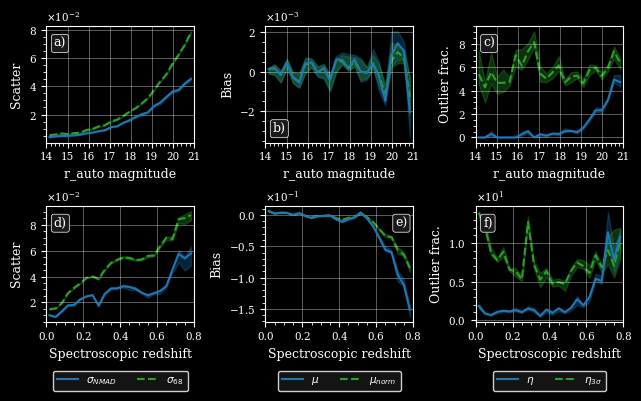

In [117]:
fig, axes = plt.subplots(2, 3, figsize=set_size(width=width, subplots=(2, 2), fraction=1), layout='constrained')

colors = ['C'+str(i) for i in range(10)] #plt.cm.plasma(np.linspace(0,0.8,3))

for i, metric in enumerate(['nmad', 'bias', 'outf']):
    if metric == 'nmad':
        label = '$\sigma_{NMAD}$'
    if metric == 'bias':
        label = '$\mu$'
    if metric == 'outf':
        label = '$\eta$'
    axes[0, i].plot(bins_mag[:-1]+mag_grid/2, np.nanmedian([metrics_1d_boot[i][metric]['r'] for i in range(n_boot)], axis=0), 
                    color=colors[0], lw=1.5, label=label)
    axes[0, i].fill_between(bins_mag[:-1]+mag_grid/2, 
                            np.nanpercentile([metrics_1d_boot[i][metric]['r'] for i in range(n_boot)], 16, axis=0), 
                            np.nanpercentile([metrics_1d_boot[i][metric]['r'] for i in range(n_boot)], 84, axis=0), 
                            color=colors[0], alpha=0.3)
    axes[1, i].plot(bins_z[:-1]+z_grid/2, np.nanmedian([metrics_1d_boot[i][metric]['z'] for i in range(n_boot)], axis=0), 
                    color=colors[0], lw=1.5, label=label)
    axes[1, i].fill_between(bins_z[:-1]+z_grid/2, 
                            np.nanpercentile([metrics_1d_boot[i][metric]['z'] for i in range(n_boot)], 16, axis=0), 
                            np.nanpercentile([metrics_1d_boot[i][metric]['z'] for i in range(n_boot)], 84, axis=0), 
                            color=colors[0], alpha=0.3)
    
    axes[0, i].set_xlabel(f'r_auto magnitude')
    axes[1, i].set_xlabel('Spectroscopic redshift')

plot_sig68 = True
if plot_sig68:
    axes[0, 0].plot(bins_mag[:-1]+mag_grid/2, np.nanmedian([metrics_1d_boot[i]['sig68']['r'] for i in range(n_boot)], axis=0), '--',
                    color=colors[2], lw=1.5, zorder=1, label='$\sigma_{68}$')
    axes[0, 0].fill_between(bins_mag[:-1]+mag_grid/2, 
                            np.nanpercentile([metrics_1d_boot[i]['sig68']['r'] for i in range(n_boot)], 16, axis=0),
                            np.nanpercentile([metrics_1d_boot[i]['sig68']['r'] for i in range(n_boot)], 84, axis=0), 
                            color=colors[2], alpha=0.3, zorder=1)
    axes[1, 0].plot(bins_z[:-1]+z_grid/2, np.nanmedian([metrics_1d_boot[i]['sig68']['z'] for i in range(n_boot)], axis=0), '--', 
                    color=colors[2], lw=1.5, zorder=1, label='$\sigma_{68}$')
    axes[1, 0].fill_between(bins_z[:-1]+z_grid/2, 
                            np.nanpercentile([metrics_1d_boot[i]['sig68']['z'] for i in range(n_boot)], 16, axis=0),
                            np.nanpercentile([metrics_1d_boot[i]['sig68']['z'] for i in range(n_boot)], 84, axis=0), 
                            color=colors[2], alpha=0.3, zorder=1)

plot_norm_bias = True
if plot_norm_bias:
    axes[0, 1].plot(bins_mag[:-1]+mag_grid/2, np.nanmedian([metrics_1d_boot[i]['bias_norm']['r'] for i in range(n_boot)], axis=0), '--', 
                    color=colors[2], lw=1.5, zorder=1, label='$\mu_{norm}$')
    axes[0, 1].fill_between(bins_mag[:-1]+mag_grid/2, 
                            np.nanpercentile([metrics_1d_boot[i]['bias_norm']['r'] for i in range(n_boot)], 16, axis=0),
                            np.nanpercentile([metrics_1d_boot[i]['bias_norm']['r'] for i in range(n_boot)], 84, axis=0), 
                            color=colors[2], alpha=0.3, zorder=1)
    axes[1, 1].plot(bins_z[:-1]+z_grid/2, np.nanmedian([metrics_1d_boot[i]['bias_norm']['z'] for i in range(n_boot)], axis=0), '--',
                    color=colors[2], lw=1.5, zorder=1, label='$\mu_{norm}$')
    axes[1, 1].fill_between(bins_z[:-1]+z_grid/2, 
                            np.nanpercentile([metrics_1d_boot[i]['bias_norm']['z'] for i in range(n_boot)], 16, axis=0),
                            np.nanpercentile([metrics_1d_boot[i]['bias_norm']['z'] for i in range(n_boot)], 84, axis=0), 
                            color=colors[2], alpha=0.3, zorder=1)
    
plot_outlier_nsigma = True
if plot_outlier_nsigma:
    axes[0, 2].plot(bins_mag[:-1]+mag_grid/2, np.nanmedian([metrics_1d_boot[i]['outf3s']['r'] for i in range(n_boot)], axis=0), '--', 
                    color=colors[2], lw=1.5, zorder=1, label='$\eta_{3\sigma}$')
    axes[0, 2].fill_between(bins_mag[:-1]+mag_grid/2, 
                            np.nanpercentile([metrics_1d_boot[i]['outf3s']['r'] for i in range(n_boot)], 16, axis=0),
                            np.nanpercentile([metrics_1d_boot[i]['outf3s']['r'] for i in range(n_boot)], 84, axis=0), 
                            color=colors[2], alpha=0.3, zorder=1)
    axes[1, 2].plot(bins_z[:-1]+z_grid/2, np.nanmedian([metrics_1d_boot[i]['outf3s']['z'] for i in range(n_boot)], axis=0), '--',
                    color=colors[2], lw=1.5, zorder=1, label='$\eta_{3\sigma}$')
    axes[1, 2].fill_between(bins_z[:-1]+z_grid/2, 
                            np.nanpercentile([metrics_1d_boot[i]['outf3s']['z'] for i in range(n_boot)], 16, axis=0),
                            np.nanpercentile([metrics_1d_boot[i]['outf3s']['z'] for i in range(n_boot)], 84, axis=0), 
                            color=colors[2], alpha=0.3, zorder=1)

axes[0, 1].set_xlabel(f'r_auto magnitude')
axes[1, 1].set_xlabel('Spectroscopic redshift')
    
# Text
axes[0, 0].text(0.05, 0.82, 'a)', transform=axes[0, 0].transAxes, bbox=bbox)
axes[1, 0].text(0.05, 0.82, 'd)', transform=axes[1, 0].transAxes, bbox=bbox)
axes[0, 1].text(0.05, 0.09, 'b)', transform=axes[0, 1].transAxes, bbox=bbox)
axes[1, 1].text(0.88, 0.82, 'e)', transform=axes[1, 1].transAxes, bbox=bbox)
axes[0, 2].text(0.05, 0.82, 'c)', transform=axes[0, 2].transAxes, bbox=bbox)
axes[1, 2].text(0.05, 0.82, 'f)', transform=axes[1, 2].transAxes, bbox=bbox)

for i in range(2):
    #axes[i, 0].set_ylabel(r'$\sigma_{NMAD}$')
    # axes[i, 1].set_ylabel(r'$\mu$')
    # axes[i, 2].set_ylabel(r'$\eta~(\%)$')
    axes[i, 0].set_ylabel('Scatter')
    axes[i, 1].set_ylabel('Bias')
    axes[i, 2].set_ylabel('Outlier frac.')

for i in range(3):
    axes[0, i].set_xlim(14, 21)
    axes[0, i].set_xticks(np.arange(14, 22, 1))
    axes[0, i].minorticks_on()
    axes[1, i].set_xlim(0, 0.8)
    axes[1, i].minorticks_on()

for ax in axes.reshape(-1):
    ax.grid(True)
    #ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.ticklabel_format(style='sci', scilimits=(0,0), axis='y', useMathText=True)

axes[1, 0].legend(loc='center', ncols=2, bbox_to_anchor=(0.5, -0.5))
axes[1, 1].legend(loc='center', ncols=2, bbox_to_anchor=(0.5, -0.5))
axes[1, 2].legend(loc='center', ncols=2, bbox_to_anchor=(0.5, -0.5))

plt.savefig(f'images/results_spe_metrics.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

##### Objects with missing features

In [118]:
cond_no_galex = (result_df['has_galex'] == False)
cond_no_vhs   = (result_df['has_vhs'] == False)
cond_no_unwise = (result_df['has_unwise'] == False)

cond_no_galex_vhs = cond_no_galex & cond_no_vhs
cond_no_galex_unwise = cond_no_galex & cond_no_unwise
cond_no_vhs_unwise = cond_no_vhs & cond_no_unwise

cond_nothing = cond_no_galex & cond_no_vhs & cond_no_unwise

cond_all = np.ones(len(result_df), dtype=bool)

In [119]:
print(f'No GALEX: {sum(cond_no_galex)}, {np.count_nonzero(cond_no_galex)/len(result_df)*100:.2f}%')
print(f'No VHS: {sum(cond_no_vhs)}, {np.count_nonzero(cond_no_vhs)/len(result_df)*100:.2f}%')
print(f'No UNWISE: {sum(cond_no_unwise)}, {np.count_nonzero(cond_no_unwise)/len(result_df)*100:.2f}%')

print(f'No GALEX and VHS: {sum(cond_no_galex_vhs)}, {np.count_nonzero(cond_no_galex_vhs)/len(result_df)*100:.2f}%')
print(f'No GALEX and UNWISE: {sum(cond_no_galex_unwise)}, {np.count_nonzero(cond_no_galex_unwise)/len(result_df)*100:.2f}%')
print(f'No VHS and UNWISE: {sum(cond_no_vhs_unwise)}, {np.count_nonzero(cond_no_vhs_unwise)/len(result_df)*100:.2f}%')

print(f'No GALEX, VHS and UNWISE: {sum(cond_nothing)}, {np.count_nonzero(cond_nothing)/len(result_df)*100:.2f}%')

No GALEX: 36629, 73.26%
No VHS: 27501, 55.00%
No UNWISE: 6922, 13.84%
No GALEX and VHS: 20705, 41.41%
No GALEX and UNWISE: 4641, 9.28%
No VHS and UNWISE: 3649, 7.30%
No GALEX, VHS and UNWISE: 2476, 4.95%


In [120]:
n_boot = 300

for cond, name in zip([cond_all, cond_no_galex, cond_no_vhs, cond_no_unwise], ['Full sample', 'No GALEX', 'No VHS', 'No unWISE']):
    nmad_all, bias_all, bias_n_all, outf_all, bias_auc_all = [], [], [], [], []

    for _ in range(n_boot):
        boot_sample = result_df[cond].sample(frac=1, replace=True).reset_index(drop=True)

        spec_z = boot_sample['z'].values
        photo_z = boot_sample['zml'].values
        delta = photo_z - spec_z

        nmad_all.append(1.48 * np.median(np.abs(delta - np.median(delta)) / (1 + spec_z)))
        bias_all.append(np.median(delta))
        bias_n_all.append(np.median(delta/ (1 + spec_z)))
        outf_all.append(np.count_nonzero(np.abs(delta) / (1 + spec_z) > 0.15) / len(spec_z) * 100)
        #bias_auc_all.append(np.trapz(np.abs(metrics['bias', 'r'])))

    nmad_mean, nmad_std = np.mean(nmad_all), np.std(nmad_all)
    bias_mean, bias_std = np.mean(bias_all), np.std(bias_all)
    bias_n_mean, bias_n_std = np.mean(bias_n_all), np.std(bias_n_all)
    outf_mean, outf_std = np.mean(outf_all), np.std(outf_all)
    #bias_auc_mean, bias_auc_std = np.mean(bias_auc_all), np.std(bias_auc_all)

    print(name)
    print(f"NMAD: {nmad_mean:.4f} +/- {nmad_std:.4f}")
    print(f"Absolute bias: {bias_mean:.3e} +/- {bias_std:.3e}")
    print(f"Normalized bias: {bias_n_mean:.3e} +/- {bias_n_std:.3e}")
    print(f"Outliers: {outf_mean:.4f} +/- {outf_std:.4f}")
    #print(f"Bias AUC: {bias_auc_mean:.3e} +/- {bias_auc_std:.3e}")
    print()

for cond, name in zip([cond_all, cond_no_galex_vhs, cond_no_galex_unwise, cond_no_vhs_unwise, cond_nothing], 
                      ['Full sample', 'No GALEX+VHS', 'No GALEX+WISE', 'No VHS+UNWISE', 'No crossmatches']):
    nmad_all, bias_all, bias_n_all, outf_all, bias_auc_all = [], [], [], [], []

    for _ in range(n_boot):
        boot_sample = result_df[cond].sample(frac=1, replace=True).reset_index(drop=True)

        spec_z = boot_sample['z'].values
        photo_z = boot_sample['zml'].values
        delta = photo_z - spec_z

        nmad_all.append(1.48 * np.median(np.abs(delta - np.median(delta)) / (1 + spec_z)))
        bias_all.append(np.median(delta))
        bias_n_all.append(np.median(delta/ (1 + spec_z)))
        outf_all.append(np.count_nonzero(np.abs(delta) / (1 + spec_z) > 0.15) / len(spec_z) * 100)
        #bias_auc_all.append(np.trapz(np.abs(metrics['bias', 'r'])))

    nmad_mean, nmad_std = np.mean(nmad_all), np.std(nmad_all)
    bias_mean, bias_std = np.mean(bias_all), np.std(bias_all)
    bias_n_mean, bias_n_std = np.mean(bias_n_all), np.std(bias_n_all)
    outf_mean, outf_std = np.mean(outf_all), np.std(outf_all)
    #bias_auc_mean, bias_auc_std = np.mean(bias_auc_all), np.std(bias_auc_all)

    print(name)
    print(f"NMAD: {nmad_mean:.4f} +/- {nmad_std:.4f}")
    print(f"Absolute bias: {bias_mean:.3e} +/- {bias_std:.3e}")
    print(f"Normalized bias: {bias_n_mean:.3e} +/- {bias_n_std:.3e}")
    print(f"Outliers: {outf_mean:.4f} +/- {outf_std:.4f}")
    #print(f"Bias AUC: {bias_auc_mean:.3e} +/- {bias_auc_std:.3e}")
    print()

Full sample
NMAD: 0.0211 +/- 0.0001
Absolute bias: 1.500e-04 +/- 1.104e-04
Normalized bias: 1.284e-04 +/- 9.389e-05
Outliers: 1.5060 +/- 0.0559

No GALEX
NMAD: 0.0225 +/- 0.0002
Absolute bias: 2.377e-04 +/- 1.576e-04
Normalized bias: 1.964e-04 +/- 1.313e-04
Outliers: 1.6465 +/- 0.0669

No VHS
NMAD: 0.0241 +/- 0.0003
Absolute bias: -2.371e-05 +/- 1.766e-04
Normalized bias: -2.037e-05 +/- 1.472e-04
Outliers: 1.7876 +/- 0.0765

No unWISE
NMAD: 0.0258 +/- 0.0005
Absolute bias: 1.751e-04 +/- 3.170e-04
Normalized bias: 1.570e-04 +/- 2.785e-04
Outliers: 4.0762 +/- 0.2412

Full sample
NMAD: 0.0211 +/- 0.0002
Absolute bias: 1.471e-04 +/- 1.097e-04
Normalized bias: 1.267e-04 +/- 9.424e-05
Outliers: 1.5018 +/- 0.0554

No GALEX+VHS
NMAD: 0.0253 +/- 0.0003
Absolute bias: -1.999e-05 +/- 2.208e-04
Normalized bias: -1.627e-05 +/- 1.790e-04
Outliers: 1.9151 +/- 0.0967

No GALEX+WISE
NMAD: 0.0284 +/- 0.0008
Absolute bias: -3.105e-05 +/- 5.164e-04
Normalized bias: -2.569e-05 +/- 4.393e-04
Outliers: 4.968

G:\Temp\ipykernel_4120\3969932570.py:69: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.savefig(f'images/results_spe_metrics_missing.{saveformat}', dpi=288, bbox_inches='tight')
G:\Temp\ipykernel_4120\3969932570.py:69: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.savefig(f'images/results_spe_metrics_missing.{saveformat}', dpi=288, bbox_inches='tight')
e:\Programas\Miniconda\envs\PyTorch\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


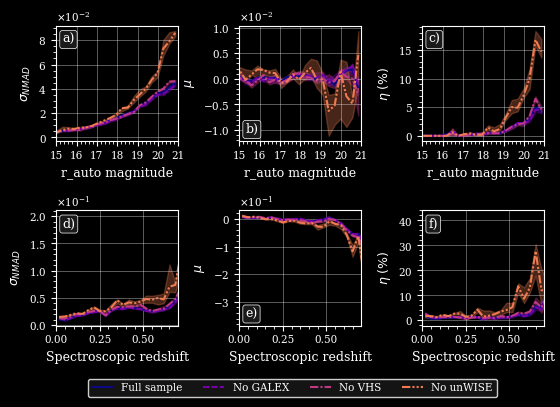

In [121]:
fig, axes = plt.subplots(2, 3, figsize=set_size(width=width, subplots=(2, 2), fraction=1), 
                         layout="tight")
plt.subplots_adjust(wspace=0.5, hspace=0.6)

colors = plt.cm.plasma(np.linspace(0,0.9,5))
dashes = [[1,0], [3,1,3,1], [4,1,1,1], [4,1,1,1,1,1], [4,1,1,1,1,1,1,1], [4,1,1,1,1,1,1,1,1,1], [4,1,1,1,1,1,1,1,1,1,1,1], [1,1]]
c_idx  = 0

n_boot = 10
for cond, name in zip([cond_all, cond_no_galex, cond_no_vhs, cond_no_unwise], ['Full sample', 'No GALEX', 'No VHS', 'No unWISE']):

    metrics_1d_boot_missing = []
    for i in range(n_boot):
        boot_sample = result_df[cond].sample(frac=1, replace=True).reset_index(drop=True)
        metrics_1d_boot_missing.append(calculate_metrics(boot_sample, f'r_{aperture}', magnitude_bins=bins_mag, redshift_bins=bins_z))

    for i, metric in enumerate(['nmad', 'bias', 'outf']):
        axes[0, i].plot(bins_mag[:-1]+mag_grid/2, 
                        np.nanmedian([metrics_1d_boot_missing[i][metric]['r'] for i in range(n_boot)], axis=0), dashes=dashes[c_idx],
                        color=colors[c_idx], lw=1.5, label=name)
        axes[0, i].fill_between(bins_mag[:-1]+mag_grid/2, 
                                np.nanpercentile([metrics_1d_boot_missing[i][metric]['r'] for i in range(n_boot)], 16, axis=0), 
                                np.nanpercentile([metrics_1d_boot_missing[i][metric]['r'] for i in range(n_boot)], 84, axis=0), 
                                color=colors[c_idx], alpha=0.3)
        axes[1, i].plot(bins_z[:-1]+z_grid/2, 
                        np.nanmedian([metrics_1d_boot_missing[i][metric]['z'] for i in range(n_boot)], axis=0), dashes=dashes[c_idx], 
                        color=colors[c_idx], lw=1.5)
        axes[1, i].fill_between(bins_z[:-1]+z_grid/2, 
                                np.nanpercentile([metrics_1d_boot_missing[i][metric]['z'] for i in range(n_boot)], 16, axis=0), 
                                np.nanpercentile([metrics_1d_boot_missing[i][metric]['z'] for i in range(n_boot)], 84, axis=0), 
                                color=colors[c_idx], alpha=0.3)
        
        axes[0, i].set_xlabel(f'r_auto magnitude')
        axes[1, i].set_xlabel('Spectroscopic redshift')

    c_idx = c_idx + 1

axes[0, 1].set_xlabel(f'r_auto magnitude')
axes[1, 1].set_xlabel('Spectroscopic redshift')
    
# Text
axes[0, 0].text(0.05, 0.85, 'a)', transform=axes[0, 0].transAxes, bbox=bbox)
axes[1, 0].text(0.05, 0.85, 'd)', transform=axes[1, 0].transAxes, bbox=bbox)
axes[0, 1].text(0.05, 0.07, 'b)', transform=axes[0, 1].transAxes, bbox=bbox)
axes[1, 1].text(0.05, 0.07, 'e)', transform=axes[1, 1].transAxes, bbox=bbox)
axes[0, 2].text(0.05, 0.85, 'c)', transform=axes[0, 2].transAxes, bbox=bbox)
axes[1, 2].text(0.05, 0.85, 'f)', transform=axes[1, 2].transAxes, bbox=bbox)

for i in range(2):
    axes[i, 0].set_ylabel(r'$\sigma_{NMAD}$')
    axes[i, 1].set_ylabel(r'$\mu$')
    axes[i, 2].set_ylabel(r'$\eta~(\%)$')

for i in range(3):
    axes[0, i].set_xlim(15, 21)
    axes[0, i].set_xticks(np.arange(15, 22, 1))
    axes[0, i].minorticks_on()
    axes[1, i].set_xlim(0, 0.7)
    axes[1, i].minorticks_on()

for ax in axes.reshape(-1):
    ax.grid(True)
    ax.ticklabel_format(style='sci', scilimits=(0,0), axis='y', useMathText=True)
axes[0, 2].ticklabel_format(style='plain')
axes[1, 2].ticklabel_format(style='plain')

axes[0, 0].legend(loc='center', bbox_to_anchor=(0.5, -0.05), ncol=4, bbox_transform=fig.transFigure)

plt.savefig(f'images/results_spe_metrics_missing.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

G:\Temp\ipykernel_17132\2100856919.py:29: RuntimeWarning: All-NaN slice encountered
  np.nanmedian([metrics_1d_boot_missing_extra[i][metric]['z'] for i in range(n_boot)], axis=0), dashes=dashes[c_idx],
e:\Programas\Miniconda\envs\PyTorch\Lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
G:\Temp\ipykernel_17132\2100856919.py:22: RuntimeWarning: All-NaN slice encountered
  np.nanmedian([metrics_1d_boot_missing_extra[i][metric]['r'] for i in range(n_boot)], axis=0), dashes=dashes[c_idx],
G:\Temp\ipykernel_17132\2100856919.py:73: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.savefig(f'images/results_spe_metrics_missing_extra.{saveformat}')
G:\Temp\ipykernel_17132\2100856919.py:73: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.savefig(f'images/result

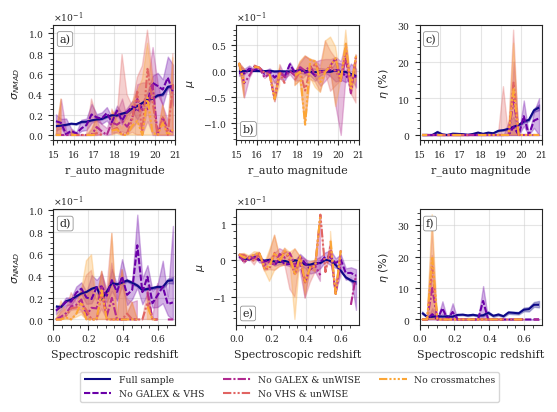

: 

: 

: 

: 

: 

In [320]:
fig, axes = plt.subplots(2, 3, figsize=set_size(width=width, subplots=(2, 2), fraction=1), 
                         layout="tight")
plt.subplots_adjust(wspace=0.5, hspace=0.6)

colors = plt.cm.plasma(np.linspace(0,0.8,5))
dashes = [[1,0], [3,1,3,1], [4,1,1,1], [4,1,1,1,1,1], [4,1,1,1,1,1,1,1], [4,1,1,1,1,1,1,1,1,1], [4,1,1,1,1,1,1,1,1,1,1,1], [1,1]]
c_idx  = 0

n_boot = 100
for cond, name in zip([cond_all, cond_no_galex_vhs, cond_no_galex_unwise, cond_no_vhs_unwise, cond_nothing], 
                      ['Full sample', 'No GALEX & VHS', 'No GALEX & unWISE', 'No VHS & unWISE', 'No crossmatches']):

    metrics_1d_boot_missing_extra = []
    for i in range(n_boot):
        boot_sample = result_df[cond].sample(frac=1, replace=True).reset_index(drop=True)
        metrics_1d_boot_missing_extra.append(calculate_metrics(boot_sample, f'r_{aperture}', magnitude_bins=bins_mag, redshift_bins=bins_z))

    for i, metric in enumerate(['nmad', 'bias', 'outf']):
        if i != 0:
            name = None
        axes[0, i].plot(bins_mag[:-1]+mag_grid/2, 
                        np.nanmedian([metrics_1d_boot_missing_extra[i][metric]['r'] for i in range(n_boot)], axis=0), dashes=dashes[c_idx],
                        color=colors[c_idx], lw=1.5, label=name)
        axes[0, i].fill_between(bins_mag[:-1]+mag_grid/2, 
                                np.nanpercentile([metrics_1d_boot_missing_extra[i][metric]['r'] for i in range(n_boot)], 16, axis=0), 
                                np.nanpercentile([metrics_1d_boot_missing_extra[i][metric]['r'] for i in range(n_boot)], 84, axis=0), 
                                color=colors[c_idx], alpha=0.3)
        axes[1, i].plot(bins_z[:-1]+z_grid/2, 
                        np.nanmedian([metrics_1d_boot_missing_extra[i][metric]['z'] for i in range(n_boot)], axis=0), dashes=dashes[c_idx], 
                        color=colors[c_idx], lw=1.5)
        axes[1, i].fill_between(bins_z[:-1]+z_grid/2, 
                                np.nanpercentile([metrics_1d_boot_missing_extra[i][metric]['z'] for i in range(n_boot)], 16, axis=0), 
                                np.nanpercentile([metrics_1d_boot_missing_extra[i][metric]['z'] for i in range(n_boot)], 84, axis=0), 
                                color=colors[c_idx], alpha=0.3)
        
        axes[0, i].set_xlabel(f'r_auto magnitude')
        axes[1, i].set_xlabel('Spectroscopic redshift')

    c_idx = c_idx + 1

axes[0, 1].set_xlabel(f'r_auto magnitude')
axes[1, 1].set_xlabel('Spectroscopic redshift')
    
# Text
axes[0, 0].text(0.05, 0.85, 'a)', transform=axes[0, 0].transAxes, bbox=bbox)
axes[1, 0].text(0.05, 0.85, 'd)', transform=axes[1, 0].transAxes, bbox=bbox)
axes[0, 1].text(0.05, 0.07, 'b)', transform=axes[0, 1].transAxes, bbox=bbox)
axes[1, 1].text(0.05, 0.07, 'e)', transform=axes[1, 1].transAxes, bbox=bbox)
axes[0, 2].text(0.05, 0.85, 'c)', transform=axes[0, 2].transAxes, bbox=bbox)
axes[1, 2].text(0.05, 0.85, 'f)', transform=axes[1, 2].transAxes, bbox=bbox)

for i in range(2):
    axes[i, 0].set_ylabel(r'$\sigma_{NMAD}$')
    axes[i, 1].set_ylabel(r'$\mu$')
    axes[i, 2].set_ylabel(r'$\eta~(\%)$')

for i in range(3):
    axes[0, i].set_xlim(15, 21)
    axes[0, i].set_xticks(np.arange(15, 22, 1))
    axes[0, i].minorticks_on()
    axes[1, i].set_xlim(0, 0.7)
    axes[1, i].minorticks_on()

for ax in axes.reshape(-1):
    ax.grid(True)
    ax.ticklabel_format(style='sci', scilimits=(0,0), axis='y', useMathText=True)
axes[0, 2].ticklabel_format(style='plain')
axes[1, 2].ticklabel_format(style='plain')

axes[0, 0].legend(loc='center', bbox_to_anchor=(0.5, -0.05), ncol=3, bbox_transform=fig.transFigure, handlelength=3)

plt.savefig(f'images/results_spe_metrics_missing_extra.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

##### Scatterplot

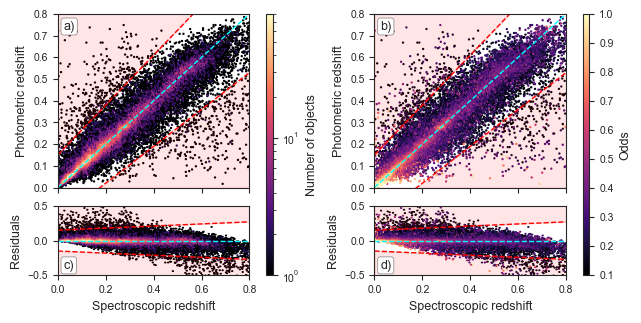

: 

In [111]:
fig = plt.figure(figsize=set_size(width=width, subplots=(1.6, 2), fraction=1))

x = np.linspace(0, 1, 100)
bbox = dict(facecolor='white', edgecolor='grey', lw=0.5, boxstyle='round,pad=0.2')

gs = gridspec.GridSpec(2, 2, figure=fig, width_ratios=[1, 1], height_ratios=[1, 0.4])

axes = {}

axes['scatter_n'] = fig.add_subplot(gs[0, 0])
scatter_n = axes['scatter_n'].hexbin(result_df['z'], result_df['zml'], 
                                    gridsize=200, vmin=1, vmax=80, bins='log', cmap='magma', rasterized=True)

axes['scatter_odds'] = fig.add_subplot(gs[0, 1])
scatter_o = axes['scatter_odds'].hexbin(result_df['z'], result_df['zml'], C=result_df['odds'], 
                                    gridsize=200, vmin=0.1, vmax=1, cmap='magma', rasterized=True)

axes['residuals_n'] = fig.add_subplot(gs[1, 0])
axes['residuals_n'].hexbin(result_df['z'], result_df['zml']-result_df['z'], 
                                    gridsize=200, vmin=1, vmax=80, bins='log', cmap='magma', rasterized=True)

axes['residuals_odds'] = fig.add_subplot(gs[1, 1])
axes['residuals_odds'].hexbin(result_df['z'], result_df['zml']-result_df['z'], C=result_df['odds'], 
                                    gridsize=200, vmin=0.1, vmax=1, cmap='magma', rasterized=True)

cbar_n = plt.colorbar(scatter_n, ax=[axes['scatter_n'], axes['residuals_n']], aspect=40)
cbar_o = plt.colorbar(scatter_o, ax=[axes['scatter_odds'], axes['residuals_odds']], aspect=40)

cbar_n.set_label('Number of objects')
cbar_o.set_label('Odds')

for ax in [axes['scatter_n'], axes['scatter_odds']]:
    ax.plot([0, 1], [0, 1], '--', lw=1, color='cyan')
    ax.fill_between(x=x, y1=x+0.15*(1+x), y2=1, color='red', alpha=0.10, label='Outlier region')
    ax.fill_between(x=x, y1=x-0.15*(1+x), y2=0, color='red', alpha=0.10)
    ax.plot([0, 1], [0.15, 1+0.15*(1+1)], '--', lw=1, color='red')
    ax.plot([0, 1], [-0.15, 1-0.15*(1+1)], '--', lw=1, color='red')
    ax.set_xlim(0, 0.8)
    ax.set_ylim(0, 0.8)
    ax.set_xticklabels([])
    ax.set_ylabel('Photometric redshift')

for ax in [axes['residuals_n'], axes['residuals_odds']]:
    ax.axhline(0, color='cyan', lw=1, linestyle='--')
    ax.fill_between(x=x, y1=0.15*(1+x), y2=0.5, color='red', alpha=0.10, label='Outlier region')
    ax.fill_between(x=x, y1=-0.15*(1+x), y2=-0.5, color='red', alpha=0.10)
    ax.plot(x, 0.15*(1+x), '--', lw=1, color='red')
    ax.plot(x, -0.15*(1+x), '--', lw=1, color='red')
    ax.set_xlim(0, 0.8)
    ax.set_ylim(-0.5, 0.5)
    ax.set_ylabel('Residuals')
    ax.set_xlabel('Spectroscopic redshift')

axes['scatter_n'].text(0.03, 0.91, 'a)', transform=axes['scatter_n'].transAxes, bbox=bbox)
axes['scatter_odds'].text(0.03, 0.91, 'b)', transform=axes['scatter_odds'].transAxes, bbox=bbox)
axes['residuals_n'].text(0.03, 0.1, 'c)', transform=axes['residuals_n'].transAxes, bbox=bbox)
axes['residuals_odds'].text(0.03, 0.1, 'd)', transform=axes['residuals_odds'].transAxes, bbox=bbox)

plt.savefig(f'images/results_scatterplot_residuals.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

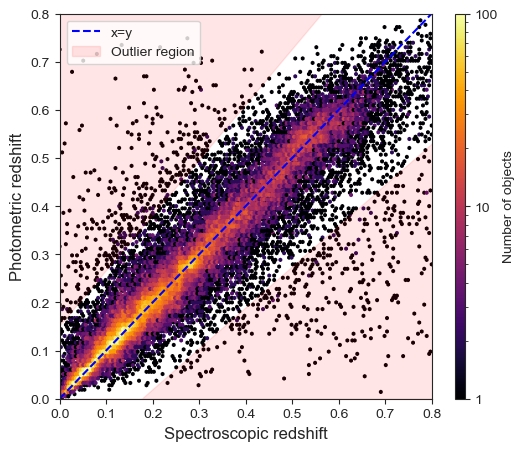

: 

: 

: 

In [20]:
fig = plt.figure(figsize=(6,5))
gs  = gridspec.GridSpec(1, 1, figure=fig)
ax  = fig.add_subplot(gs[0])
x   = np.linspace(0, 1, 100)

scatter_n = ax.hexbin(result_df['z'], result_df['zml'], gridsize=150, vmin=1, vmax=100, bins='log', cmap='inferno', extent=(0, 0.8, 0, 0.8), rasterized=True)

cbar = plt.colorbar(scatter_n, ax=ax, aspect=40)
cbar.set_label('Number of objects')
cbar.set_ticks([1, 10, 100])
cbar.set_ticklabels(['1', '10', '100'])

ax.plot([0, 1], [0, 1], '--', lw=1.5, color='blue', label='x=y')
ax.fill_between(x=x, y1=x+0.15*(1+x), y2=1, color='red', alpha=0.10, label='Outlier region')
ax.fill_between(x=x, y1=x-0.15*(1+x), y2=0, color='red', alpha=0.10)
#ax.plot([0, 1], [0.15, 1+0.15*(1+1)], '--', lw=1, color='red')
#ax.plot([0, 1], [-0.15, 1-0.15*(1+1)], '--', lw=1, color='red')
ax.set_xlim(0, 0.8)
ax.set_ylim(0, 0.8)
ax.set_ylabel('Photometric redshift', fontsize='large')
ax.set_xlabel('Spectroscopic redshift', fontsize='large')

ax.legend(loc='upper left')

plt.savefig(f'_results_scatterplot_claudia.png', dpi=288, bbox_inches='tight')

##### Metrics per field

In [110]:
result_df['Field'] = result_df['ID'].str.replace('iDR5_3_0_', '').str.replace('iDR5_3_', '').str[:-8]

In [9]:
# Load and process field lists
all_splus_footprint = pd.read_csv('_data/all_splus_current.csv')
idr5_splus_footprint = pd.read_csv('_data/iDR5_pointings.csv')
idr5_splus_footprint = idr5_splus_footprint[idr5_splus_footprint['Photometry'] == 'aperture']

idr5_splus_footprint['Field'] = idr5_splus_footprint['Field'].str.replace('STRIPE82-', 'STRIPE82_')
idr5_splus_footprint['Field'] = idr5_splus_footprint['Field'].str.replace('HYDRA-', 'HYDRA_')
idr5_splus_footprint['Field'] = idr5_splus_footprint['Field'].str.replace('HYDRA_D-', 'HYDRA_D_')

all_fields  = all_splus_footprint['NAME'].unique()
idr5_fields = idr5_splus_footprint['Field'].unique()

non_observed = np.setdiff1d(all_fields, idr5_fields)

all_splus_footprint = all_splus_footprint[all_splus_footprint['NAME'].isin(non_observed)]

: 

: 

In [10]:
cross_info = pd.read_csv('_data/crossmatched_stats.csv')

cross_info['field'] = cross_info['field'].str.replace('STRIPE82-', 'STRIPE82_')
cross_info['field'] = cross_info['field'].str.replace('HYDRA-', 'HYDRA_')
cross_info['field'] = cross_info['field'].str.replace('HYDRA_D-', 'HYDRA_D_')

cross_info['has_galex'] = cross_info['n_galex'] != 0
cross_info['has_vhs'] = cross_info['n_vhs'] != 0
cross_info['has_wise'] = cross_info['n_unwise'] != 0

merged_cross_idr5 = cross_info.merge(idr5_splus_footprint, left_on='field', right_on='Field')

: 

In [11]:
per_field_metrics = {
    'field': [],
    'median_r': [],
    'nmad': [],
    'sig68': [],
    'bias': [],
    'outliers': [],
    'outliers_3s': [],
    'odds': [],
    'number': []
}

for field in tqdm(result_df['Field'].unique()):
    data = result_df[result_df['Field'] == field]

    per_field_metrics['field'].append(field)
    if len(data) >= 3:
        per_field_metrics['median_r'].append(np.median(data['r_auto']))
        per_field_metrics['nmad'].append(1.48 * np.median(np.abs(data['zml'] - data['z']) / (1 + data['z'])))
        per_field_metrics['sig68'].append(np.mean((data['zml_68_upper'] - data['zml_68_lower']) / 2))
        per_field_metrics['bias'].append(np.median(data['zml'] - data['z']))
        per_field_metrics['outliers'].append(np.count_nonzero(np.abs(data['zml'] - data['z']) / (1 + data['z']) > 0.15) / len(data) * 100)
        per_field_metrics['outliers_3s'].append(np.count_nonzero(np.abs(data['zml'] - data['z']) / (1 + data['z']) > 3*1.48 * np.median(np.abs(data['zml'] - data['z']) / (1 + data['z']))) / len(data) * 100)
        per_field_metrics['odds'].append(np.median(data['odds']))
    else:
        per_field_metrics['median_r'].append(np.nan)
        per_field_metrics['nmad'].append(np.nan)
        per_field_metrics['sig68'].append(np.nan)
        per_field_metrics['bias'].append(np.nan)
        per_field_metrics['outliers'].append(np.nan)
        per_field_metrics['outliers_3s'].append(np.nan)
        per_field_metrics['odds'].append(np.nan)
    per_field_metrics['number'].append(len(data))

per_field_df = pd.DataFrame.from_dict(per_field_metrics)

per_field_df['field'] = per_field_df['field'].str.replace('STRIPE82-', 'STRIPE82_')
per_field_df['field'] = per_field_df['field'].str.replace('HYDRA-', 'HYDRA_')
per_field_df['field'] = per_field_df['field'].str.replace('HYDRA_D-', 'HYDRA_D_')

footprint_metrics_merged = pd.merge(merged_cross_idr5, per_field_df, left_on='NAME', right_on='field')

  0%|          | 0/1818 [00:00<?, ?it/s]

: 

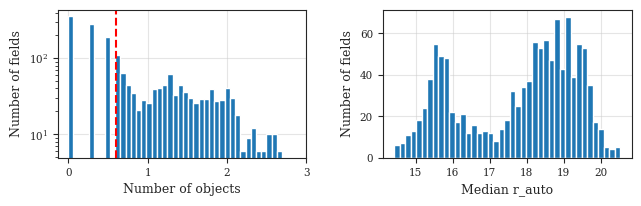

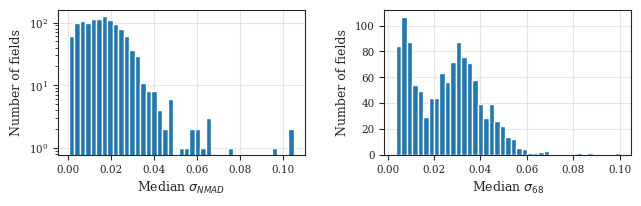

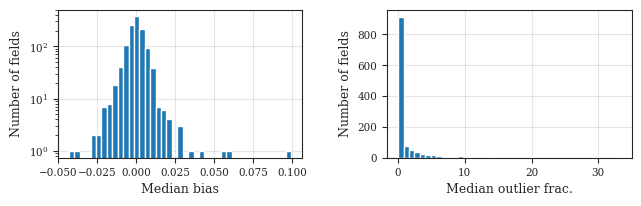

: 

In [22]:
fig = plt.figure(figsize=set_size(width=width, subplots=(1, 2), fraction=1))

gs   = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[1, 1], wspace=0.1)
axes = {0: fig.add_subplot(gs[0, 0]), 1: fig.add_subplot(gs[0, 1])}

axes[0].hist(np.log10(footprint_metrics_merged['number']), bins=41)
axes[0].set_yscale('log')
axes[0].axvline(np.log10(4), color='red', linestyle='--')
axes[0].set_xticks(np.arange(0, 4, 1))
axes[0].set_xlabel('Number of objects')
axes[0].set_ylabel('Number of fields')

axes[1].hist(footprint_metrics_merged['median_r'], bins=41)
axes[1].set_xlabel('Median r_auto')
axes[1].set_ylabel('Number of fields')

plt.show()



fig = plt.figure(figsize=set_size(width=width, subplots=(1, 2), fraction=1))

gs   = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[1, 1], wspace=0.1)
axes = {0: fig.add_subplot(gs[0, 0]), 1: fig.add_subplot(gs[0, 1])}

axes[0].hist(footprint_metrics_merged['nmad'], bins=41)
axes[0].set_yscale('log')
axes[0].set_xlabel('Median $\sigma_{NMAD}$')
axes[0].set_ylabel('Number of fields')

axes[1].hist(footprint_metrics_merged['sig68'], bins=41)
axes[1].set_xlabel('Median $\sigma_{68}$')
axes[1].set_ylabel('Number of fields')

plt.show()



fig = plt.figure(figsize=set_size(width=width, subplots=(1, 2), fraction=1))

gs   = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[1, 1], wspace=0.1)
axes = {0: fig.add_subplot(gs[0, 0]), 1: fig.add_subplot(gs[0, 1])}

axes[0].hist(footprint_metrics_merged['bias'], bins=41)
axes[0].set_yscale('log')
axes[0].set_xlabel('Median bias')
axes[0].set_ylabel('Number of fields')

axes[1].hist(footprint_metrics_merged['outliers'], bins=41)
axes[1].set_xlabel('Median outlier frac.')
axes[1].set_ylabel('Number of fields')

plt.show()

In [13]:
mw_line = SkyCoord(l=np.linspace(0, 360, 1000), 
                   b=np.zeros(1000), 
                   unit=u.deg, 
                   frame='galactic')
mw_line = mw_line.transform_to('icrs')

: 

In [24]:
# # Sample data
# RA = np.random.uniform(0, 360, 1000)  # Simulating RA values
# DEC = np.random.uniform(-90, 90, 1000)  # Simulating DEC values
# z = np.random.rand(1000)  # Simulating z values
# zml = z + np.random.normal(0, 0.1, 1000)  # Simulating zml values as noisy z

# # First, create the hexbin plot to generate the hexagons and binning
# hb = plt.hexbin(RA, DEC, gridsize=10, cmap='plasma')

# # Access the hexagon centers and binning information
# xcenters = hb.get_offsets()[:, 0]  # RA centers of the hexagons
# ycenters = hb.get_offsets()[:, 1]  # DEC centers of the hexagons
# bin_counts = hb.get_array()        # Number of points in each hexagon bin

# # Now, you can use these to find the limits or apply custom calculations
# # For example, get the vertices of the base hexagon
# verts = hb.get_paths() # Get the vertices of a base hexagon
# base_hex_x = verts[0].vertices[:, 0]  # RA vertices of the base hexagon
# base_hex_y = verts[0].vertices[:, 1]  # DEC vertices of the base hexagon

# # Print example of vertices for the first hexagon
# # Outline the first hexagon
# for n, i in enumerate(range(len(xcenters))):
#     plt.plot(base_hex_x+xcenters[i], base_hex_y+ycenters[i], color='red')
#     plt.text(xcenters[i], ycenters[i], str(n), color='yellow', ha='center', va='center')
    
# plt.colorbar(label='Counts')  # This colorbar shows counts, but you can adjust for custom calculations
# plt.xlabel('RA')
# plt.ylabel('DEC')
# plt.show()

: 

In [25]:
# import matplotlib.path as mpath

# # Create hexbin plot where the color corresponds to the mean of z in each bin (just here to get the center of each hexagon)
# hb = plt.hexbin(result_df['RA'], result_df['DEC'], gridsize=150, cmap='viridis', mincnt=1, extent=(0, 360, -65, 10))
# plt.close()

# # Create a new plot
# fig, ax = plt.subplots(figsize=(10, 5))

# # Access the hexagon centers and binning information
# xcenters = hb.get_offsets()[:, 0]  # RA centers of the hexagons
# ycenters = hb.get_offsets()[:, 1]  # DEC centers of the hexagons
# bin_counts = hb.get_array()        # Number of points in each hexagon bin

# # Now, you can use these to find the limits or apply custom calculations
# # For example, get the vertices of the base hexagon
# verts = hb.get_paths() # Get the vertices of a base hexagon
# base_hex_x = verts[0].vertices[:, 0]  # RA vertices of the base hexagon
# base_hex_y = verts[0].vertices[:, 1]  # DEC vertices of the base hexagon

# # Create a Path object for the base hexagon
# hexagon_path = mpath.Path(np.column_stack((base_hex_x, base_hex_y)))
# # Add path to image for reference
# plt.gca().add_patch(mpatches.PathPatch(hexagon_path, facecolor='none', edgecolor='red'))

# # Configure the colormap and normalization
# colormap = matplotlib.colormaps['viridis']
# norm = matplotlib.colors.Normalize(vmin=0, vmax=0.03)

# # Calculate the mean z in each hexagon and create a path that plots the hexagon with the color corresponding to the mean z
# coords = np.column_stack((result_df['RA'], result_df['DEC']))
# for i in tqdm(range(len(xcenters))):
#     # Define the center of the hexagon
#     hexagon_RA = base_hex_x+xcenters[i]
#     hexagon_DEC = base_hex_y+ycenters[i]
#     # Define the hexagon path
#     hexagon_vertices = np.column_stack((hexagon_RA, hexagon_DEC))
#     hexagon_path = mpath.Path(hexagon_vertices)
#     # Get data that is inside the hexagon
#     inside_hexagon = hexagon_path.contains_points(coords)
#     df_inside_hexagon = result_df[inside_hexagon]
#     # Calculate the metric
#     abs_delta = np.abs(df_inside_hexagon['zml'] - df_inside_hexagon['z'])
#     metric = 1.48 * np.median(abs_delta / (1 + df_inside_hexagon['z']))
#     # Add a path, colored by the metric value, to the plot
#     plt.gca().add_patch(mpatches.PathPatch(hexagon_path, facecolor=colormap(norm(metric)), edgecolor=colormap(norm(metric))))

# ax.set_xlim(0, 360)
# ax.set_ylim(-65, 10)

# plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), label='Mean RA')

# plt.show()

: 

In [26]:
per_field_projection = False

if per_field_projection:

    def plot_square_path(center_ra, center_dec, size, plot_kwargs={}, ax=None):
        if ax is None:
            ax = plt.gca()
        
        size_x = size/np.cos(center_dec)
        size_y = size

        patch = mpatches.Rectangle((center_ra-size, center_dec-size), size_x, size_y, **plot_kwargs)
        ax.add_patch(patch)

    for metric in [s for s in per_field_metrics.keys() if 'field' not in s]:
        if metric == 'median_r':
            label = 'Median r_auto'
        elif metric == 'nmad':  
            label = r'$\sigma_{NMAD}$'
        elif metric == 'bias':
            label = 'Bias'
        elif metric == 'outliers':
            label = 'Outliers (%)'
        elif metric == 'odds':
            label = 'Odds'
        elif metric == 'sigma68':
            label = r'$\sigma_{68}$'
        elif metric == 'number':
            label = 'Number of objects'

        fig, ax = plt.subplots(1, 1, figsize=set_size(width), subplot_kw=dict(projection='aitoff'), layout='tight')

        sorted_gal_idx = np.argsort(mw_line.ra.wrap_at('180d').radian)
        plt.plot(-mw_line.ra.wrap_at('180d').radian[sorted_gal_idx], mw_line.dec.radian[sorted_gal_idx], 
                color='C1', label='Milky Way plane', zorder=-1)

        # Do plots
        if metric != 'bias':
            colormap = matplotlib.colormaps['viridis']
            norm = matplotlib.colors.Normalize(vmin=footprint_metrics_merged[metric].min(), 
                                            vmax=np.nanpercentile(footprint_metrics_merged[metric], [90]))
        else:
            colormap = matplotlib.colormaps['coolwarm']
            norm = matplotlib.colors.TwoSlopeNorm(vmin=-0.05, vcenter=0., vmax=+0.05)


        colormap.set_bad(color='grey')

        foot_coord = SkyCoord(ra=footprint_metrics_merged['RA'], dec=footprint_metrics_merged['DEC'], unit=(u.hour, u.deg), frame='icrs')
        for i, obj in enumerate(foot_coord):
            plot_square_path(-obj.ra.wrap_at('180d').radian, obj.dec.radian, 1.4*np.pi/180,
                            plot_kwargs={'edgecolor':'none', 'facecolor':colormap(norm(footprint_metrics_merged[metric].loc[i])), 
                                        'lw':0.4, 'alpha':1, 'rasterized':True}, ax=ax)

        # Legend
        milky_way_line = mlines.Line2D([], [], color='C1', label='Milky Way plane')
        plt.legend(handles=[milky_way_line], loc='upper right')

        xtick_coord = SkyCoord(ra=np.arange(-150, 180, 30), 
                            dec=np.ones(len(np.arange(-150, 180, 30)))*15, unit=(u.deg, u.deg), frame='icrs')
        for i, tick_label in enumerate([s.get_text() for s in ax.get_xticklabels()]):
            plt.text(xtick_coord.ra.wrap_at('180d').radian[i], xtick_coord.dec.radian[i], tick_label, ha='center', fontsize='small')
        ax.set_xticklabels([])

        plt.ylabel('Declination')
        plt.xlabel('Right ascension')

        cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, orientation='vertical', fraction=0.025, pad=0.05, extend='max' if metric != 'bias' else 'both')
        cbar.set_label(label)

        plt.grid(True)

        plt.subplots_adjust(top=0.90, right=0.90)
        #plt.savefig(f'images/results_all_sky_{metric}.{saveformat}', dpi=288, bbox_inches='tight')
        plt.show()

: 

In [27]:
# # AIO
# def plot_square_path_cartesian(center_ra, center_dec, size, plot_kwargs={}, ax=None):
#     if ax is None:
#         ax = plt.gca()
    
#     size_x = size/np.cos(center_dec*np.pi/180)
#     size_y = size

#     patch = mpatches.Rectangle((center_ra-size, center_dec-size), size_x, size_y, **plot_kwargs)
#     ax.add_patch(patch)

# fig, axes = plt.subplots(3, 2, figsize=set_size(width=width, subplots=(3, 2), fraction=1), subplot_kw=dict(projection='aitoff'))

# foot_coord = SkyCoord(ra=footprint_metrics_merged['RA'], dec=footprint_metrics_merged['DEC'], unit=(u.hour, u.deg), frame='icrs')

# for i, metric in enumerate(['nmad', 'bias', 'outliers', 'odds', 'sigma68', 'number']):
#     if metric == 'nmad':
#         label = r'$\sigma_{NMAD}$'
#     elif metric == 'bias':
#         label = 'Bias'
#     elif metric == 'outliers':
#         label = 'Outliers (%)'
#     elif metric == 'odds':
#         label = 'Odds'
#     elif metric == 'sigma68':
#         label = r'$\sigma_{68}$'
#     elif metric == 'number':
#         label = 'Number of objects'

#     ax = axes[i//2, i%2]

#     sorted_gal_idx = np.argsort(mw_line.ra.wrap_at('180d').radian)
#     ax.plot(-mw_line.ra.wrap_at('180d').radian[sorted_gal_idx], mw_line.dec.radian[sorted_gal_idx], 
#             color='C1', label='Milky Way plane', zorder=-1)

#     # Do plots
#     if metric != 'bias':
#         colormap = matplotlib.colormaps['viridis']
#     else:
#         colormap = matplotlib.colormaps['coolwarm']

#     colormap.set_bad(color='grey')
#     norm = matplotlib.colors.Normalize(vmin=footprint_metrics_merged[metric].min(), 
#                                        vmax=np.nanpercentile(footprint_metrics_merged[metric], [90]))

#     for j, obj in enumerate(foot_coord):
#         plot_square_path(-obj.ra.wrap_at('180d').radian, obj.dec.radian, 1.4*np.pi/180,
#                                    plot_kwargs={'edgecolor':'none', 
#                                                 'facecolor':colormap(norm(footprint_metrics_merged[metric].loc[j])), 
#                                                 'lw':0.4, 'alpha':1, 'rasterized':True}, ax=ax)
        
#     ax.set_xticks(np.array([-150+10, -120+5, -90+2.5, -60+1.5, -30, 0, 30, 60-1.5, 90-2.5, 120-5, 150-10])*np.pi/180, 
#                 [s+'\n\n' for s in ['150$^\circ$', '120$^\circ$', '90$^\circ$', '60$^\circ$', '30$^\circ$', '0$^\circ$', 
#                 '-30$^\circ$', '-60$^\circ$', '-90$^\circ$', '-120$^\circ$', '-150$^\circ$']],
#                 zorder=10)
#     cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, orientation='vertical', fraction=0.025, pad=0.05, extend='max')
#     cbar.set_label(label)

# fig.text(0.5, -0.02, 'Right ascension [deg]', ha='center')
# fig.text(-0.02, 0.5, 'Declination [deg]', va='center', rotation='vertical')

# plt.savefig(f'images/results_aio_aitoff.{saveformat}', dpi=288)
# plt.show()

: 

In [28]:
# # AIO
# def plot_square_path_cartesian(center_ra, center_dec, size, plot_kwargs={}, ax=None):
#     if ax is None:
#         ax = plt.gca()
    
#     size_x = size/np.cos(center_dec*np.pi/180)
#     size_y = size

#     patch = mpatches.Rectangle((center_ra-size, center_dec-size), size_x, size_y, **plot_kwargs)
#     ax.add_patch(patch)

# fig, axes = plt.subplots(3, 2, figsize=set_size(width=width, subplots=(3, 2), fraction=1))

# foot_coord = SkyCoord(ra=footprint_metrics_merged['RA'], dec=footprint_metrics_merged['DEC'], unit=(u.hour, u.deg), frame='icrs')

# for i, metric in enumerate(['nmad', 'bias', 'outliers', 'odds', 'sigma68', 'number']):
#     if metric == 'nmad':
#         label = r'$\sigma_{NMAD}$'
#     elif metric == 'bias':
#         label = 'Bias'
#     elif metric == 'outliers':
#         label = 'Outliers (%)'
#     elif metric == 'odds':
#         label = 'Odds'
#     elif metric == 'sigma68':
#         label = r'$\sigma_{68}$'
#     elif metric == 'number':
#         label = 'Number of objects'

#     ax = axes[i//2, i%2]

#     sorted_gal_idx = np.argsort(mw_line.ra.wrap_at('180d').radian)
#     ax.plot(-mw_line.ra.wrap_at('180d').deg[sorted_gal_idx], mw_line.dec.deg[sorted_gal_idx], 
#             color='C1', label='Milky Way plane', zorder=-1)

#     # Do plots
#     if metric != 'bias':
#         colormap = matplotlib.colormaps['viridis']
#     else:
#         colormap = matplotlib.colormaps['coolwarm']

#     colormap.set_bad(color='grey')
#     norm = matplotlib.colors.Normalize(vmin=footprint_metrics_merged[metric].min(), 
#                                        vmax=np.nanpercentile(footprint_metrics_merged[metric], [90]))

#     for j, obj in enumerate(foot_coord):
#         plot_square_path_cartesian(-obj.ra.wrap_at('180d').deg, obj.dec.deg, 1.4,
#                                    plot_kwargs={'edgecolor': 'none', 
#                                                 'facecolor': colormap(norm(footprint_metrics_merged[metric].loc[j])), 
#                                                 'lw':0.4, 'alpha':1, 'rasterized':True}, ax=ax)
        
#     ax.set_ylim(-65, 10)
#     ax.set_xlim(-180, 180)

#     cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, orientation='vertical', fraction=0.05, pad=0.05, extend='max')
#     cbar.set_label(label)

# fig.text(0.5, -0.02, 'Right ascension [deg]', ha='center')
# fig.text(-0.02, 0.5, 'Declination [deg]', va='center', rotation='vertical')
    
# plt.savefig(f'images/results_aio_cartesian.{saveformat}', dpi=288)
# plt.show()

: 

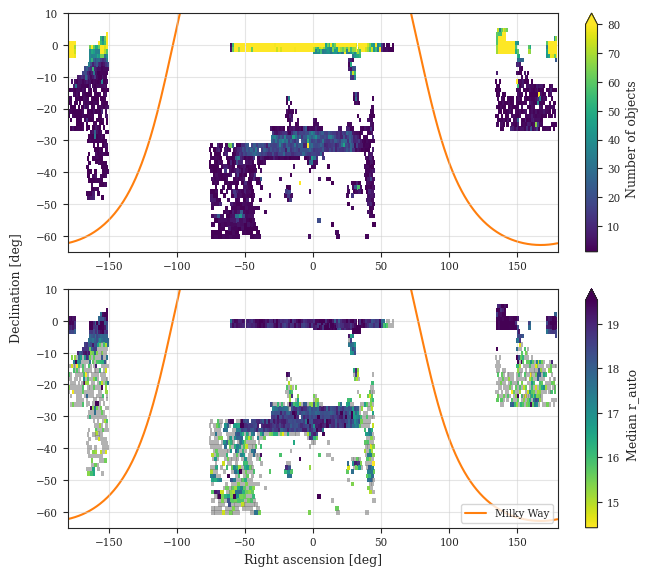

: 

In [15]:
# AIO
def plot_square_path_cartesian(center_ra, center_dec, size, plot_kwargs={}, ax=None):
    if ax is None:
        ax = plt.gca()
    
    size_x = size / np.cos(np.deg2rad(center_dec))
    size_y = size

    patch = mpatches.Rectangle((center_ra-size, center_dec-size), size_x, size_y, **plot_kwargs)
    ax.add_patch(patch)

fig, axes = plt.subplots(2, 1, figsize=set_size(width=width, subplots=(1.5, 1), fraction=1), layout='tight')

foot_coord = SkyCoord(ra=footprint_metrics_merged['RA'], dec=footprint_metrics_merged['DEC'], unit=(u.hour, u.deg), frame='icrs')

for i, metric in enumerate(['number', 'median_r']):
    if metric == 'nmad':
        label = r'$\sigma_{NMAD}$'
    elif metric == 'bias':
        label = 'Bias'
    elif metric == 'outliers':
        label = 'Outliers (%)'
    elif metric == 'odds':
        label = 'Odds'
    elif metric == 'sig68':
        label = r'$\sigma_{68}$'
    elif metric == 'number':
        label = 'Number of objects'
    elif metric == 'median_r':
        label = 'Median r_auto'

    ax = axes[i]

    sorted_gal_idx = np.argsort(mw_line.ra.wrap_at('180d').radian)
    ax.plot(-mw_line.ra.wrap_at('180d').deg[sorted_gal_idx], mw_line.dec.deg[sorted_gal_idx], 
            color='C1', label='Milky Way', zorder=-1)

    # Do plots
    if metric == 'median_r':
        colormap = matplotlib.colormaps['viridis_r']
        norm = matplotlib.colors.Normalize(vmin=footprint_metrics_merged[metric].min(), 
                                           vmax=np.nanpercentile(footprint_metrics_merged[metric], [90]))
    elif metric == 'bias':
        colormap = matplotlib.colormaps['coolwarm']
        norm = matplotlib.colors.TwoSlopeNorm(vmin=-0.05, vcenter=0., vmax=+0.05)

    else:
        colormap = matplotlib.colormaps['viridis']
        norm = matplotlib.colors.Normalize(vmin=footprint_metrics_merged[metric].min(), 
                                           vmax=np.nanpercentile(footprint_metrics_merged[metric], [90]))

    colormap.set_bad(color='grey', alpha=0.6)

    for j, obj in enumerate(foot_coord):
        plot_square_path_cartesian(-obj.ra.wrap_at('180d').deg, obj.dec.deg, 1.4,
                                   plot_kwargs={'edgecolor': 'none', 
                                                'facecolor': colormap(norm(footprint_metrics_merged[metric].loc[j])), 
                                                'lw':0.4, 'rasterized':True}, ax=ax)
        
    ax.set_ylim(-65, 10)
    ax.set_xlim(-180, 180)

    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, orientation='vertical', fraction=0.05, pad=0.05, extend='max')
    cbar.set_label(label)

#fig.text(0.5, -0.02, 'Right ascension [deg]', ha='center')
ax.set_xlabel('Right ascension [deg]')
fig.text(-0.02, 0.5, 'Declination [deg]', va='center', rotation='vertical')
#fig.supylabel('Declination [deg]', x=-0.0, ha='center')
    
ax.legend(loc='lower right')

fig.align_ylabels()

plt.savefig(f'images/results_fbyf_cartesian_info.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

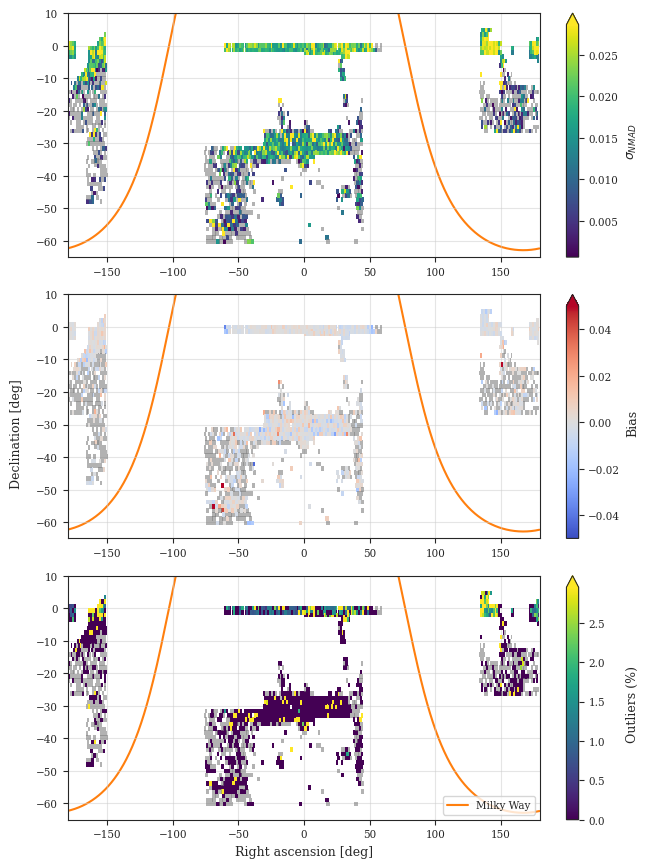

: 

In [18]:
# AIO
def plot_square_path_cartesian(center_ra, center_dec, size, plot_kwargs={}, ax=None):
    if ax is None:
        ax = plt.gca()
    
    size_x = size / np.cos(np.deg2rad(center_dec))
    size_y = size

    patch = mpatches.Rectangle((center_ra-size, center_dec-size), size_x, size_y, **plot_kwargs)
    ax.add_patch(patch)

fig, axes = plt.subplots(3, 1, figsize=set_size(width=width, subplots=(3*0.75, 1), fraction=1), layout='tight')

foot_coord = SkyCoord(ra=footprint_metrics_merged['RA'], dec=footprint_metrics_merged['DEC'], unit=(u.hour, u.deg), frame='icrs')

for i, metric in enumerate(['nmad', 'bias', 'outliers']):#, 'odds', 'sigma68', 'number']):
    if metric == 'nmad':
        label = r'$\sigma_{NMAD}$'
    elif metric == 'bias':
        label = 'Bias'
    elif metric == 'outliers':
        label = 'Outliers (%)'
    elif metric == 'odds':
        label = 'Odds'
    elif metric == 'sig68':
        label = r'$\sigma_{68}$'
    elif metric == 'number':
        label = 'Number of objects'
    elif metric == 'median_r':
        label = 'Median r_auto'

    ax = axes[i]

    sorted_gal_idx = np.argsort(mw_line.ra.wrap_at('180d').radian)
    ax.plot(-mw_line.ra.wrap_at('180d').deg[sorted_gal_idx], mw_line.dec.deg[sorted_gal_idx], 
            color='C1', label='Milky Way', zorder=-1)

    # Do plots
    if metric == 'median_r':
        colormap = matplotlib.colormaps['viridis_r']
        norm = matplotlib.colors.Normalize(vmin=footprint_metrics_merged[metric].min(), 
                                           vmax=np.nanpercentile(footprint_metrics_merged[metric], [90]))
    elif metric == 'bias':
        colormap = matplotlib.colormaps['coolwarm']
        norm = matplotlib.colors.TwoSlopeNorm(vmin=-0.05, vcenter=0., vmax=+0.05)

    else:
        colormap = matplotlib.colormaps['viridis']
        norm = matplotlib.colors.Normalize(vmin=footprint_metrics_merged[metric].min(), 
                                           vmax=np.nanpercentile(footprint_metrics_merged[metric], [90]))

    colormap.set_bad(color='grey', alpha=0.6)

    for j, obj in enumerate(foot_coord):
        plot_square_path_cartesian(-obj.ra.wrap_at('180d').deg, obj.dec.deg, 1.4,
                                   plot_kwargs={'edgecolor': 'none', 
                                                'facecolor': colormap(norm(footprint_metrics_merged[metric].loc[j])), 
                                                'lw':0.4, 'rasterized':True}, ax=ax)
        
    ax.set_ylim(-65, 10)
    ax.set_xlim(-180, 180)

    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, orientation='vertical', fraction=0.05, pad=0.05, extend='max')
    cbar.set_label(label)

#fig.text(0.5, -0.02, 'Right ascension [deg]', ha='center')
ax.set_xlabel('Right ascension [deg]')
fig.text(-0.02, 0.5, 'Declination [deg]', va='center', rotation='vertical')
#fig.supylabel('Declination [deg]', x=-0.0, ha='center')
    
ax.legend(loc='lower right')

fig.align_ylabels()

plt.savefig(f'images/results_fbyf_cartesian_spe.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

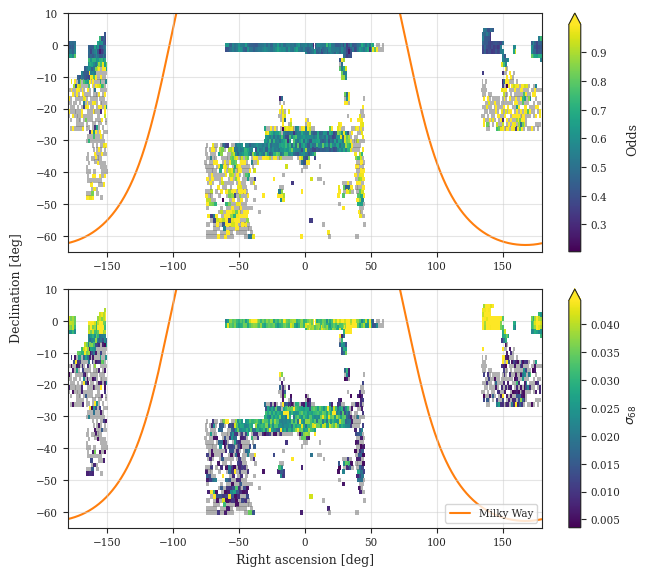

: 

In [19]:
# AIO
def plot_square_path_cartesian(center_ra, center_dec, size, plot_kwargs={}, ax=None):
    if ax is None:
        ax = plt.gca()
    
    size_x = size / np.cos(np.deg2rad(center_dec))
    size_y = size

    patch = mpatches.Rectangle((center_ra-size, center_dec-size), size_x, size_y, **plot_kwargs)
    ax.add_patch(patch)

fig, axes = plt.subplots(2, 1, figsize=set_size(width=width, subplots=(1.5, 1), fraction=1), layout='tight')

foot_coord = SkyCoord(ra=footprint_metrics_merged['RA'], dec=footprint_metrics_merged['DEC'], unit=(u.hour, u.deg), frame='icrs')

for i, metric in enumerate(['odds', 'sig68']):
    if metric == 'nmad':
        label = r'$\sigma_{NMAD}$'
    elif metric == 'bias':
        label = 'Bias'
    elif metric == 'outliers':
        label = 'Outliers (%)'
    elif metric == 'odds':
        label = 'Odds'
    elif metric == 'sig68':
        label = r'$\sigma_{68}$'
    elif metric == 'number':
        label = 'Number of objects'
    elif metric == 'median_r':
        label = 'Median r_auto'

    ax = axes[i]

    sorted_gal_idx = np.argsort(mw_line.ra.wrap_at('180d').radian)
    ax.plot(-mw_line.ra.wrap_at('180d').deg[sorted_gal_idx], mw_line.dec.deg[sorted_gal_idx], 
            color='C1', label='Milky Way', zorder=-1)

    # Do plots
    if metric == 'median_r':
        colormap = matplotlib.colormaps['viridis_r']
        norm = matplotlib.colors.Normalize(vmin=footprint_metrics_merged[metric].min(), 
                                           vmax=np.nanpercentile(footprint_metrics_merged[metric], [90]))
    elif metric == 'bias':
        colormap = matplotlib.colormaps['coolwarm']
        norm = matplotlib.colors.TwoSlopeNorm(vmin=-0.05, vcenter=0., vmax=+0.05)

    else:
        colormap = matplotlib.colormaps['viridis']
        norm = matplotlib.colors.Normalize(vmin=footprint_metrics_merged[metric].min(), 
                                           vmax=np.nanpercentile(footprint_metrics_merged[metric], [90]))

    colormap.set_bad(color='grey', alpha=0.6)

    for j, obj in enumerate(foot_coord):
        plot_square_path_cartesian(-obj.ra.wrap_at('180d').deg, obj.dec.deg, 1.4,
                                   plot_kwargs={'edgecolor': 'none', 
                                                'facecolor': colormap(norm(footprint_metrics_merged[metric].loc[j])), 
                                                'lw':0.4, 'rasterized':True}, ax=ax)
        
    ax.set_ylim(-65, 10)
    ax.set_xlim(-180, 180)

    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, orientation='vertical', fraction=0.05, pad=0.05, extend='max')
    cbar.set_label(label)

#fig.text(0.5, -0.02, 'Right ascension [deg]', ha='center')
ax.set_xlabel('Right ascension [deg]')
fig.text(-0.02, 0.5, 'Declination [deg]', va='center', rotation='vertical')
#fig.supylabel('Declination [deg]', x=-0.0, ha='center')
    
ax.legend(loc='lower right')

fig.align_ylabels()

plt.savefig(f'images/results_fbyf_cartesian_pdf.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

##### Comparison with SDSS and DECam

In [7]:
s82_sdss = pd.read_csv('_data/2024-10-30/train/merged_result_df_s82_sdss_decam.csv')

s82_sdss['r_auto_corrected'] = s82_sdss['r_auto'] - s82_sdss['r_ext']
s82_sdss = s82_sdss.reset_index(drop=True)

spec_z = s82_sdss['z'].values
photo_z = s82_sdss['zml'].values
delta = photo_z - spec_z

nmad = 1.48 * np.median(abs(delta - np.median(delta)) / (1+spec_z))
print(f"NMAD: {nmad:.4f}")
print(f"Bias: {np.median(delta):.3e}")
print(f"Normalized bias: {np.median(delta)/(1+np.median(spec_z)):.3e}")
print(f"Outliers 0.15: {np.count_nonzero(np.abs(delta)/(1+spec_z) > 0.15)/len(spec_z)*100:.4f}")
#print(f"Outliers 1 sigma: {np.count_nonzero(np.abs(delta)/(1+spec_z) > 1*nmad)/len(spec_z)*100:.4f}")
print(f"Outliers 3 sigma: {np.count_nonzero(np.abs(delta)/(1+spec_z) > 3*nmad)/len(spec_z)*100:.4f}")
print(f"Outliers 5 sigma: {np.count_nonzero(np.abs(delta)/(1+spec_z) > 5*nmad)/len(spec_z)*100:.4f}")

NMAD: 0.0201
Bias: 1.557e-04
Normalized bias: 1.265e-04
Outliers 0.15: 0.9724
Outliers 3 sigma: 7.9152
Outliers 5 sigma: 2.6643


: 

In [8]:
s82_sdss = s82_sdss[s82_sdss['Z_PHOT_PEAK'] <= 90]

: 

In [9]:
metrics_1d_boot_splus = []
metrics_1d_boot_sdss  = []
metrics_1d_boot_decam = []

# SPLUS
n_boot = 1000
for i in tqdm(range(n_boot)):
    boot_sample = s82_sdss.sample(frac=1, replace=True).reset_index(drop=True)
    metrics_1d_boot_splus.append(calculate_metrics(boot_sample, f'r_{aperture}', magnitude_bins=bins_mag, redshift_bins=bins_z))

# SDSS
for i in tqdm(range(n_boot)):
    boot_sample = s82_sdss.rename(columns={'zml': 'zml_splus', 'photz': 'zml'}).sample(frac=1, replace=True).reset_index(drop=True)
    metrics_1d_boot_sdss.append(calculate_metrics(boot_sample, f'r_{aperture}', magnitude_bins=bins_mag, redshift_bins=bins_z))

# DECam
for i in tqdm(range(n_boot)):
    boot_sample = s82_sdss.rename(columns={'zml': 'zml_splus', 'Z_PHOT_PEAK': 'zml'}).sample(frac=1, replace=True).reset_index(drop=True)
    metrics_1d_boot_decam.append(calculate_metrics(boot_sample, f'r_{aperture}', magnitude_bins=bins_mag, redshift_bins=bins_z))

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

: 

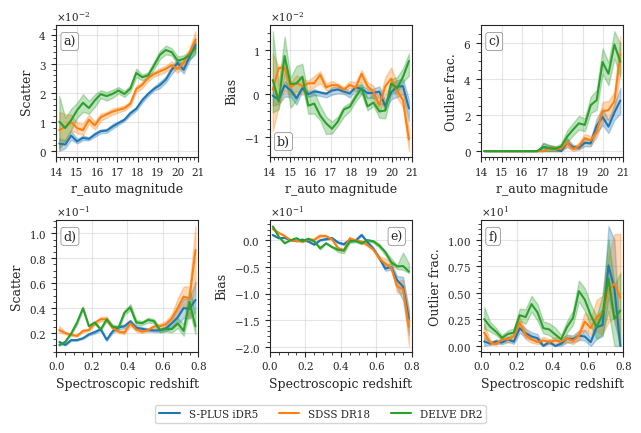

: 

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=set_size(width=width, subplots=(2, 2), fraction=1), layout='constrained')

colors = ['C0', 'C1', 'C2', 'C3']#plt.cm.plasma(np.linspace(0,0.8,3))

metrics_1d_boot = {'S-PLUS iDR5': metrics_1d_boot_splus, 'SDSS DR18': metrics_1d_boot_sdss, 'DELVE DR2': metrics_1d_boot_decam}

color_idx = 0
for name in ['S-PLUS iDR5', 'SDSS DR18', 'DELVE DR2']:
    for i, metric in enumerate(['nmad', 'bias', 'outf']):
        if metric == 'nmad':
            label = '$\sigma_{NMAD}$'
        if metric == 'bias':
            label = '$\mu$'
        if metric == 'outf':
            label = '$\eta$'
        axes[0, i].plot(bins_mag[:-1]+mag_grid/2, np.nanmedian([metrics_1d_boot[name][i][metric]['r'] for i in range(n_boot)], axis=0), 
                        color=colors[color_idx], lw=1.5, label=name if i == 0 else None)
        axes[0, i].fill_between(bins_mag[:-1]+mag_grid/2, 
                                np.nanpercentile([metrics_1d_boot[name][i][metric]['r'] for i in range(n_boot)], 16, axis=0), 
                                np.nanpercentile([metrics_1d_boot[name][i][metric]['r'] for i in range(n_boot)], 84, axis=0), 
                                color=colors[color_idx], alpha=0.3)
        axes[1, i].plot(bins_z[:-1]+z_grid/2, np.nanmedian([metrics_1d_boot[name][i][metric]['z'] for i in range(n_boot)], axis=0), 
                        color=colors[color_idx], lw=1.5)
        axes[1, i].fill_between(bins_z[:-1]+z_grid/2, 
                                np.nanpercentile([metrics_1d_boot[name][i][metric]['z'] for i in range(n_boot)], 16, axis=0), 
                                np.nanpercentile([metrics_1d_boot[name][i][metric]['z'] for i in range(n_boot)], 84, axis=0), 
                                color=colors[color_idx], alpha=0.3)
        
        axes[0, i].set_xlabel(f'r_auto magnitude')
        axes[1, i].set_xlabel('Spectroscopic redshift')

    plot_sig68 = False
    if plot_sig68:
        axes[0, 0].plot(bins_mag[:-1]+mag_grid/2, np.nanmedian([metrics_1d_boot[name][i]['sig68']['r'] for i in range(n_boot)], axis=0), '--',
                        color=colors[color_idx], lw=1.5, zorder=1, label='$\sigma_{68}$')
        axes[0, 0].fill_between(bins_mag[:-1]+mag_grid/2, 
                                np.nanpercentile([metrics_1d_boot[name][i]['sig68']['r'] for i in range(n_boot)], 16, axis=0),
                                np.nanpercentile([metrics_1d_boot[name][i]['sig68']['r'] for i in range(n_boot)], 84, axis=0), 
                                color=colors[color_idx], alpha=0.3, zorder=1)
        axes[1, 0].plot(bins_z[:-1]+z_grid/2, np.nanmedian([metrics_1d_boot[name][i]['sig68']['z'] for i in range(n_boot)], axis=0), '--', 
                        color=colors[color_idx], lw=1.5, zorder=1, label='$\sigma_{68}$')
        axes[1, 0].fill_between(bins_z[:-1]+z_grid/2, 
                                np.nanpercentile([metrics_1d_boot[name][i]['sig68']['z'] for i in range(n_boot)], 16, axis=0),
                                np.nanpercentile([metrics_1d_boot[name][i]['sig68']['z'] for i in range(n_boot)], 84, axis=0), 
                                color=colors[color_idx], alpha=0.3, zorder=1)

    plot_norm_bias = False
    if plot_norm_bias:
        axes[0, 1].plot(bins_mag[:-1]+mag_grid/2, np.nanmedian([metrics_1d_boot[name][i]['bias_norm']['r'] for i in range(n_boot)], axis=0), '--', 
                        color=colors[color_idx], lw=1.5, zorder=1, label='$\mu_{norm}$')
        axes[0, 1].fill_between(bins_mag[:-1]+mag_grid/2, 
                                np.nanpercentile([metrics_1d_boot[name][i]['bias_norm']['r'] for i in range(n_boot)], 16, axis=0),
                                np.nanpercentile([metrics_1d_boot[name][i]['bias_norm']['r'] for i in range(n_boot)], 84, axis=0), 
                                color=colors[color_idx], alpha=0.3, zorder=1)
        axes[1, 1].plot(bins_z[:-1]+z_grid/2, np.nanmedian([metrics_1d_boot[name][i]['bias_norm']['z'] for i in range(n_boot)], axis=0), '--',
                        color=colors[color_idx], lw=1.5, zorder=1, label='$\mu_{norm}$')
        axes[1, 1].fill_between(bins_z[:-1]+z_grid/2, 
                                np.nanpercentile([metrics_1d_boot[name][i]['bias_norm']['z'] for i in range(n_boot)], 16, axis=0),
                                np.nanpercentile([metrics_1d_boot[name][i]['bias_norm']['z'] for i in range(n_boot)], 84, axis=0), 
                                color=colors[color_idx], alpha=0.3, zorder=1)
        
    plot_outlier_nsigma = False
    if plot_outlier_nsigma:
        axes[0, 2].plot(bins_mag[:-1]+mag_grid/2, np.nanmedian([metrics_1d_boot[name][i]['outf3s']['r'] for i in range(n_boot)], axis=0), '--', 
                        color=colors[color_idx], lw=1.5, zorder=1, label='$\eta_{3\sigma}$')
        axes[0, 2].fill_between(bins_mag[:-1]+mag_grid/2, 
                                np.nanpercentile([metrics_1d_boot[name][i]['outf3s']['r'] for i in range(n_boot)], 16, axis=0),
                                np.nanpercentile([metrics_1d_boot[name][i]['outf3s']['r'] for i in range(n_boot)], 84, axis=0), 
                                color=colors[color_idx], alpha=0.3, zorder=1)
        axes[1, 2].plot(bins_z[:-1]+z_grid/2, np.nanmedian([metrics_1d_boot[name][i]['outf3s']['z'] for i in range(n_boot)], axis=0), '--',
                        color=colors[color_idx], lw=1.5, zorder=1, label='$\eta_{3\sigma}$')
        axes[1, 2].fill_between(bins_z[:-1]+z_grid/2, 
                                np.nanpercentile([metrics_1d_boot[name][i]['outf3s']['z'] for i in range(n_boot)], 16, axis=0),
                                np.nanpercentile([metrics_1d_boot[name][i]['outf3s']['z'] for i in range(n_boot)], 84, axis=0), 
                                color=colors[color_idx], alpha=0.3, zorder=1)
        
    color_idx += 1

axes[0, 1].set_xlabel(f'r_auto magnitude')
axes[1, 1].set_xlabel('Spectroscopic redshift')
    
# Text
bbox = dict(facecolor='white', edgecolor='grey', lw=0.5, boxstyle='round,pad=0.2')
axes[0, 0].text(0.05, 0.85, 'a)', transform=axes[0, 0].transAxes, bbox=bbox)
axes[1, 0].text(0.05, 0.85, 'd)', transform=axes[1, 0].transAxes, bbox=bbox)
axes[0, 1].text(0.05, 0.09, 'b)', transform=axes[0, 1].transAxes, bbox=bbox)
axes[1, 1].text(0.85, 0.85, 'e)', transform=axes[1, 1].transAxes, bbox=bbox)
axes[0, 2].text(0.05, 0.85, 'c)', transform=axes[0, 2].transAxes, bbox=bbox)
axes[1, 2].text(0.05, 0.85, 'f)', transform=axes[1, 2].transAxes, bbox=bbox)

for i in range(2):
    axes[i, 0].set_ylabel('Scatter')
    axes[i, 1].set_ylabel('Bias')
    axes[i, 2].set_ylabel('Outlier frac.')

for i in range(3):
    axes[0, i].set_xlim(14, 21)
    axes[0, i].set_xticks(np.arange(14, 22, 1))
    axes[0, i].minorticks_on()
    axes[1, i].set_xlim(0, 0.8)
    axes[1, i].minorticks_on()

for ax in axes.reshape(-1):
    ax.grid(True)
    ax.ticklabel_format(style='sci', scilimits=(0,0), axis='y', useMathText=True)

#axes[1, 0].legend(loc='center', ncols=2, bbox_to_anchor=(0.5, -0.5))
fig.legend(loc='center', ncols=3, bbox_to_anchor=(0.5, -0.05))
#axes[1, 2].legend(loc='center', ncols=2, bbox_to_anchor=(0.5, -0.5))

plt.savefig(f'images/results_spe_metrics_sdss_decam_comparison.{saveformat}', bbox_inches='tight')
plt.show()

In [22]:
sdss_pdfs, _, x = calc_PDF_series(np.ones_like(s82_sdss['pdf_weights_0'].values).reshape(-1,1),
                                  s82_sdss['photz'].values.reshape(-1,1),
                                  s82_sdss['photz_err'].values.reshape(-1,1),
                                  x_range=torch.linspace(0, 0.8, 200), optimize_zml=True)

compare_results_sdss, x = metrics_from_predict(s82_sdss, sdss_pdfs, s82_sdss['photz'].values, reference_mag='r_auto', x=x)

: 

In [23]:
import ast
s82_sdss['ALPHAS'] = s82_sdss['ALPHAS'].apply(lambda s: list(ast.literal_eval(s)))
s82_sdss['MUS']    = s82_sdss['MUS'].apply(lambda s: list(ast.literal_eval(s)))
s82_sdss['SIGMAS'] = s82_sdss['SIGMAS'].apply(lambda s: list(ast.literal_eval(s)))


: 

In [24]:
decam_weights = pd.DataFrame(s82_sdss.ALPHAS.tolist(), index=s82_sdss.index)
decam_means   = pd.DataFrame(s82_sdss.MUS.tolist(), index=s82_sdss.index)
decam_sigmas  = pd.DataFrame(s82_sdss.SIGMAS.tolist(), index=s82_sdss.index)

: 

In [25]:
decam_pdfs, _, x = calc_PDF_series(decam_weights,
                                   decam_means,
                                   decam_sigmas,
                                   x_range=torch.linspace(0, 0.8, 200), optimize_zml=True)

compare_results_decam, x = metrics_from_predict(s82_sdss, decam_pdfs, s82_sdss['photz'].values, reference_mag='r_auto', x=x)

: 

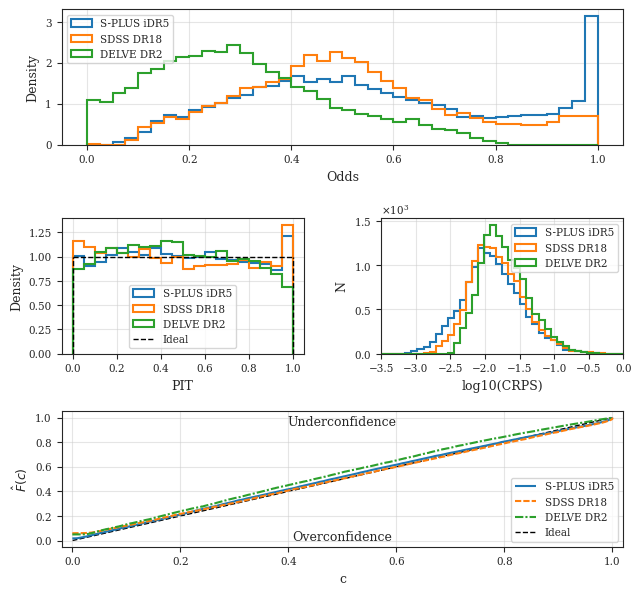

: 

In [33]:
fig = plt.figure(figsize=set_size(width=width, subplots=(3, 2), fraction=1))
outer_grid = gridspec.GridSpec(1, 1, figure=fig)

pdf_grid = gridspec.GridSpecFromSubplotSpec(3, 6, subplot_spec=outer_grid[0], wspace=0.1, hspace=0.1,
                                            height_ratios=[.33, .33, .33], width_ratios=[1, 1, 1, 1, 1, 1])
pdf_axes = {'odds_c': plt.subplot(pdf_grid[0, 0:6]),
            #'odds_n': plt.subplot(pdf_grid[0, 2:4]),
            #'odds_b': plt.subplot(pdf_grid[0, 4:6]),
            'pit':    plt.subplot(pdf_grid[1, 0:3]),
            'crps':   plt.subplot(pdf_grid[1, 3:6]),
            'hpdci':  plt.subplot(pdf_grid[2, 0:6])}

# Odds
viridis = plt.get_cmap('viridis', 40)
N, bins, patches = pdf_axes['odds_c'].hist(s82_sdss['odds'], density=True, range=(0,1), histtype='step', lw=1.5, bins=40, label='S-PLUS iDR5')
N, bins, patches = pdf_axes['odds_c'].hist(compare_results_sdss['odds'], density=True, range=(0,1), histtype='step', lw=1.5, bins=40, label='SDSS DR18')
N, bins, patches = pdf_axes['odds_c'].hist(compare_results_decam['odds'], density=True, range=(0,1), histtype='step', lw=1.5, bins=40, label='DELVE DR2')

pdf_axes['odds_c'].set_ylabel('Density')
pdf_axes['odds_c'].set_xlabel('Odds')

# PIT
pdf_axes['pit'].hist(s82_sdss['pit'], density=True, range=(0,1), bins=20, histtype='step', lw=1.5, label='S-PLUS iDR5')
pdf_axes['pit'].hist(compare_results_sdss['pit'], density=True, range=(0,1), bins=20, histtype='step', lw=1.5, label='SDSS DR18')
pdf_axes['pit'].hist(compare_results_decam['pit'], density=True, range=(0,1), bins=20, histtype='step', lw=1.5, label='DELVE DR2')

pdf_axes['pit'].set_ylabel('Density')
pdf_axes['pit'].set_xlabel('PIT')
pdf_axes['pit'].plot([0, 0], [0, 1], '--', color='black', lw=1, label='Ideal')
pdf_axes['pit'].plot([0, 1], [1, 1], '--', color='black', lw=1)
pdf_axes['pit'].plot([1, 1], [0, 1], '--', color='black', lw=1)

# CRPS
pdf_axes['crps'].hist(np.log10(s82_sdss['crps']), range=(-3.5, 0), density=False, bins=40, histtype='step', lw=1.5, label='S-PLUS iDR5')
pdf_axes['crps'].hist(np.log10(compare_results_sdss['crps']), range=(-3.5, 0), density=False, bins=40, histtype='step', lw=1.5, label='SDSS DR18')
pdf_axes['crps'].hist(np.log10(compare_results_decam['crps']), range=(-3.5, 0), density=False, bins=40, histtype='step', lw=1.5, label='DELVE DR2')

pdf_axes['crps'].set_xlabel('log10(CRPS)')
pdf_axes['crps'].set_ylabel('N')

pdf_axes['odds_c'].legend()
pdf_axes['pit'].legend()
pdf_axes['crps'].legend()

# HPDCI
dashes = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]

c, f = ecdf(s82_sdss['hpdci'].values)
pdf_axes['hpdci'].plot(c, f, label='S-PLUS iDR5', dashes=dashes[0], lw=1.5)
c, f = ecdf(compare_results_sdss['hpdci'].values)
pdf_axes['hpdci'].plot(c, f, label='SDSS DR18', dashes=dashes[1], lw=1.5)
c, f = ecdf(compare_results_decam['hpdci'].values)
pdf_axes['hpdci'].plot(c, f, label='DELVE DR2', dashes=dashes[2], lw=1.5)

pdf_axes['hpdci'].plot([0,1], [0,1], '--', color='black', lw=1, zorder=-1, label='Ideal')
pdf_axes['hpdci'].set_ylabel(r'$\hat{F}(c)$')
pdf_axes['hpdci'].set_xlabel('c')
pdf_axes['hpdci'].set_xlim(-0.02, 1.02)
pdf_axes['hpdci'].legend(loc='lower right')
pdf_axes['hpdci'].text(0.5, 0.92, 'Underconfidence', transform=pdf_axes['hpdci'].transAxes, ha='center', va='center')
pdf_axes['hpdci'].text(0.5, 0.07, 'Overconfidence',  transform=pdf_axes['hpdci'].transAxes, ha='center', va='center')

for ax in [pdf_axes['crps']]:
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

pdf_axes['odds_c'].set_xlim(-0.05, 1.05)
pdf_axes['pit'].set_xlim(-0.05, 1.05)
pdf_axes['crps'].set_xlim(-3.5, 0)

plt.savefig(f'images/comparison_pdf_metrics_sdss_decam.pdf', dpi=300, bbox_inches='tight')
plt.show()

##### Comparison with other methods

In [20]:
from scipy.stats import norm
from scipy import integrate

: 

In [21]:
def ecdf(sample): # https://stackoverflow.com/questions/33345780/empirical-cdf-in-python-similiar-to-matlabs-one
    # convert sample to a numpy array, if it isn't already
    sample = np.atleast_1d(sample)
    # find the unique values and their corresponding counts
    quantiles, counts = np.unique(sample, return_counts=True)
    # take the cumulative sum of the counts and divide by the sample size to
    # get the cumulative probabilities between 0 and 1
    cumprob = np.cumsum(counts).astype(np.double) / sample.size
    return quantiles, cumprob

# General function to find the nearest idx of an item in a list
def find_nearest_idx(array, value):
    '''
    Returns the nearest element index of a list relative to a given value

    Keyword arguments:
    array -- Array or list containing all values
    value -- Value to search the closest corresponding element index in array
    '''

    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Step function
def step(x,y):
    '''
    Returns the step (Heaviside) function. Used to calculate the CRPS

    Keyword arguments:
    x -- Range of the function (corresponds to the photometric redshift)
    y -- Value where the 'step' is
    '''

    return 1 * (x > y)

# Calculate HPDCI per object
# https://stackoverflow.com/questions/33345780/empirical-cdf-in-python-similiar-to-matlabs-one
def check_intervals(x):
    '''
    Returns a splitted list if a certain condition is satisfied.
    In this case, the condition is a separation of more than one index.

    Keyword arguments:
    x -- List to be checked and possibly splitted
    '''

    List, last = [[]], None
    for elem in x:
        if last is None or abs(last - elem) <= 1:
            List[-1].append(elem)
        else:
            List.append([elem])
        last = elem
    return List

def calculate_HPDCI(x, pdf_object, zspec):
    '''
    Returns the HPDCI (Highest Probability Density Credible Interval) value for a given object

    Keyword arguments:
    x          -- The interval in which the PDF was calculated
    pdf_object -- The PDF of the object
    zspec      -- The spectroscopic redshift of the object
    '''

    hpdci_indexes = list(np.where(pdf_object >= pdf_object[find_nearest_idx(x, zspec)])[0])
    hpdci_indexes = check_intervals(hpdci_indexes)

    object_hpdci = 0
    for k in range(len(hpdci_indexes)):
        object_hpdci += np.trapz(pdf_object[hpdci_indexes[k]], x[hpdci_indexes[k]])

    return object_hpdci


: 

In [18]:
def metrics_from_predict(prediction_dataframe, pdf_array, zphots, reference_mag='r_auto', x=None):
    """
    Predicts values using a trained model and returns the results.

    Args:
        prediction_dataframe (pd.DataFrame): DataFrame containing the prediction data.
        prediction_data_features (np.ndarray): Array containing the prediction data features.
        prediction_data_target (np.ndarray): Array containing the prediction data target values 
                                             (for the testing sample).
        model_dict (dict): Dictionary containing the trained model (or models).
        output_pdfs (bool): Flag indicating whether to output PDFs.
        num_samples (int): Number of predictions to make.
        final_prediction (bool): Flag indicating whether it is the final prediction 
                                 (to be used in production of new VACs).
        reference_mag (str): Name of the reference magnitude.
        verbose (bool): Flag indicating whether to print progress.
        calc_all_folds (bool): Flag indicating whether to calculate all metrics for each fold.
        x (np.ndarray): Array containing the redshift range for which the PDFs will be calculated.
        fast_predict (bool): Flag indicating whether to use a prediction made in the GPU.

    Returns:
        pd.DataFrame: DataFrame containing the predicted values and other metrics.
    """
    ## Start of prediction
    # Set the interval where the PDFs will be calculated
    if x is None:
        x = torch.arange(0, 1+0.001, 0.001)

    # Creating a dataframe to store the results. 
    # Only ID, RA, and DEC are needed. The rest is here because I want to implement a photo-z flag quality system
    result_df = pd.DataFrame()
    result_df['ID']  = prediction_dataframe['ID'].values
    result_df['RA']  = prediction_dataframe['RA'].values
    result_df['DEC'] = prediction_dataframe['DEC'].values
    result_df[reference_mag] = prediction_dataframe[reference_mag].values

    # Get the target values (if available)
    try:
        prediction_data_target = prediction_dataframe['z'].values
        result_df['z'] = prediction_data_target
    except:
        prediction_data_target = None

    # Calculate ZPhots, pits, crps, odds, and Quantiles (final, not in folds)
    hpdcis     = np.empty(len(prediction_dataframe)) 
    pits       = np.empty(len(prediction_dataframe)) 
    crps       = np.empty(len(prediction_dataframe)) 
    odds       = np.empty(len(prediction_dataframe))
    odds_norm  = np.empty(len(prediction_dataframe))
    pdf_peak_h = np.empty(len(prediction_dataframe))
    p68_lower  = np.empty(len(prediction_dataframe)) 
    p68_higher = np.empty(len(prediction_dataframe)) 
    p95_lower  = np.empty(len(prediction_dataframe)) 
    p95_higher = np.empty(len(prediction_dataframe)) 
 
    for i in range(len(prediction_dataframe)):
        # Get the PDF for the object i
        obj_pdf = pdf_array[i]
        # Get the maximum value of the PDF
        pdf_peak_h[i] = np.max(obj_pdf)
        # From the obj_pdf, calculate the CDF
        obj_cdf = integrate.cumtrapz(obj_pdf, x, initial=0)
        # Calculate the odds of object i (arXiv 9811189, eq. 17. Also calculated as the integral of the PDF between z_peak +/- 0.02)
        odds[i] = obj_cdf[find_nearest_idx(x, zphots[i]+0.02)] - obj_cdf[find_nearest_idx(x, zphots[i]-0.02)]
        if (prediction_data_target is not None):
            # Get the spectroscopic redshift of the object i
            obj_z = prediction_data_target[i]
            # Calculate the odds normalized by (1+z)
            odds_norm[i] = (obj_cdf[find_nearest_idx(x, zphots[i]+(0.02*(1+obj_z)))] - 
                            obj_cdf[find_nearest_idx(x, zphots[i]-(0.02*(1+obj_z)))])
            # Calculate the HPDCI of object i (arXiv 1601.07857)
            hpdcis[i] = calculate_HPDCI(x, obj_pdf, obj_z)
            # Calculate the PIT of object i (arXiv 1608.08016, eq. 2)
            pits[i] = obj_cdf[find_nearest_idx(x, obj_z)]
            # Calculate the crps of object i (arXiv 1608.08016, eq. 4)
            crps[i] = np.trapz((torch.tensor(obj_cdf) - step(x, obj_z))**2, x)

        # Calculate the 68% credible interval
        alpha = 68
        q_val = (1-(alpha/100))/2
        p68_lower [i] = x[find_nearest_idx(obj_cdf, q_val)] # 16
        p68_higher[i] = x[find_nearest_idx(obj_cdf, 1-q_val)] # 84

        # Calculate the 95% credible interval
        alpha = 95
        q_val = (1-(alpha/100))/2
        p95_lower [i] = x[find_nearest_idx(obj_cdf, q_val)] # 2.5
        p95_higher[i] = x[find_nearest_idx(obj_cdf, 1-q_val)] # 97.5
        
    # Finding secondary peaks (only for the final PDFs)
    secondary_zphot = []
    number_of_peaks = []

    for i in range(len(pdf_array)):
        diff = np.diff(pdf_array[i])/np.diff(x)
        peak_idx = np.where(np.diff(np.sign(diff)) == -2)[0]+1

        # Check if there are any peaks above threshold (1/3 of the height of the PDF). Each 'True' will count as 1
        if np.sum(pdf_array[i][peak_idx] >= np.max(pdf_array[i])/3) >= 2:
            # Append number of peaks in this PDF to list
            number_of_peaks.append(np.sum(pdf_array[i][peak_idx] >= np.max(pdf_array[i])/3))

            # If there are, then sort the indexes by the value of the PDF (to find the two highest peaks)
            sorted_idxs = peak_idx[np.argsort(pdf_array[i][peak_idx])[::-1]]

            # Since I only want the two highest peaks, remove any additional ones (maybe use this count as a flag but only report zml_1 and zml_2)
            if np.count_nonzero(pdf_array[i][peak_idx] >= np.max(pdf_array[i])/3) >= 2:
                sorted_idxs = sorted_idxs[:2]
                # Append to list
                secondary_zphot.append(x[sorted_idxs[-1]])

        # If there are no secondary peaks, append nan to secondary_zphot and 1 to number_of_peaks.
        else:
            number_of_peaks.append(1)
            secondary_zphot.append(np.nan)

    # Constructing result dataframe
    result_df['zml']             = zphots
    result_df['zml_95_lower']    = p95_lower
    result_df['zml_68_lower']    = p68_lower
    result_df['zml_68_upper']    = p68_higher
    result_df['zml_95_upper']    = p95_higher
    result_df['pdf_num_peaks']   = number_of_peaks
    result_df['pdf_second_peak_zml'] = secondary_zphot
    result_df['pdf_peak_height'] = pdf_peak_h
    result_df['sigma_68']        = (p68_higher - p68_lower)/2
    result_df['odds']            = odds
    if (prediction_data_target is not None) or (final_prediction == False):
        result_df['odds_norm'] = odds_norm
        result_df['pit']       = pits
        result_df['crps']      = crps
        result_df['hpdci']     = hpdcis

    # Fill any missing values with zero
    result_df.fillna(-99, inplace=True)
    
    # Chaning column types:
    result_df = result_df.astype({'ID':  str,
                                  'RA':  np.float64,
                                  'DEC': np.float64})
    
    try:
        skip_columns = ['ID', 'RA', 'DEC', 'class_spec']
        result_df = (result_df.set_index(skip_columns, append=True).astype(np.float32).reset_index(skip_columns))
    except:
        skip_columns = ['ID', 'RA', 'DEC']
        result_df = (result_df.set_index(skip_columns, append=True).astype(np.float32).reset_index(skip_columns))

    # Return the result dataframe, the final_PDF array, and the x array (used in All_Benchmarks)
    return result_df, x

: 

In [87]:
bmdn_pdfs, _, x = calc_PDF_series(result_df[[col for col in result_df.columns.values if 'pdf_weight' in col]],
                                  result_df[[col for col in result_df.columns.values if 'pdf_means' in col]],
                                  result_df[[col for col in result_df.columns.values if 'pdf_std' in col]],
                                  x_range=torch.linspace(0, 0.8, 200), optimize_zml=True)

compare_results_sdss, x = metrics_from_predict(result_df, bmdn_pdfs, result_df['zml'].values, reference_mag='r_auto', x=x)

KeyboardInterrupt: 

: 

In [52]:
from scipy.stats import norm

rf_pdfs  = []
rf_means = result_df['rf_mean']
rf_stds  = result_df['rf_std']

for i in range(len(result_df)):
    rf_pdfs.append(norm(loc=rf_means[i], scale=rf_stds[i]).pdf(x))

ard_pdfs  = []
ard_means = result_df['ard_mean']
ard_stds  = result_df['ard_std']
for i in range(len(result_df)):
    ard_pdfs.append(norm(loc=ard_means[i], scale=ard_stds[i]).pdf(x))

: 

In [53]:
compare_results_rf, x = metrics_from_predict(result_df, rf_pdfs, result_df['rf_mean'].values, reference_mag='r_auto', x=x)
compare_results_ard, x = metrics_from_predict(result_df, ard_pdfs, result_df['ard_mean'].values, reference_mag='r_auto', x=x)

: 

In [ ]:
# from scipy.stats import norm
# from scipy import integrate

# x = np.linspace(0, 1, 200)

# peak_h = {'bmdn': np.zeros(len(result_df)), 'rf': np.zeros(len(result_df)), 'bard': np.zeros(len(result_df))}
# odds   = {'bmdn': np.zeros(len(result_df)), 'rf': np.zeros(len(result_df)), 'bard': np.zeros(len(result_df))}
# odds_n = {'bmdn': np.zeros(len(result_df)), 'rf': np.zeros(len(result_df)), 'bard': np.zeros(len(result_df))}
# hpdci  = {'bmdn': np.zeros(len(result_df)), 'rf': np.zeros(len(result_df)), 'bard': np.zeros(len(result_df))}
# pits   = {'bmdn': np.zeros(len(result_df)), 'rf': np.zeros(len(result_df)), 'bard': np.zeros(len(result_df))}
# crps   = {'bmdn': np.zeros(len(result_df)), 'rf': np.zeros(len(result_df)), 'bard': np.zeros(len(result_df))}

# rf_means = result_df['rf_mean']
# rf_stds = result_df['rf_std']

# ard_mean = result_df['ard_mean']
# ard_std = result_df['ard_std']

# bmdn_means = result_df['zml'].values
# # 
# # bmdn_pdfs, _, x = calc_PDF_series(result_df[[col for col in result_df.columns.values if 'pdf_weight' in col]],
# #                                 result_df[[col for col in result_df.columns.values if 'pdf_means' in col]],
# #                                 result_df[[col for col in result_df.columns.values if 'pdf_std' in col]],
# #                                 x_range=torch.linspace(0, 0.8, 200), optimize_zml=True)

# for i in tqdm(range(len(result_df))):
#     # Get the PDF and zml for the object i
#     obj_pdf_rf = norm(loc=rf_means[i], scale=rf_stds[i]).pdf(x)
#     obj_pdf_br = norm(loc=ard_mean[i], scale=ard_std[i]).pdf(x)
#     obj_pdf_bmdn = bmdn_pdfs[i]
#     # Get the maximum value of the PDF
#     peak_h['rf'][i] = np.max(obj_pdf_rf)
#     peak_h['bard'][i] = np.max(obj_pdf_br)
#     peak_h['bmdn'][i] = np.max(obj_pdf_bmdn)

#     # From the obj_pdf, calculate the CDF
#     obj_cdf_bmdn = integrate.cumtrapz(obj_pdf_bmdn, x, initial=0)
#     obj_cdf_rf = integrate.cumtrapz(obj_pdf_rf, x, initial=0)
#     obj_cdf_br = integrate.cumtrapz(obj_pdf_br, x, initial=0)

#     # Calculate the odds of object i (arXiv 9811189, eq. 17. Also calculated as the integral of the PDF between z_peak +/- 0.02)
#     odds['bmdn'][i] = obj_cdf_bmdn[find_nearest_idx(x, bmdn_means[i]+0.02)] - obj_cdf_bmdn[find_nearest_idx(x, bmdn_means[i]-0.02)]
#     odds['rf'][i] = obj_cdf_rf[find_nearest_idx(x, rf_means[i]+0.02)] - obj_cdf_rf[find_nearest_idx(x, rf_means[i]-0.02)]
#     odds['bard'][i] = obj_cdf_br[find_nearest_idx(x, ard_mean[i]+0.02)] - obj_cdf_br[find_nearest_idx(x, ard_mean[i]-0.02)]

#     # Get the spectroscopic redshift of the object i
#     obj_z = result_df['z'].values[i]
#     # Calculate the HPDCI of object i (arXiv 1601.07857)
#     hpdci['bmdn'][i] = calculate_HPDCI(x, obj_pdf_bmdn, obj_z)
#     hpdci['rf'][i] = calculate_HPDCI(x, obj_pdf_rf, obj_z)
#     hpdci['bard'][i] = calculate_HPDCI(x, obj_pdf_br, obj_z)
#     # Calculate the PIT of object i (arXiv 1608.08016, eq. 2)
#     pits['bmdn'][i] = obj_cdf_bmdn[find_nearest_idx(x, obj_z)]
#     pits['rf'][i] = obj_cdf_rf[find_nearest_idx(x, obj_z)]
#     pits['bard'][i] = obj_cdf_br[find_nearest_idx(x, obj_z)]
#     # Calculate the crps of object i (arXiv 1608.08016, eq. 4)
#     crps['bmdn'][i] = np.trapz((obj_pdf_bmdn - step(x, obj_z))**2, x)
#     crps['rf'][i] = np.trapz((obj_pdf_rf - step(x, obj_z))**2, x)
#     crps['bard'][i] = np.trapz((obj_pdf_br - step(x, obj_z))**2, x)

  0%|          | 0/50000 [00:00<?, ?it/s]

: 

In [46]:
# Calculations ---------------------------------------------------------------------------------------------------------
# Used in do_spe_metrics and do_spe_metrics_cumulative
bins_mag = np.linspace(15, 21, 25, endpoint=True)
mag_grid = np.diff(bins_mag)[0]

bins_z   = np.linspace(0, 0.6, 25, endpoint=True)
red_grid = np.diff(bins_z)[0]

slim_result_df = result_df[['r_auto', 'z', 'zml', 'rf_mean', 'rf_std', 'ard_mean', 'ard_std', 'knn_mean', 'odds', 'zml_68_upper', 'zml_68_lower', 'pdf_peak_height']].copy()

result_df_knn = slim_result_df.copy()
result_df_knn['zml'] = slim_result_df['knn_mean']

result_df_rf = slim_result_df.copy()
result_df_rf['zml'] = slim_result_df['rf_mean']

result_df_bard = slim_result_df.copy()
result_df_bard['zml'] = slim_result_df['ard_mean']

dict_of_results = {'BMDN': slim_result_df,
                   'KNN': result_df_knn,
                   'RF': result_df_rf,
                   'BARD': result_df_bard}
metrics = ['nmad', 'bias', 'bias_norm']
result_list = {result_name: [] for result_name in dict_of_results.keys()}

n_bootstrap = 500
ref_mag = 'r_auto'
folds   = [0]

for result_name, result_df_ in dict_of_results.items():
    nmad_all, bias_all, outf_all, bias_auc_r_all, bias_auc_z_all = [], [], [], [], []

    for _ in tqdm(range(n_bootstrap)):
        boot_sample = result_df_.sample(frac=1, replace=True).reset_index(drop=True)
        metrics = calculate_metrics(boot_sample, 'r_auto', magnitude_bins=bins_mag, redshift_bins=bins_z)
        result_list[result_name].append(metrics)

        spec_z = boot_sample['z'].values
        photo_z = boot_sample['zml'].values
        delta = photo_z - spec_z

        nmad_all.append(1.48 * np.median(np.abs(delta - np.median(delta)) / (1 + spec_z)))
        bias_all.append(np.median(delta))
        outf_all.append(np.count_nonzero(np.abs(delta) / (1 + spec_z) > 0.15) / len(spec_z) * 100)
        bias_auc_r_all.append(np.trapz(np.abs(metrics['bias']['r'])))
        bias_auc_z_all.append(np.trapz(np.abs(metrics['bias']['z'])))


    nmad_mean, nmad_std = np.mean(nmad_all), np.std(nmad_all)
    bias_mean, bias_std = np.mean(bias_all), np.std(bias_all)
    outf_mean, outf_std = np.mean(outf_all), np.std(outf_all)
    bias_auc_r_mean, bias_auc_r_std = np.nanmean(bias_auc_r_all), np.nanstd(bias_auc_r_all)
    bias_auc_z_mean, bias_auc_z_std = np.nanmean(bias_auc_z_all), np.nanstd(bias_auc_z_all)

    print(result_name)
    print(f"NMAD: {nmad_mean:.4f} +/- {nmad_std:.4f}")
    print(f"Absolute bias: {bias_mean:.3e} +/- {bias_std:.3e}")
    print(f"Outliers: {outf_mean:.4f} +/- {outf_std:.4f}")
    print(f"Bias AUC (r): {bias_auc_r_mean:.3e} +/- {bias_auc_r_std:.3e}")
    print(f"Bias AUC (z): {bias_auc_z_mean:.3e} +/- {bias_auc_z_std:.3e}")


  0%|          | 0/500 [00:00<?, ?it/s]

BMDN
NMAD: 0.0211 +/- 0.0001
Absolute bias: 1.538e-04 +/- 1.053e-04
Outliers: 1.5024 +/- 0.0531
Bias AUC (r): 1.799e-02 +/- 2.536e-03
Bias AUC (z): 1.062e-01 +/- 4.798e-03


  0%|          | 0/500 [00:00<?, ?it/s]

KNN
NMAD: 0.0319 +/- 0.0002
Absolute bias: -8.623e-04 +/- 1.902e-04
Outliers: 2.4801 +/- 0.0693
Bias AUC (r): 6.248e-02 +/- 3.939e-03
Bias AUC (z): 2.762e-01 +/- 7.365e-03


  0%|          | 0/500 [00:00<?, ?it/s]

RF
NMAD: 0.0246 +/- 0.0002
Absolute bias: 1.355e-03 +/- 1.287e-04
Outliers: 1.7003 +/- 0.0602
Bias AUC (r): 3.514e-02 +/- 3.134e-03
Bias AUC (z): 1.611e-01 +/- 5.106e-03


  0%|          | 0/500 [00:00<?, ?it/s]

BARD
NMAD: 0.0456 +/- 0.0003
Absolute bias: 2.850e-03 +/- 3.181e-04
Outliers: 2.5088 +/- 0.0670
Bias AUC (r): 1.029e-01 +/- 7.120e-03
Bias AUC (z): 4.676e-01 +/- 8.442e-03


: 

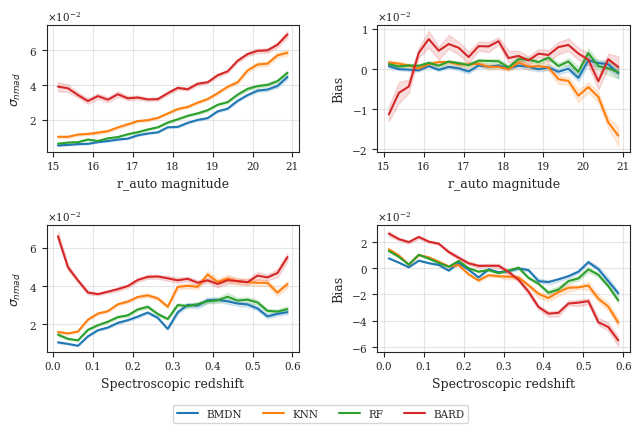

: 

In [48]:
# Plots ----------------------------------------------------------------------------------------------------------------
colours = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
colour_idx = 0

fig = plt.figure(figsize=set_size(width=width, subplots=(2, 2), fraction=1))
outer_grid = gridspec.GridSpec(1, 1, figure=fig)

spe_grid = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=outer_grid[0], wspace=0.1, hspace=0.1)
spe_axes = {'nmad_r': plt.subplot(spe_grid[0, 0]),
            'bias_r': plt.subplot(spe_grid[0, 1]),
            'nmad_z': plt.subplot(spe_grid[1, 0]),
            'bias_z': plt.subplot(spe_grid[1, 1])}

for result_name in result_list.keys():
    # NMAD vs R
    spe_axes['nmad_r'].plot(bins_mag[:-1]+(mag_grid/2), np.nanmedian([result_list[result_name][i]['nmad']['r'] for i in range(len(result_list[result_name]))], axis=0), 
                        color=colours[colour_idx], label=result_name)
    spe_axes['nmad_r'].fill_between(bins_mag[:-1]+(mag_grid/2), 
                        y1=np.nanpercentile([result_list[result_name][i]['nmad']['r'] for i in range(len(result_list[result_name]))], 16, axis=0),
                        y2=np.nanpercentile([result_list[result_name][i]['nmad']['r'] for i in range(len(result_list[result_name]))], 84, axis=0), 
                        color=colours[colour_idx], alpha=0.15)

    spe_axes['nmad_r'].set_ylabel(r'$\sigma_{nmad}$')
    spe_axes['nmad_r'].set_xlabel('r_auto magnitude')
    spe_axes['nmad_r'].set_xticks(np.arange(bins_mag[0], bins_mag[-1]+1, 1))
    spe_axes['nmad_r'].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    #spe_axes['nmad_r'].legend()

    # NMAD vs Z
    spe_axes['nmad_z'].plot(bins_z[:-1]+(red_grid/2), np.nanmedian([result_list[result_name][i]['nmad']['z'] for i in range(len(result_list[result_name]))], axis=0), 
                        color=colours[colour_idx])
    spe_axes['nmad_z'].fill_between(bins_z[:-1]+(red_grid/2), 
                        y1=np.nanpercentile([result_list[result_name][i]['nmad']['z'] for i in range(len(result_list[result_name]))], 16, axis=0),
                        y2=np.nanpercentile([result_list[result_name][i]['nmad']['z'] for i in range(len(result_list[result_name]))], 84, axis=0), 
                        color=colours[colour_idx], alpha=0.15)

    spe_axes['nmad_z'].set_ylabel(r'$\sigma_{nmad}$')
    spe_axes['nmad_z'].set_xlabel('Spectroscopic redshift')
    #spe_axes['nmad_z'].set_xticks(np.arange(bins_mag[0], bins_mag[-1]+1, 1))
    spe_axes['nmad_z'].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    #spe_axes['nmad_z'].legend()

    # Bias vs R
    spe_axes['bias_r'].plot(bins_mag[:-1]+(mag_grid/2), np.nanmedian([result_list[result_name][i]['bias']['r'] for i in range(len(result_list[result_name]))], axis=0), 
                        color=colours[colour_idx])
    spe_axes['bias_r'].fill_between(bins_mag[:-1]+(mag_grid/2), 
                        y1=np.nanpercentile([result_list[result_name][i]['bias']['r'] for i in range(len(result_list[result_name]))], 16, axis=0),
                        y2=np.nanpercentile([result_list[result_name][i]['bias']['r'] for i in range(len(result_list[result_name]))], 84, axis=0), 
                        color=colours[colour_idx], alpha=0.15)

    spe_axes['bias_r'].set_ylabel('Bias')
    spe_axes['bias_r'].set_xlabel('r_auto magnitude')
    #spe_axes['bias_r'].set_xticks(np.arange(bins_mag[0], bins_mag[-1]+1, 1))
    spe_axes['bias_r'].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    #spe_axes['bias_r'].legend()

    # Bias vs Z
    spe_axes['bias_z'].plot(bins_z[:-1]+(red_grid/2), np.nanmedian([result_list[result_name][i]['bias']['z'] for i in range(len(result_list[result_name]))], axis=0), 
                            color=colours[colour_idx])
    spe_axes['bias_z'].fill_between(bins_z[:-1]+(red_grid/2), 
                        y1=np.nanpercentile([result_list[result_name][i]['bias']['z'] for i in range(len(result_list[result_name]))], 16, axis=0),
                        y2=np.nanpercentile([result_list[result_name][i]['bias']['z'] for i in range(len(result_list[result_name]))], 84, axis=0), 
                        color=colours[colour_idx], alpha=0.15)

    spe_axes['bias_z'].set_ylabel('Bias')
    spe_axes['bias_z'].set_xlabel('Spectroscopic redshift')
    #spe_axes['bias_z'].set_xticks(np.arange(bins_mag[0], bins_mag[-1]+1, 1))
    spe_axes['bias_z'].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    #spe_axes['bias_z'].legend()

    colour_idx += 1

fig.legend(loc='center', bbox_to_anchor=(0.5, -0.05), ncol=4)

plt.savefig('images/comparison_spe_metrics.pdf', dpi=288, bbox_inches='tight')

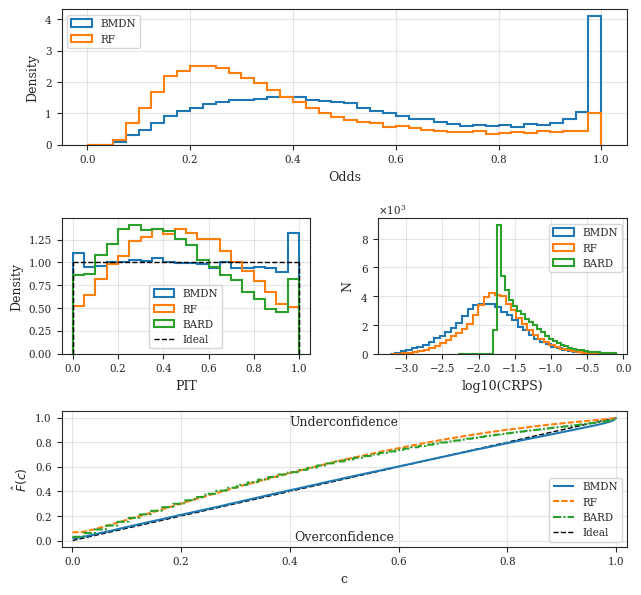

: 

In [55]:
fig = plt.figure(figsize=set_size(width=width, subplots=(3, 2), fraction=1))
outer_grid = gridspec.GridSpec(1, 1, figure=fig)

pdf_grid = gridspec.GridSpecFromSubplotSpec(3, 6, subplot_spec=outer_grid[0], wspace=0.1, hspace=0.1,
                                            height_ratios=[.33, .33, .33], width_ratios=[1, 1, 1, 1, 1, 1])
pdf_axes = {'odds_c': plt.subplot(pdf_grid[0, 0:6]),
            #'odds_n': plt.subplot(pdf_grid[0, 2:4]),
            #'odds_b': plt.subplot(pdf_grid[0, 4:6]),
            'pit':    plt.subplot(pdf_grid[1, 0:3]),
            'crps':   plt.subplot(pdf_grid[1, 3:6]),
            'hpdci':  plt.subplot(pdf_grid[2, 0:6])}

# Odds
viridis = plt.get_cmap('viridis', 40)
N, bins, patches = pdf_axes['odds_c'].hist(result_df['odds'], density=True, range=(0,1), histtype='step', lw=1.5, bins=40, label='BMDN')
pdf_axes['odds_c'].hist(compare_results_rf['odds'], density=True, range=(0,1), histtype='step', lw=1.5, bins=40, label='RF')
#pdf_axes['odds_c'].hist(compare_results_ard['odds'], density=True, range=(0,1), histtype='step', lw=1.5, bins=40, label='BARD')

#pdf_axes['odds_c'].set_ylim(0, np.max(N)+1.5)
pdf_axes['odds_c'].set_ylabel('Density')
pdf_axes['odds_c'].set_xlabel('Odds')

# PIT
pdf_axes['pit'].hist(result_df['pit'], density=True, range=(0,1), bins=20, histtype='step', lw=1.5, label='BMDN')
pdf_axes['pit'].hist(compare_results_rf['pit'], density=True, range=(0,1), bins=20, histtype='step', lw=1.5, label='RF')
pdf_axes['pit'].hist(compare_results_ard['pit'], density=True, range=(0,1), bins=20, histtype='step', lw=1.5, label='BARD')
pdf_axes['pit'].set_ylabel('Density')
pdf_axes['pit'].set_xlabel('PIT')
pdf_axes['pit'].plot([0, 0], [0, 1], '--', color='black', lw=1, label='Ideal')
pdf_axes['pit'].plot([0, 1], [1, 1], '--', color='black', lw=1)
pdf_axes['pit'].plot([1, 1], [0, 1], '--', color='black', lw=1)

# CRPS
pdf_axes['crps'].hist(np.log10(result_df['crps']), density=False, bins=40, histtype='step', lw=1.5, label='BMDN')
pdf_axes['crps'].hist(np.log10(compare_results_rf['crps']), density=False, bins=40, histtype='step', lw=1.5, label='RF')
pdf_axes['crps'].hist(np.log10(compare_results_ard['crps']), density=False, bins=40, histtype='step', lw=1.5, label='BARD')
pdf_axes['crps'].set_xlabel('log10(CRPS)')
pdf_axes['crps'].set_ylabel('N')

pdf_axes['odds_c'].legend()
pdf_axes['pit'].legend()
pdf_axes['crps'].legend()

# HPDCI
dashes = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]

c, f = ecdf(result_df['hpdci'].values)
pdf_axes['hpdci'].plot(c, f, label='BMDN', dashes=dashes[0], lw=1.5)
c, f = ecdf(compare_results_rf['hpdci'].values)
pdf_axes['hpdci'].plot(c, f, label='RF', dashes=dashes[1], lw=1.5)
c, f = ecdf(compare_results_ard['hpdci'].values)
pdf_axes['hpdci'].plot(c, f, label='BARD', dashes=dashes[2], lw=1.5)
pdf_axes['hpdci'].plot([0,1], [0,1], '--', color='black', lw=1, zorder=-1, label='Ideal')
pdf_axes['hpdci'].set_ylabel(r'$\hat{F}(c)$')
pdf_axes['hpdci'].set_xlabel('c')
pdf_axes['hpdci'].set_xlim(-0.02, 1.02)
pdf_axes['hpdci'].legend(loc='lower right')
pdf_axes['hpdci'].text(0.5, 0.92, 'Underconfidence', transform=pdf_axes['hpdci'].transAxes, ha='center', va='center')
pdf_axes['hpdci'].text(0.5, 0.07, 'Overconfidence',  transform=pdf_axes['hpdci'].transAxes, ha='center', va='center')

for ax in [pdf_axes['crps']]:
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

plt.savefig(f'images/comparison_pdf_metrics.pdf', dpi=300, bbox_inches='tight')
plt.show()

#### PDF metrics

In [15]:
import torch

def calc_PDF_series(weights, means, stds, x_range=None, optimize_zml=False):
    '''
    Returns a list of PDFs calculated as a combination of Gaussian functions

    Keyword arguments:
    weights      -- Weight of the Gaussian components
    means        -- means of the Gaussian components
    stds         -- Standard deviation of the Gaussian components
    x_range      -- Photometric redshift range for which the PDF should be calculated
    optimize_zml -- If the single-point estimate of photometric redshift should be optimized (if True, it will be
                    determined on a finer grid of points)
    '''
    
    if x_range is None:
        x = torch.arange(-0.005, 1+0.001, 0.001)
    else:
        x = x_range
                      
    # Convert columns from string to lists
    weights = np.array(weights)
    means   = np.array(means)
    stds    = np.array(stds)

    # Calculating PDFs and optionally optimizing photo-zs
    if len(weights) == 1: # for one object
        pdf  = torch.distributions.MixtureSameFamily(torch.distributions.Categorical(torch.tensor(weights)),
                                                     torch.distributions.Normal(torch.tensor(means), torch.tensor(stds)))
        pdfs = torch.exp(pdf.log_prob(x))
        pdfs = pdfs/np.trapz(pdfs, x)
        zmls = x[np.argmax(pdfs)]

    else: # weights, means, and stds are 2D arrays 
        distribs = torch.distributions.MixtureSameFamily(torch.distributions.Categorical(torch.tensor(weights)),
                                                         torch.distributions.Normal(torch.tensor(means), torch.tensor(stds)))

        reshaped_x = x.repeat(len(weights), 1).T
        #print(reshaped_x.shape)
        pdfs = torch.exp(distribs.log_prob(reshaped_x).T)
        pdfs = pdfs/np.trapz(pdfs, x).reshape(-1, 1)
        zmls = x[np.argmax(pdfs, axis=1)]

    if optimize_zml == True:
        optimized_x    = [np.linspace(zml-0.002, zml+0.002, 50, endpoint=True) for zml in zmls]
        optimized_pdfs = torch.exp(distribs.log_prob(torch.Tensor(optimized_x).T).T)
        optimized_zmls = [row[idx] for row, idx in zip(optimized_x, np.argmax(optimized_pdfs, axis=1))]
        
        optimized_x    = [np.linspace(zml-0.002, zml+0.002, 50, endpoint=True) for zml in optimized_zmls]
        optimized_pdfs = torch.exp(distribs.log_prob(torch.Tensor(optimized_x).T).T)
        optimized_zmls = [row[idx] for row, idx in zip(optimized_x, np.argmax(optimized_pdfs, axis=1))]

        zmls = optimized_zmls
                
    return pdfs.cpu().numpy(), zmls, x.cpu().numpy()


: 

In [16]:
def ecdf(sample): # https://stackoverflow.com/questions/33345780/empirical-cdf-in-python-similiar-to-matlabs-one
    # convert sample to a numpy array, if it isn't already
    sample = np.atleast_1d(sample)
    # find the unique values and their corresponding counts
    quantiles, counts = np.unique(sample, return_counts=True)
    # take the cumulative sum of the counts and divide by the sample size to
    # get the cumulative probabilities between 0 and 1
    cumprob = np.cumsum(counts).astype(np.double) / sample.size
    return quantiles, cumprob

# General function to find the nearest idx of an item in a list
def find_nearest_idx(array, value):
    '''
    Returns the nearest element index of a list relative to a given value

    Keyword arguments:
    array -- Array or list containing all values
    value -- Value to search the closest corresponding element index in array
    '''

    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Step function
def step(x,y):
    '''
    Returns the step (Heaviside) function. Used to calculate the CRPS

    Keyword arguments:
    x -- Range of the function (corresponds to the photometric redshift)
    y -- Value where the 'step' is
    '''

    return 1 * (x > y)

# Calculate HPDCI per object
# https://stackoverflow.com/questions/33345780/empirical-cdf-in-python-similiar-to-matlabs-one
def check_intervals(x):
    '''
    Returns a splitted list if a certain condition is satisfied.
    In this case, the condition is a separation of more than one index.

    Keyword arguments:
    x -- List to be checked and possibly splitted
    '''

    List, last = [[]], None
    for elem in x:
        if last is None or abs(last - elem) <= 1:
            List[-1].append(elem)
        else:
            List.append([elem])
        last = elem
    return List

: 

In [22]:
# PDF metrics non binned
pdf_metrics_non_binned = False

if pdf_metrics_non_binned:
    fig = plt.figure(figsize=set_size(width=width, subplots=(3, 4), fraction=1))

    colors = plt.cm.plasma(np.linspace(0,0.8,3))
    dashes = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]

    bbox = dict(facecolor='white', edgecolor='grey', lw=0.5, boxstyle='round,pad=0.2')

    # "Outer" gridspec
    gs_outer = gridspec.GridSpec(1, 2, figure=fig, wspace=0.3)

    # Left gridspec
    gs_left = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs_outer[0], wspace=0.6, hspace=0.5)

    ax_odds = fig.add_subplot(gs_left[0, 0])
    ax_odds.hist(result_df['odds'], bins=31, range=(0, 1), histtype='step', lw=1.5, density=True, color=colors[0])
    ax_odds.text(0.07, 0.85, 'a)', transform=ax_odds.transAxes, bbox=bbox)
    ax_odds.set_xlabel('Odds')
    ax_odds.set_xticks(np.arange(0, 1.33, 0.33))

    ax_crps = fig.add_subplot(gs_left[0, 1])
    ax_crps.hist(np.log10(result_df['crps']), bins=31, histtype='step', lw=1.5, density=True, color=colors[0])
    ax_crps.text(0.82, 0.85, 'b)', transform=ax_crps.transAxes, bbox=bbox)
    ax_crps.set_xlabel('log(CRPS)')

    ax_pit  = fig.add_subplot(gs_left[1, 0:2])
    N, _, _ = ax_pit.hist(result_df['pit'], bins=31, range=(0, 1), histtype='step', lw=1.5, density=True, color=colors[0])
    ax_pit.text(0.03, 0.85, 'c)', transform=ax_pit.transAxes, bbox=bbox)
    ax_pit.plot([0, 0], [0, 1], linestyle='--', color='black', lw=1, label='Ideal')
    ax_pit.plot([0, 1], [1, 1], linestyle='--', color='black', lw=1)
    ax_pit.plot([1, 1], [0, 1], linestyle='--', color='black', lw=1)
    ax_pit.set_xlabel('PIT')
    ax_pit.set_ylim(0, 1.5)
    ax_pit.legend(loc='upper center')

    n_uniform = np.ones(31)
    kl_final = np.sum(kl_div(n_uniform, N))
    ax_pit.text(0.5, 0.1, f"K-L Divergence: {kl_final:.3f}", transform=ax_pit.transAxes, ha='center', size=7, bbox=bbox)

    for ax in [ax_odds, ax_crps, ax_pit]:
        ax.set_ylabel('Density')

    # Right gridspec
    gs_right = gs_outer[1].subgridspec(1, 1)
    ax_hpdci = fig.add_subplot(gs_right[0])

    colors_hpdci = plt.cm.plasma(np.linspace(0,0.8,6))

    c, f = ecdf(result_df['hpdci'].values)
    ax_hpdci.plot([0,1], [0,1], '--', color='black', lw=1, label='Ideal')
    ax_hpdci.plot(c, f, label='All', dashes=dashes[0], color=colors_hpdci[0], lw=1.5)
    dash_idx = 1
    for val in [16,17,18,19,20]:
        cond = (result_df[f'r_{aperture}'] >= val) & (result_df[f'r_{aperture}'] < val+1)
        c, f = ecdf(result_df['hpdci'][cond].values)
        ax_hpdci.plot(c, f, label=r'%.0f$\leq$r$<$%.0f' %(val, val+1), 
                    dashes=dashes[dash_idx], color=colors_hpdci[dash_idx], lw=1.5)
        dash_idx = dash_idx + 1

    # Inset ax
    axins = ax_hpdci.inset_axes([0.05, 0.6, 0.3, 0.3], transform=ax_hpdci.transAxes) # [x1, y1, x_width, y_width]
    c, f = ecdf(result_df['hpdci'].values)
    axins.plot(c, f, label='All', dashes=dashes[0], color=colors_hpdci[0], lw=2)
    dash_idx = 1
    for val in [16,17,18,19,20]:
        cond = (result_df[f'r_{aperture}'] >= val) & (result_df[f'r_{aperture}'] < val+1)
        c, f = ecdf(result_df['hpdci'][cond].values)
        axins.plot(c, f, dashes=dashes[dash_idx], color=colors_hpdci[dash_idx], lw=1.5)
        dash_idx = dash_idx + 1
    axins.plot([0,1], [0,1], '--', color='black', lw=1, zorder=-1)

    # sub region of the original image
    x1, x2, y1, y2 = 0.45, 0.55, 0.45, 0.55
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.set_xticklabels('')
    axins.set_yticklabels('')
    ax_hpdci.indicate_inset_zoom(axins, edgecolor='black', lw=1)

    ax_hpdci.text(0.03, 0.94, 'd)', transform=ax_hpdci.transAxes, bbox=bbox)
    ax_hpdci.set_ylabel('$\hat{F}(c)$')
    ax_hpdci.set_xlabel('c')
    ax_hpdci.legend(loc='lower right', handlelength=3.5)
    ax_hpdci.text(0.5, 0.975, 'Underconfidence', ha='center', va='bottom', size=7)
    ax_hpdci.text(0.3, 0.005, 'Overconfidence', ha='center', va='bottom', size=7)

    for ax in [ax_odds, ax_crps, ax_pit, ax_hpdci, axins]:
        ax.grid(True)

    plt.savefig(f'images/results_pdf_metrics.{saveformat}', bbox_inches='tight')
    plt.show()

: 

In [23]:
# PDF metrics non binned
pdf_metrics_non_binned = False

if pdf_metrics_non_binned:
    fig = plt.figure(figsize=set_size(width=width, subplots=(3, 4), fraction=1), layout='tight')

    mag_bins = np.arange(14, 21, 2)

    colors = plt.cm.plasma(np.linspace(0,0.9,len(mag_bins)+1))
    dashes = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]

    bbox = dict(facecolor='white', edgecolor='grey', lw=0.5, boxstyle='round,pad=0.2')

    # "Outer" gridspec
    gs_outer = gridspec.GridSpec(1, 2, figure=fig, wspace=0.3)

    # Left gridspec
    gs_left = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs_outer[0], wspace=0.6, hspace=0.5)

    ax_crps = fig.add_subplot(gs_left[0, 0:2])
    ax_crps.hist(np.log10(result_df['crps']), bins=31, histtype='step', lw=1.5, density=True, color=colors[0])
    for i, bin in enumerate(mag_bins):
        cond = (result_df['r_auto'] >= bin) & (result_df['r_auto'] < bin+2)
        ax_crps.hist(np.log10(result_df['crps'][cond]), bins=31, histtype='step', lw=1.5, density=True, color=colors[i+1])
    #ax_crps.text(0.07, 0.85, 'a)', transform=ax_crps.transAxes, bbox=bbox)
    ax_crps.set_xlabel('log(CRPS)')

    ax_pit  = fig.add_subplot(gs_left[1, 0:2])
    N, _, _ = ax_pit.hist(result_df['pit'], bins=31, range=(0, 1), histtype='step', lw=1.5, density=True, color=colors[0])
    ax_pit.text(0.03, 0.85, 'c)', transform=ax_pit.transAxes, bbox=bbox)
    ax_pit.plot([0, 0], [0, 1], linestyle='--', color='black', lw=1, label='Ideal')
    ax_pit.plot([0, 1], [1, 1], linestyle='--', color='black', lw=1)
    ax_pit.plot([1, 1], [0, 1], linestyle='--', color='black', lw=1)
    ax_pit.set_xlabel('PIT')
    ax_pit.set_ylim(0, 1.5)
    ax_pit.legend(loc='upper center')

    n_uniform = np.ones(31)
    kl_final = np.sum(kl_div(n_uniform, N))
    #ax_pit.text(0.5, 0.1, f"K-L Divergence: {kl_final:.3f}", transform=ax_pit.transAxes, ha='center', size=7, bbox=bbox)

    for ax in [ax_odds, ax_crps, ax_pit]:
        ax.set_ylabel('Density')

    # Right gridspec
    gs_right = gs_outer[1].subgridspec(1, 1)
    ax_hpdci = fig.add_subplot(gs_right[0])

    colors_hpdci = plt.cm.plasma(np.linspace(0,0.8,6))

    c, f = ecdf(result_df['hpdci'].values)
    ax_hpdci.plot([0,1], [0,1], '--', color='black', lw=1, label='Ideal')
    ax_hpdci.plot(c, f, label='All', dashes=dashes[0], color=colors_hpdci[0], lw=1.5)
    dash_idx = 1
    for val in [16,17,18,19,20]:
        cond = (result_df[f'r_{aperture}'] >= val) & (result_df[f'r_{aperture}'] < val+1)
        c, f = ecdf(result_df['hpdci'][cond].values)
        ax_hpdci.plot(c, f, label=r'%.0f$\leq$r$<$%.0f' %(val, val+1), 
                    dashes=dashes[dash_idx], color=colors_hpdci[dash_idx], lw=1.5)
        dash_idx = dash_idx + 1

    # Inset ax
    axins = ax_hpdci.inset_axes([0.05, 0.6, 0.3, 0.3], transform=ax_hpdci.transAxes) # [x1, y1, x_width, y_width]
    c, f = ecdf(result_df['hpdci'].values)
    axins.plot(c, f, label='All', dashes=dashes[0], color=colors_hpdci[0], lw=2)
    dash_idx = 1
    for val in [16,17,18,19,20]:
        cond = (result_df[f'r_{aperture}'] >= val) & (result_df[f'r_{aperture}'] < val+1)
        c, f = ecdf(result_df['hpdci'][cond].values)
        axins.plot(c, f, dashes=dashes[dash_idx], color=colors_hpdci[dash_idx], lw=1.5)
        dash_idx = dash_idx + 1
    axins.plot([0,1], [0,1], '--', color='black', lw=1, zorder=-1)

    # sub region of the original image
    x1, x2, y1, y2 = 0.45, 0.55, 0.45, 0.55
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.set_xticklabels('')
    axins.set_yticklabels('')
    ax_hpdci.indicate_inset_zoom(axins, edgecolor='black', lw=1)

    ax_hpdci.text(0.03, 0.94, 'd)', transform=ax_hpdci.transAxes, bbox=bbox)
    ax_hpdci.set_ylabel('$\hat{F}(c)$')
    ax_hpdci.set_xlabel('c')
    ax_hpdci.legend(loc='lower right', handlelength=3.5)
    ax_hpdci.text(0.5, 0.975, 'Underconfidence', ha='center', va='bottom', size=7)
    ax_hpdci.text(0.3, 0.005, 'Overconfidence', ha='center', va='bottom', size=7)

    for ax in [ax_odds, ax_crps, ax_pit, ax_hpdci, axins]:
        ax.grid(True)

    #plt.savefig(f'images/results_pdf_metrics.{saveformat}', bbox_inches='tight')
    plt.show()

: 

In [24]:
# PDF metrics binned
pdf_metrics_binned = False

if pdf_metrics_binned:
    # gridspec inside gridspec
    fig = plt.figure(figsize=set_size(width=width, subplots=(3, 4), fraction=1), layout='tight')

    dashes = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]

    bbox = dict(facecolor='white', edgecolor='grey', lw=0.5, boxstyle='round,pad=0.2')

    # "Outer" gridspec
    gs_outer = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.5)

    ax_odds = fig.add_subplot(gs_outer[0, 0])
    ax_crps = fig.add_subplot(gs_outer[0, 1])
    ax_pit  = fig.add_subplot(gs_outer[1, 0:2])

    mag_bins = np.arange(14, 22, 2)
    colors = plt.cm.plasma(np.linspace(0, 0.8, len(mag_bins)))

    ax_pit.text(0.01, 0.85, 'c)', transform=ax_pit.transAxes, bbox=bbox)
    ax_pit.plot([0, 0], [0, 1], linestyle='--', color='black', lw=1, label='Ideal', zorder=10)
    ax_pit.plot([0, 1], [1, 1], linestyle='--', color='black', lw=1, zorder=10)
    ax_pit.plot([1, 1], [0, 1], linestyle='--', color='black', lw=1, zorder=10)
    ax_pit.set_xlabel('PIT')
    ax_pit.set_ylabel('Density')

    for i, bin in enumerate(mag_bins):
        cond = (result_df[f'r_{aperture}'].between(bin, bin+2))

        ax_odds.hist(result_df['odds'][cond], bins=41, range=(0, 1), histtype='step', lw=1.5, density=True, color=colors[i], label=f'{bin}$\leq r <${bin+2}')
        ax_crps.hist(np.log10(result_df['crps'][cond]), bins=41, histtype='step', lw=1.5, density=True, color=colors[i], label=f'{bin}$\leq r <${bin+2}')

        N = np.histogram(result_df['pit'][cond], bins=41, range=(0, 1), density=True)[0]
        N_uniform = np.ones(len(N))
        kl_final = np.sum(kl_div(N_uniform, N))
        N, _, _ = ax_pit.hist(result_df['pit'][cond], bins=41, range=(0, 1), histtype='step', lw=1.5, density=True, color=colors[i])#, label=f'K-L: {kl_final:.3f}')

    ax_odds.text(0.02, 0.85, 'a)', transform=ax_odds.transAxes, bbox=bbox)
    ax_odds.set_xlabel('Odds')
    ax_odds.set_ylabel('Density')

    ax_crps.text(0.98, 0.85, 'b)', transform=ax_crps.transAxes, bbox=bbox, ha='right')
    ax_crps.set_xlabel('log(CRPS)')
    ax_crps.set_ylabel('Density')

    ax_odds.legend(loc='center', bbox_to_anchor=(0.5, -0.05), ncol=4, bbox_transform=fig.transFigure, handlelength=3)
    ax_pit.legend(loc='lower center', ncols=5)

    plt.savefig(f'images/results_pdf_metrics_mag_bins.{saveformat}', bbox_inches='tight')
    plt.show()

: 

G:\Temp\ipykernel_19388\875512464.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'images/results_pdf_metrics_triangle.{saveformat}', dpi=288, bbox_inches='tight')
G:\Temp\ipykernel_19388\875512464.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'images/results_pdf_metrics_triangle.{saveformat}', dpi=288, bbox_inches='tight')
e:\Programas\Miniconda\envs\PyTorch\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


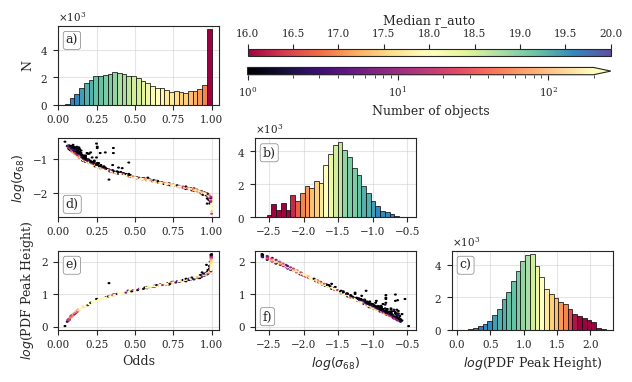

: 

In [38]:
# Triangle plot of pdf metrics
pdf_metrics_triangle = True

if pdf_metrics_triangle:
    # For the histogram colourbar
    histo = plt.imshow(np.array([np.arange(16, 21)]), cmap="Spectral")
    histo.set_visible(False)
    plt.close()

    # Triangle plot of pdf metrics
    fig, axes = plt.subplots(3, 3, figsize=set_size(width=width, subplots=(3, 3), fraction=1), layout='tight')

    colors = plt.cm.plasma(np.linspace(0, 0.8, 3))

    n_bins = 31
    hist_cmap = plt.get_cmap('Spectral', n_bins)
    scat_cmap = plt.get_cmap('magma')

    # Histograms
    x_std = (result_df[f'r_{aperture}'] - 16) / (21 - 16)

    n, bins, patches = axes[0, 0].hist(result_df['odds'], bins=31, lw=0.5, edgecolor='black')#, histtype='step', color=colors[0])
    for i in range(len(bins)-1):
        patches[i].set_facecolor(hist_cmap(x_std[result_df['odds'].between(bins[i], bins[i+1])].median()))

    n, bins, patches = axes[1, 1].hist(np.log10(result_df['sigma_68']), bins=31, lw=0.5, edgecolor='black')#, histtype='step', color=colors[0])
    for i in range(len(bins)-1):
        patches[i].set_facecolor(hist_cmap(x_std[np.log10(result_df['sigma_68']).between(bins[i], bins[i+1])].median()))

    n, bins, patches = axes[2, 2].hist(np.log10(result_df['pdf_peak_height']), bins=31, lw=0.5, edgecolor='black')#, histtype='step', color=colors[0])
    for i in range(len(bins)-1):
        patches[i].set_facecolor(hist_cmap(x_std[np.log10(result_df['pdf_peak_height']).between(bins[i], bins[i+1])].median()))

    for i in range(3):
        #axes[i, i].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        axes[i, i].ticklabel_format(style='sci', scilimits=(0,0), axis='y', useMathText=True)

    # Scatter plots
    scatter = axes[1, 0].hexbin(result_df['odds'], np.log10(result_df['sigma_68']), 
                                gridsize=100, bins='log', cmap=scat_cmap, vmin=1, vmax=200, rasterized=True),
    axes[2, 0].hexbin(result_df['odds'], np.log10(result_df['pdf_peak_height']), 
                    gridsize=100, bins='log', cmap=scat_cmap, vmin=1, vmax=200, rasterized=True),
    axes[2, 1].hexbin(np.log10(result_df['sigma_68']), np.log10(result_df['pdf_peak_height']), 
                    gridsize=100, bins='log', cmap=scat_cmap, vmin=1, vmax=200, rasterized=True),

    # Labels
    axes[0, 0].set_ylabel('N')
    axes[1, 0].set_ylabel(r'$log(\sigma_{68})$')
    axes[2, 0].set_ylabel(r'$log$(PDF Peak Height)')
    axes[2, 0].set_xlabel('Odds')
    axes[2, 1].set_xlabel(r'$log(\sigma_{68})$')
    axes[2, 2].set_xlabel(r'$log$(PDF Peak Height)')

    # Text
    bbox = dict(facecolor='white', edgecolor='grey', lw=0.5, boxstyle='round,pad=0.2')

    axes[0, 0].text(0.05, 0.77, 'a)', transform=axes[0, 0].transAxes, bbox=bbox)
    axes[1, 1].text(0.05, 0.77, 'b)', transform=axes[1, 1].transAxes, bbox=bbox)
    axes[2, 2].text(0.05, 0.77, 'c)', transform=axes[2, 2].transAxes, bbox=bbox)
    axes[1, 0].text(0.05, 0.12, 'd)', transform=axes[1, 0].transAxes, bbox=bbox)
    axes[2, 0].text(0.05, 0.77, 'e)', transform=axes[2, 0].transAxes, bbox=bbox)
    axes[2, 1].text(0.05, 0.12, 'f)', transform=axes[2, 1].transAxes, bbox=bbox)

    # Disable unused plots
    axes[0, 1].axis('off')
    axes[0, 2].axis('off')
    axes[1, 2].axis('off')

    cbar = fig.colorbar(histo, ax=[axes[0,1], axes[0,2]], aspect=50, shrink=1.15, location='top', orientation='horizontal', anchor=(0, 0))
    cbar.set_label('Median r_auto')

    cbar = fig.colorbar(scatter[0], ax=[axes[0,1], axes[0,2]], aspect=50, shrink=1.15, extend='max', orientation='horizontal', anchor=(0, 17))
    cbar.set_label('     Number of objects')

    plt.savefig(f'images/results_pdf_metrics_triangle.{saveformat}', dpi=288, bbox_inches='tight')
    plt.show()

In [26]:
# PDF metrics that do not depend on the redshift
pdf_metrics_no_redshift = False

if pdf_metrics_no_redshift:
    #fig, axes = plt.subplots(3, 2, figsize=set_size(width=width, subplots=(2, 1), fraction=1))

    fig = plt.figure(figsize=set_size(width=width, subplots=(2, 1), fraction=1))

    gs = gridspec.GridSpec(3, 2, figure=fig, wspace=0.1, hspace=0.1)
    axes = np.array([[fig.add_subplot(gs[i, j]) for j in range(2)] for i in range(3)])

    dashes = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]
    mag_bins = np.arange(14, 21, 2)
    colors = plt.cm.plasma(np.linspace(0, 0.9, len(mag_bins)+1))
    colors[0] = (0,0,0,1)
    bins = 41

    for i, metric in enumerate(['odds', 'sigma_68', 'pdf_peak_height']):
        if metric == 'odds':
            metric_name = 'Odds'
            metric_range = (0, 1)
        elif metric == 'sigma_68':
            metric_name = 'log10($\sigma_{68}$)'
            metric_range = (-2.2, -0.5)
        elif metric == 'pdf_peak_height':
            metric_name = 'PDF peak height'
            metric_range = (0, 55)

        data_to_plot = result_df[metric]
        if metric == 'sigma_68':
            data_to_plot = np.log10(data_to_plot)

        ax = axes[i,0]
        ax.hist(data_to_plot, bins=bins, range=metric_range, histtype='step', alpha=1, lw=1.5, color=colors[0], zorder=-1)
        for j, bin in enumerate(mag_bins):
            if bin != 20:
                cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
                ax.hist(data_to_plot[cond], bins=bins, range=metric_range, histtype='step', lw=1.5, color=colors[j+1])
            else:
                cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
                ax.hist(data_to_plot[cond], bins=bins, range=metric_range, histtype='step', lw=1.5, color=colors[j+1])

        ax.set_xlabel(metric_name)
        ax.set_ylabel('Number of objects')
        ax.ticklabel_format(style='sci', scilimits=(0,0), axis='y', useMathText=True)

        ax = axes[i,1]
        ax.hist(data_to_plot, bins=bins, range=metric_range, histtype='step', alpha=1, lw=1.5, density=True, color=colors[0], label='All'if i==0 else None, zorder=-1)
        for j, bin in enumerate(mag_bins):
            if bin != 20:
                label = f'{bin}$\leq$ r < {bin+2}'
                cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
                ax.hist(data_to_plot[cond], bins=bins, range=metric_range, histtype='step', lw=1.5, density=True, color=colors[j+1], label=label if i==0 else None)
            else:
                label = f'r $\geq${bin}'
                cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
                ax.hist(data_to_plot[cond], bins=bins, range=metric_range, histtype='step', lw=1.5, density=True, color=colors[j+1], label=label if i==0 else None)

        ax.set_xlabel(metric_name)
        ax.set_ylabel('Density')
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()

    fig.legend(loc='center', bbox_to_anchor=(0.5, -0.02), ncol=5, handlelength=2)
    fig.align_ylabels()

    axes[0,0].text(0.05, 0.88, 'a)', transform=axes[0,0].transAxes, bbox=bbox)
    axes[1,0].text(0.05, 0.88, 'c)', transform=axes[1,0].transAxes, bbox=bbox)
    axes[2,0].text(0.05, 0.88, 'e)', transform=axes[2,0].transAxes, bbox=bbox)
    axes[0,1].text(0.05, 0.88, 'b)', transform=axes[0,1].transAxes, bbox=bbox)
    axes[1,1].text(0.95, 0.88, 'd)', transform=axes[1,1].transAxes, bbox=bbox, ha='right')
    axes[2,1].text(0.95, 0.88, 'f)', transform=axes[2,1].transAxes, bbox=bbox, ha='right')

    plt.savefig(f'images/results_pdf_metrics_no_redshift.{saveformat}', dpi=288)
    plt.show()

: 

In [27]:
# PDF metrics that do not depend the redshift
pdf_metrics_redshift = False

if pdf_metrics_redshift:
    fig = plt.figure(figsize=set_size(width=width, subplots=(2, 1), fraction=1))

    dashes = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]

    bbox = dict(facecolor='white', edgecolor='grey', lw=0.5, boxstyle='round,pad=0.2')

    # "Outer" gridspec
    gs_outer = gridspec.GridSpec(3, 2, figure=fig, hspace=0.1)

    ax_pit    = fig.add_subplot(gs_outer[0, 0:2])
    ax_crps_1 = fig.add_subplot(gs_outer[1, 0])
    ax_crps_2 = fig.add_subplot(gs_outer[1, 1])
    ax_hpdci  = fig.add_subplot(gs_outer[2, 0:2])

    dashes = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]
    mag_bins = np.arange(14, 21, 2)
    colors = plt.cm.plasma(np.linspace(0, 0.9, len(mag_bins)+1))
    colors[0] = (0,0,0,1)
    bins = 51

    # PIT :-------------------------------------------------------------------------------------------------------------
    ax_pit.hist(result_df['pit'], bins=bins, histtype='step', density=True, lw=1.5, color=colors[0])
    for j, bin in enumerate(mag_bins):
        if bin != 20:
            label = f'{bin}$\leq$ r < {bin+2}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        else:
            label = f'r $\geq${bin}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        ax_pit.hist(result_df['pit'][cond], bins=bins, histtype='step', lw=1.5, density=True, color=colors[j+1])
    #N, _, _ = ax_pit.hist(result_df['pit'], bins=31, range=(0, 1), histtype='step', lw=1.5, density=True, color=colors[0])
    ax_pit.plot([0, 0], [0, 1], linestyle='--', color='black', lw=1, label='Ideal')
    ax_pit.plot([0, 1], [1, 1], linestyle='--', color='black', lw=1)
    ax_pit.plot([1, 1], [0, 1], linestyle='--', color='black', lw=1)
    ax_pit.set_xlabel('PIT')
    ax_pit.set_ylim(0, 1.5)
    ax_pit.legend(loc='lower center')
    ax_pit.set_ylabel('Density')

    # CRPS :------------------------------------------------------------------------------------------------------------
    ax_crps_1.hist(np.log10(result_df['crps']), bins=bins, histtype='step', density=False, lw=1.5, color=colors[0])
    for j, bin in enumerate(mag_bins):
        if bin != 20:
            label = f'{bin}$\leq$ r < {bin+2}'
        else:
            label = f'r $\geq${bin}'
        cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        ax_crps_1.hist(np.log10(result_df['crps'])[cond], bins=bins, histtype='step', lw=1.5, density=False, color=colors[j+1])

    ax_crps_1.set_xlabel('log(CRPS)')
    ax_crps_1.set_ylabel('Number of objects')
    ax_crps_2.hist(np.log10(result_df['crps']), bins=bins, histtype='step', density=True, lw=1.5, color=colors[0], label='All')
    for j, bin in enumerate(mag_bins):
        if bin != 20:
            label = f'{bin}$\leq$ r < {bin+2}'
        else:
            label = f'r $\geq${bin}'
        cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        ax_crps_2.hist(np.log10(result_df['crps'])[cond], bins=bins, histtype='step', lw=1.5, density=True, color=colors[j+1], label=label)
    ax_crps_2.set_xlabel('log(CRPS)')
    ax_crps_2.set_ylabel('Density')


    # HPDCI :-----------------------------------------------------------------------------------------------------------
    c, f = ecdf(result_df['hpdci'].values)
    ax_hpdci.plot([0,1], [0,1], '--', color='black', lw=1,)
    ax_hpdci.plot(c, f, dashes=dashes[0], color=colors[0], lw=1.5)
    dash_idx = 1
    for j, bin in enumerate(mag_bins):
        cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        c, f = ecdf(result_df['hpdci'][cond].values)
        ax_hpdci.plot(c, f, dashes=dashes[dash_idx], color=colors[dash_idx], lw=1.5)
        dash_idx = dash_idx + 1

    # Inset ax
    # axins = ax_hpdci.inset_axes([0.05, 0.6, 0.3, 0.3], transform=ax_hpdci.transAxes) # [x1, y1, x_width, y_width]
    # c, f = ecdf(result_df['hpdci'].values)
    # axins.plot(c, f, label='All', dashes=dashes[0], color=colors[0], lw=2)
    # dash_idx = 1
    # for j, bin in enumerate(mag_bins):
    #     cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
    #     c, f = ecdf(result_df['hpdci'][cond].values)
    #     axins.plot(c, f, dashes=dashes[dash_idx], color=colors[dash_idx], lw=1.5)
    #     dash_idx = dash_idx + 1
    # axins.plot([0,1], [0,1], '--', color='black', lw=1, zorder=-1)
    axins = ax_hpdci.inset_axes([0.05, 0.6, 0.3, 0.3], transform=ax_hpdci.transAxes) # [x1, y1, x_width, y_width]
    c, f = ecdf(result_df['hpdci'].values)
    axins.plot(c, f-c, label='All', dashes=dashes[0], color=colors[0], lw=2)
    dash_idx = 1
    for j, bin in enumerate(mag_bins):
        cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        c, f = ecdf(result_df['hpdci'][cond].values)
        axins.plot(c, f-c, dashes=dashes[dash_idx], color=colors[dash_idx], lw=1.5)
        dash_idx = dash_idx + 1
    axins.axhline(0, linestyle='--', color='black', lw=1, zorder=-1)

    # sub region of the original image
    #x1, x2, y1, y2 = 0.45, 0.55, 0.45, 0.55
    x1, x2, y1, y2 = 0, 1, -0.012, 0.06
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.set_xticklabels('')
    #axins.set_yticklabels('')
    #ax_hpdci.indicate_inset_zoom(axins, edgecolor='black', lw=1)

    ax_hpdci.set_ylabel('$\hat{F}(c)$')
    ax_hpdci.set_xlabel('c')
    #ax_hpdci.legend(loc='lower right', handlelength=3.5)
    ax_hpdci.text(0.5, 1-0.005, 'Underconfidence', ha='center', va='top', size='medium')
    ax_hpdci.text(0.5, 0.005, 'Overconfidence', ha='center', va='bottom', size='medium')

    # Text :------------------------------------------------------------------------------------------------------------
    ax_pit.text(0.02, 0.90, 'a)', transform=ax_pit.transAxes, bbox=bbox)
    ax_crps_1.text(0.04, 0.90, 'b)', transform=ax_crps_1.transAxes, bbox=bbox)
    ax_crps_2.text(0.95, 0.90, 'c)', transform=ax_crps_2.transAxes, bbox=bbox, ha='right')
    ax_hpdci.text(0.98, 0.05, 'd)', transform=ax_hpdci.transAxes, bbox=bbox, ha='right')

    fig.legend(loc='center', bbox_to_anchor=(0.54, -0.02), ncol=6, handlelength=2)

    #fig.legend(loc='center', bbox_to_anchor=(0.5, -0.02), ncol=5, handlelength=2)
    fig.align_ylabels()

    #plt.savefig(f'images/results_pdf_metrics_redshift.{saveformat}', dpi=288, bbox_inches='tight')
    plt.show()

: 

In [28]:
# PDF metrics that do not depend the redshift
pdf_metrics_redshift = False

if pdf_metrics_redshift:
    fig = plt.figure(figsize=set_size(width=width, subplots=(2, 1), fraction=1))

    dashes = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]

    bbox = dict(facecolor='white', edgecolor='grey', lw=0.5, boxstyle='round,pad=0.2')

    # "Outer" gridspec
    gs_outer = gridspec.GridSpec(3, 2, figure=fig, hspace=0.1)

    ax_pit    = fig.add_subplot(gs_outer[0, 0:2])
    ax_crps_1 = fig.add_subplot(gs_outer[1, 0])
    ax_crps_2 = fig.add_subplot(gs_outer[1, 1])
    ax_hpdci_1 = fig.add_subplot(gs_outer[2, 0])
    ax_hpdci_2 = fig.add_subplot(gs_outer[2, 1])

    mag_bins = np.arange(14, 21, 2)
    colors = plt.cm.plasma(np.linspace(0, 0.9, len(mag_bins)+1))
    colors[0] = (0,0,0,1)
    bins = 51

    # PIT :-------------------------------------------------------------------------------------------------------------
    ax_pit.hist(result_df['pit'], bins=bins, histtype='step', density=True, lw=1.5, color=colors[0])
    for j, bin in enumerate(mag_bins):
        if bin != 20:
            label = f'{bin}$\leq$ r < {bin+2}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        else:
            label = f'r $\geq${bin}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        ax_pit.hist(result_df['pit'][cond], bins=bins, histtype='step', lw=1.5, density=True, color=colors[j+1])
    #N, _, _ = ax_pit.hist(result_df['pit'], bins=31, range=(0, 1), histtype='step', lw=1.5, density=True, color=colors[0])
    ax_pit.plot([0, 0], [0, 1], linestyle='--', color='black', lw=1, label='Ideal')
    ax_pit.plot([0, 1], [1, 1], linestyle='--', color='black', lw=1)
    ax_pit.plot([1, 1], [0, 1], linestyle='--', color='black', lw=1)
    ax_pit.set_xlabel('PIT')
    ax_pit.set_ylim(0, 1.5)
    ax_pit.legend(loc='lower center')
    ax_pit.set_ylabel('Density')

    # CRPS :------------------------------------------------------------------------------------------------------------
    ax_crps_1.hist(np.log10(result_df['crps']), bins=bins, histtype='step', density=False, lw=1.5, color=colors[0])
    for j, bin in enumerate(mag_bins):
        if bin != 20:
            label = f'{bin}$\leq$ r < {bin+2}'
        else:
            label = f'r $\geq${bin}'
        cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        ax_crps_1.hist(np.log10(result_df['crps'])[cond], bins=bins, histtype='step', lw=1.5, density=False, color=colors[j+1])

    ax_crps_1.set_xlabel('log(CRPS)')
    ax_crps_1.set_ylabel('Number of objects')
    ax_crps_2.hist(np.log10(result_df['crps']), bins=bins, histtype='step', density=True, lw=1.5, color=colors[0], label='All')
    for j, bin in enumerate(mag_bins):
        if bin != 20:
            label = f'{bin}$\leq$ r < {bin+2}'
        else:
            label = f'r $\geq${bin}'
        cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        ax_crps_2.hist(np.log10(result_df['crps'])[cond], bins=bins, histtype='step', lw=1.5, density=True, color=colors[j+1], label=label)
    ax_crps_2.set_xlabel('log(CRPS)')
    ax_crps_2.set_ylabel('Density')


    # HPDCI :-----------------------------------------------------------------------------------------------------------
    c, f = ecdf(result_df['hpdci'].values)
    ax_hpdci_1.plot([0,1], [0,1], '--', color='black', lw=1,)
    ax_hpdci_1.plot(c, f, dashes=dashes[0], color=colors[0], lw=1.5)
    dash_idx = 1
    for j, bin in enumerate(mag_bins):
        cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        c, f = ecdf(result_df['hpdci'][cond].values)
        ax_hpdci_1.plot(c, f, dashes=dashes[dash_idx], color=colors[dash_idx], lw=1.5)
        dash_idx = dash_idx + 1

    c, f = ecdf(result_df['hpdci'].values)
    ax_hpdci_2.plot(c, f-c, dashes=dashes[0], color=colors[0], lw=2)
    dash_idx = 1
    for j, bin in enumerate(mag_bins):
        cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        c, f = ecdf(result_df['hpdci'][cond].values)
        ax_hpdci_2.plot(c, f-c, dashes=dashes[dash_idx], color=colors[dash_idx], lw=1.5)
        dash_idx = dash_idx + 1
    ax_hpdci_2.axhline(0, linestyle='--', color='black', lw=1, zorder=-1)

    # sub region of the original image
    #x1, x2, y1, y2 = 0.45, 0.55, 0.45, 0.55
    x1, x2, y1, y2 = 0, 1, -0.012, 0.06
    #ax_hpdci_2.set_xlim(x1, x2)
    #ax_hpdci_2.set_ylim(y1, y2)
    #axins.set_xticklabels('')
    #axins.set_yticklabels('')
    #ax_hpdci.indicate_inset_zoom(axins, edgecolor='black', lw=1)

    ax_hpdci_1.set_ylabel('$\hat{F}(c)$')
    ax_hpdci_1.set_xlabel('c')
    ax_hpdci_2.set_ylabel('HPDCI Residuals ($\hat{F}(c) - c$)')
    ax_hpdci_2.set_xlabel('c')
    #ax_hpdci.legend(loc='lower right', handlelength=3.5)
    ax_hpdci_1.text(0.5, 1-0.005, 'Underconfidence', ha='center', va='top', size='medium')
    ax_hpdci_1.text(0.5, 0.005, 'Overconfidence', ha='center', va='bottom', size='medium')

    # Text :------------------------------------------------------------------------------------------------------------
    ax_pit.text(0.02, 0.90, 'a)', transform=ax_pit.transAxes, bbox=bbox)
    ax_crps_1.text(0.04, 0.90, 'b)', transform=ax_crps_1.transAxes, bbox=bbox)
    ax_crps_2.text(0.95, 0.90, 'c)', transform=ax_crps_2.transAxes, bbox=bbox, ha='right')
    ax_hpdci_1.text(0.95, 0.05, 'd)', transform=ax_hpdci_1.transAxes, bbox=bbox, ha='right')
    ax_hpdci_2.text(0.95, 0.90, 'e)', transform=ax_hpdci_2.transAxes, bbox=bbox, ha='right')

    fig.legend(loc='center', bbox_to_anchor=(0.545, -0.02), ncol=6, handlelength=2)

    #fig.legend(loc='center', bbox_to_anchor=(0.5, -0.02), ncol=5, handlelength=2)
    fig.align_ylabels()

    plt.savefig(f'images/results_pdf_metrics_redshift.{saveformat}', dpi=288, bbox_inches='tight')
    plt.show()

: 

In [29]:
# PIT histogram (all and binned)
pdf_metrics_binned = False

if pdf_metrics_binned:
    # PIT histogram
    fig = plt.figure(figsize=set_size(width=width, subplots=(1, 2), fraction=1))
    gs  = gridspec.GridSpec(1, 2, figure=fig, wspace=0.1)

    ax_pit = fig.add_subplot(gs[0, 0])
    ax_pit_bin = fig.add_subplot(gs[0, 1])

    ax_pit.plot([0, 0], [0, 1], linestyle='--', color='black', lw=1, label='Ideal')
    ax_pit.plot([0, 1], [1, 1], linestyle='--', color='black', lw=1)
    ax_pit.plot([1, 1], [0, 1], linestyle='--', color='black', lw=1)

    ax_pit_bin.plot([0, 0], [0, 1], linestyle='--', color='black', lw=1)
    ax_pit_bin.plot([0, 1], [1, 1], linestyle='--', color='black', lw=1)
    ax_pit_bin.plot([1, 1], [0, 1], linestyle='--', color='black', lw=1)

    for ax in [ax_pit, ax_pit_bin]:
        ax.set_xlabel('PIT')
        ax.set_ylim(0, 1.5)
        ax.set_ylabel('Density')

    mag_bins = np.arange(14, 21, 2)
    colors = plt.cm.plasma(np.linspace(0, 0.9, len(mag_bins)+1))
    colors[0] = (0,0,0,1)
    bins = 41

    n_uniform = np.ones(bins)
    n_all, _, _ = ax_pit.hist(result_df['pit'], bins=bins, histtype='step', density=True, lw=1.5, color='black', label='All')
    ax_pit.legend(loc='lower center')
    kl_div_all = np.sum(kl_div(n_all, n_uniform)) / np.log(len(result_df['pit']))
    print(f"kl_all {kl_div_all:.4f}, len {len(result_df['pit'])}")

    for j, bin in enumerate(mag_bins):
        if bin != 20:
            label = f'{bin}$\leq$r<{bin+2}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        else:
            label = f'r $\geq${bin}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        n_label, _, _ = ax_pit_bin.hist(result_df['pit'][cond], bins=bins, histtype='step', lw=1.5, density=True, color=colors[j+1], label=label)
        kl_div_label = np.sum(kl_div(n_label, n_uniform)) / np.log(len(result_df['pit'][cond]))
        print(f"kl_{label} {kl_div_label:.4f}, len {len(result_df['pit'][cond])}")
    ax_pit_bin.legend(ncols=2, handlelength=0.8)

    #plt.savefig(f'images/results_pdf_pit.{saveformat}', dpi=288, bbox_inches='tight')
    plt.show()



    # CRPS histogram
    fig = plt.figure(figsize=set_size(width=width, subplots=(1, 2), fraction=1))
    gs  = gridspec.GridSpec(1, 2, figure=fig, wspace=0.1)

    ax_crps = fig.add_subplot(gs[0, 0])
    ax_crps_bin = fig.add_subplot(gs[0, 1])

    for ax in [ax_crps, ax_crps_bin]:
        ax.set_xlabel('log$_{10}$(CRPS)')
        ax.set_ylabel('Density')

    n, b, _ = ax_crps.hist(np.log10(result_df['crps']), bins=bins, histtype='step', density=True, lw=1.5, color='black', label='All')
    ax_crps.legend()
    print(f"CRPS peak all {b[np.argmax(n)]:.2f}")

    for j, bin in enumerate(mag_bins):
        if bin != 20:
            label = f'{bin}$\leq$r<{bin+2}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        else:
            label = f'r$\geq${bin}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        n, b, _ = ax_crps_bin.hist(np.log10(result_df['crps'])[cond], bins=bins, histtype='step', lw=1.5, density=True, color=colors[j+1], label=label)
        print(f"CRPS peak {label} {b[np.argmax(n)]:.2f}")
        
    ax_crps_bin.legend(ncols=2, handlelength=0.8)

    #plt.savefig(f'images/results_pdf_crps.{saveformat}', dpi=288, bbox_inches='tight')
    plt.show()



    # HPDCI plot
    fig = plt.figure(figsize=set_size(width=width, subplots=(1, 2), fraction=1))
    gs  = gridspec.GridSpec(1, 2, figure=fig, wspace=0.1)

    ax_hpdci = fig.add_subplot(gs[0, 0])
    ax_hpdci_bin = fig.add_subplot(gs[0, 1])

    dashes = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]

    c, f = ecdf(result_df['hpdci'].values)
    ax_hpdci.plot(c, f, label='All', dashes=dashes[0], color=colors[0], lw=2)
    dash_idx = 1
    for j, bin in enumerate(mag_bins):        
        if bin != 20:
            label = f'{bin}$\leq$r<{bin+2}'
        else:
            label = f'r$\geq${bin}'
        cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        c, f = ecdf(result_df['hpdci'][cond].values)
        ax_hpdci.plot(c, f, label=label, dashes=dashes[dash_idx], color=colors[dash_idx], lw=1.5)
        dash_idx = dash_idx + 1
    ax_hpdci.plot([0, 1], [0, 1], linestyle='--', color='black', lw=1, zorder=-1, label='Ideal')
    ax_hpdci.set_ylabel('$\hat{F}(c)$')
    ax_hpdci.set_xlabel('c')
    ax_hpdci.text(0.5, 1-0.005, 'Underconfidence', ha='center', va='top', size='medium')
    ax_hpdci.text(0.5, 0.005, 'Overconfidence', ha='center', va='bottom', size='medium')

    c, f = ecdf(result_df['hpdci'].values)
    ax_hpdci_bin.plot(c, f-c, dashes=dashes[0], color=colors[0], lw=2)
    dash_idx = 1
    for j, bin in enumerate(mag_bins):
        cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        c, f = ecdf(result_df['hpdci'][cond].values)
        ax_hpdci_bin.plot(c, f-c, dashes=dashes[dash_idx], color=colors[dash_idx], lw=1.5)
        dash_idx = dash_idx + 1
    ax_hpdci_bin.axhline(0, linestyle='--', color='black', lw=1, zorder=-1)
    ax_hpdci_bin.set_ylabel('Residuals ($\hat{F}(c)-c$)')
    ax_hpdci_bin.set_xlabel('c')

    fig.legend(loc='center', bbox_to_anchor=(0.54, -0.05), ncol=6, handlelength=3)

    plt.savefig(f'images/results_pdf_hpdci.{saveformat}', dpi=288, bbox_inches='tight')
    plt.show()

: 

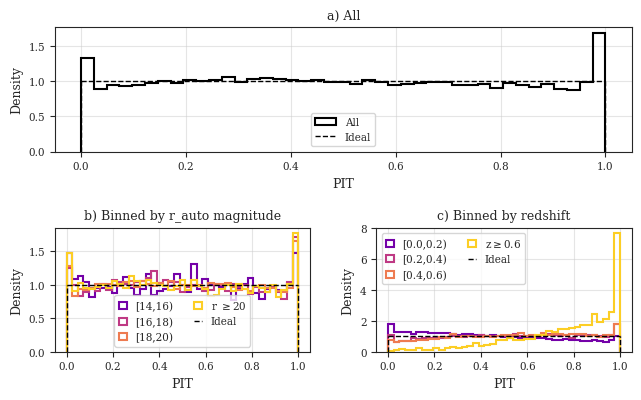

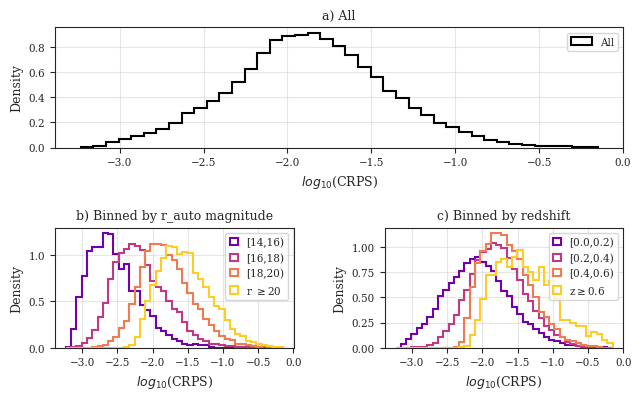

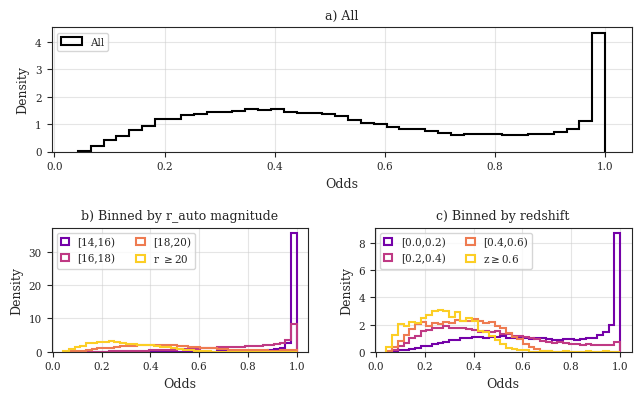

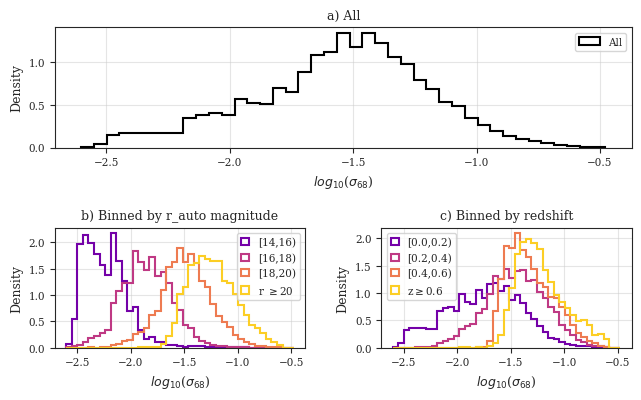

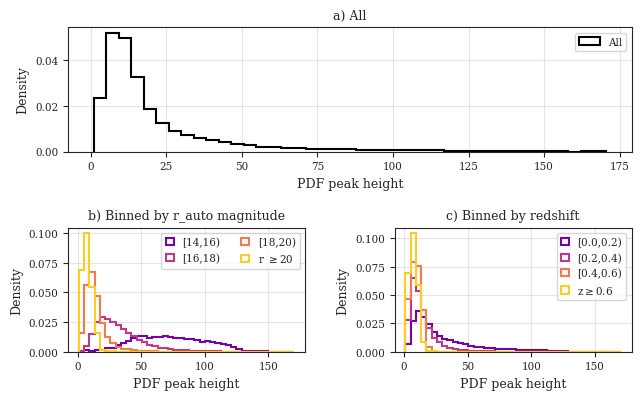

: 

In [33]:
pdf_metrics_binned_withz = True

if pdf_metrics_binned_withz:
    mag_bins   = np.arange(14, 21, 2)
    zspec_bins = np.arange(0, 0.8, 0.2)
    colors = plt.cm.plasma(np.linspace(0, 0.9, len(mag_bins)+1))
    colors[0] = (0,0,0,1)
    bins = 41

    for name, metric in zip(['PIT', 'CRPS', 'Odds', '$\sigma_{68}$', 'PDF peak height'], ['pit', 'crps', 'odds', 'sigma_68', 'pdf_peak_height']):
        fig = plt.figure(figsize=set_size(width=width, subplots=(2, 2), fraction=1))
        gs  = gridspec.GridSpec(2, 2, figure=fig, wspace=0.05, hspace=0.1)

        ax_all = fig.add_subplot(gs[0, 0:2])
        ax_bin_mag = fig.add_subplot(gs[1, 0])
        ax_bin_z   = fig.add_subplot(gs[1, 1])

        for ax in [ax_all, ax_bin_mag, ax_bin_z]:
            if (name == 'CRPS') or (name == '$\sigma_{68}$'):
                ax.set_xlabel(r"$log_{10}$"+f"({name})")
            else:
                ax.set_xlabel(name)
            ax.set_ylabel('Density')

        if (name == 'CRPS') or (name == '$\sigma_{68}$'):
            ax_all.hist(np.log10(result_df[metric]), bins=bins, histtype='step', lw=1.5, density=True, color=colors[0], label='All')
        else:
            ax_all.hist(result_df[metric], bins=bins, histtype='step', lw=1.5, density=True, color=colors[0], label='All')

        for j, bin in enumerate(mag_bins):
            if bin != 20:
                #label = f'{bin}$\leq$r<{bin+2}'
                label = f'[{bin},{bin+2})'
                cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
            else:
                label = f'r $\geq${bin}'
                cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))

            if (name == 'CRPS') or (name == '$\sigma_{68}$'):
                ax_bin_mag.hist(np.log10(result_df[metric][cond]), bins=bins, range=(np.log10(result_df[metric]).min(), np.log10(result_df[metric]).max()), histtype='step', lw=1.5, density=True, color=colors[j+1], label=label)
            else:
                ax_bin_mag.hist(result_df[metric][cond], bins=bins, range=(result_df[metric].min(), result_df[metric].max()), histtype='step', lw=1.5, density=True, color=colors[j+1], label=label)

        for j, bin in enumerate(zspec_bins):
            if bin != zspec_bins[-1]:
                #label = f'{bin:.1f}$\leq$z<{bin+0.2:.1f}'
                label = f'[{bin:.1f},{bin+0.2:.1f})'
                cond  = (result_df['z'].between(bin, bin+0.2, inclusive='left'))
            else:
                label = f'z$\geq${bin:.1f}'
                cond  = (result_df['z'].between(bin, bin+0.2, inclusive='left'))

            if (name == 'CRPS') or (name == '$\sigma_{68}$'):
                ax_bin_z.hist(np.log10(result_df[metric][cond]), bins=bins, range=(np.log10(result_df[metric]).min(), np.log10(result_df[metric]).max()), histtype='step', lw=1.5, density=True, color=colors[j+1], label=label)
            else:
                ax_bin_z.hist(result_df[metric][cond], bins=bins, range=(result_df[metric].min(), result_df[metric].max()), histtype='step', lw=1.5, density=True, color=colors[j+1], label=label)

        if name == 'PIT':
            for ax in [ax_all, ax_bin_mag, ax_bin_z]:
                ax.plot([0, 0], [0, 1], linestyle='--', color='black', lw=1, label='Ideal')
                ax.plot([0, 1], [1, 1], linestyle='--', color='black', lw=1)
                ax.plot([1, 1], [0, 1], linestyle='--', color='black', lw=1)

        if (name == 'PIT'):
            ax_all.legend(loc='lower center')
        else:
            ax_all.legend()
            
        if (name == 'PIT') or (name == 'Odds'):
            ax_bin_mag.legend(ncols=2, handlelength=0.8)
            ax_bin_z.legend(ncols=2, handlelength=0.8)
        else:
            ax_bin_mag.legend(handlelength=0.8)
            ax_bin_z.legend(handlelength=0.8)

        #if name == 'Odds':
            #ax_bin_z.set_ylim(top=4.5)

        if name == 'PDF peak height':
            ax_bin_mag.legend(ncols=2, handlelength=0.8)
            #ax_bin_mag.set_ylim(top=0.150)

        ax_all.set_title('a) All')
        ax_bin_mag.set_title('b) Binned by r_auto magnitude')
        ax_bin_z.set_title('c) Binned by redshift')

        plt.savefig(f'images/results_pdf_{metric}_mag_and_z.{saveformat}', dpi=288, bbox_inches='tight')
        plt.show()

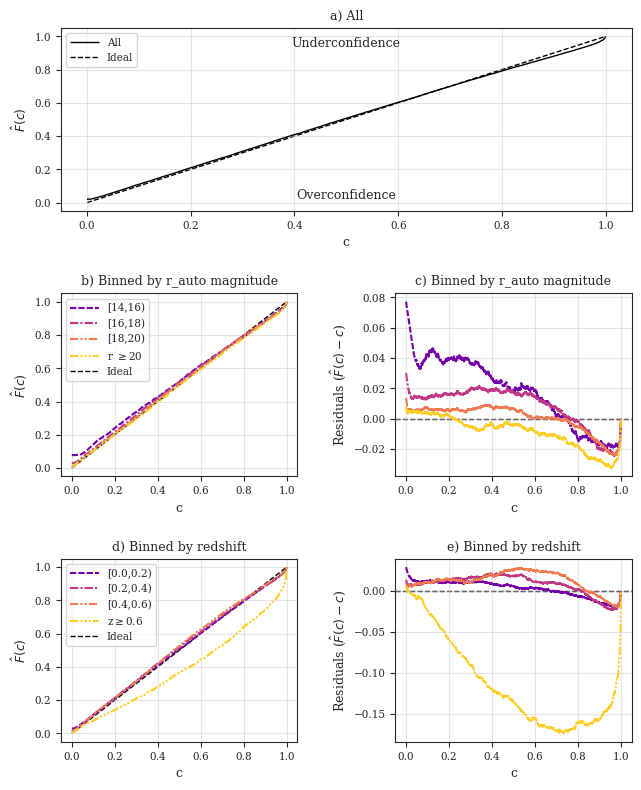

: 

In [35]:
hpdci_binned_mag_z = True

if hpdci_binned_mag_z:
    mag_bins   = np.arange(14, 21, 2)
    zspec_bins = np.arange(0, 0.8, 0.2)
    colors = plt.cm.plasma(np.linspace(0, 0.9, len(mag_bins)+1))
    colors[0] = (0,0,0,1)
    bins = 41

    fig = plt.figure(figsize=set_size(width=width, subplots=(4, 2), fraction=1))
    gs  = gridspec.GridSpec(3, 2, figure=fig, wspace=0.05, hspace=0.1)

    ax_all         = fig.add_subplot(gs[0, 0:2])
    ax_bin_mag     = fig.add_subplot(gs[1, 0])
    ax_bin_mag_res = fig.add_subplot(gs[1, 1])
    ax_bin_z       = fig.add_subplot(gs[2, 0])
    ax_bin_z_res   = fig.add_subplot(gs[2, 1])

    dashes = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]

    c, f = ecdf(result_df['hpdci'].values)
    ax_all.plot(c, f, label='All', dashes=dashes[0], color=colors[0], lw=1)
    dash_idx = 1
    ax_all.plot([0, 1], [0, 1], linestyle='--', color='black', lw=1, zorder=-1, label='Ideal')
    ax_all.set_ylabel('$\hat{F}(c)$')
    ax_all.set_xlabel('c')
    ax_all.text(0.5, 1-0.005, 'Underconfidence', ha='center', va='top', size='medium')
    ax_all.text(0.5, 0.005, 'Overconfidence', ha='center', va='bottom', size='medium')

    dash_idx = 1
    for j, bin in enumerate(mag_bins):
        if bin != 20:
            #label = f'{bin}$\leq$r<{bin+2}'
            label = f'[{bin},{bin+2})'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        else:
            label = f'r $\geq${bin}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        c, f = ecdf(result_df['hpdci'][cond].values)
        ax_bin_mag.plot(c, f, dashes=dashes[dash_idx], color=colors[dash_idx], lw=1.5, label=label)
        ax_bin_mag_res.plot(c, f-c, dashes=dashes[dash_idx], color=colors[dash_idx], lw=1.5, label=label)
        dash_idx = dash_idx + 1
    ax_bin_mag.plot([0, 1], [0, 1], linestyle='--', color='black', lw=1, zorder=-1, label='Ideal')
    ax_bin_mag_res.axhline(0, linestyle='--', color='black', lw=1, zorder=-1)
    ax_bin_mag.set_ylabel('$\hat{F}(c$)')
    ax_bin_mag_res.set_ylabel('Residuals ($\hat{F}(c)-c$)')

    dash_idx = 1
    for j, bin in enumerate(zspec_bins):
        if bin != zspec_bins[-1]:
            #label = f'{bin:.1f}$\leq$z<{bin+0.2:.1f}'
            label = f'[{bin:.1f},{bin+0.2:.1f})'
            cond  = (result_df['z'].between(bin, bin+0.2, inclusive='left'))
        else:
            label = f'z$\geq${bin:.1f}'
            cond  = (result_df['z'].between(bin, bin+0.2, inclusive='left'))

        c, f = ecdf(result_df['hpdci'][cond].values)
        ax_bin_z.plot(c, f, dashes=dashes[dash_idx], color=colors[dash_idx], lw=1.5, label=label)
        ax_bin_z_res.plot(c, f-c, dashes=dashes[dash_idx], color=colors[dash_idx], lw=1.5, label=label)
        dash_idx = dash_idx + 1
    ax_bin_z.plot([0, 1], [0, 1], linestyle='--', color='black', lw=1, zorder=-1, label='Ideal')
    ax_bin_z_res.axhline(0, linestyle='--', color='black', lw=1, zorder=-1)
    ax_bin_z.set_ylabel('$\hat{F}(c)$')
    ax_bin_z_res.set_ylabel('Residuals ($\hat{F}(c)-c$)')

    for ax in [ax_all, ax_bin_mag, ax_bin_mag_res, ax_bin_z, ax_bin_z_res]:
        ax.set_xlabel('c')

    for ax in [ax_all, ax_bin_mag]:
        ax.legend(ncols=1, handlelength=2.7)

    ax_bin_z.legend(loc='upper left', handlelength=2.7)

    ax_all.set_title('a) All')
    ax_bin_mag.set_title('b) Binned by r_auto magnitude')
    ax_bin_mag_res.set_title('c) Binned by r_auto magnitude')
    ax_bin_z.set_title('d) Binned by redshift')
    ax_bin_z_res.set_title('e) Binned by redshift')

    plt.savefig(f'images/results_pdf_hpdci_mag_z.{saveformat}', dpi=288, bbox_inches='tight')
    plt.show()

In [33]:
# PIT histogram (all and binned)
pdf_metrics_binned_withz = False

if pdf_metrics_binned_withz:
    # PIT histogram
    fig = plt.figure(figsize=set_size(width=width, subplots=(2, 2), fraction=1))
    gs  = gridspec.GridSpec(2, 2, figure=fig, wspace=0.1)

    mag_bins   = np.arange(14, 21, 2)
    zspec_bins = np.arange(0, 0.8, 0.2)
    colors = plt.cm.plasma(np.linspace(0, 0.9, len(mag_bins)+1))
    colors[0] = (0,0,0,1)
    bins = 41

    ax_pit = fig.add_subplot(gs[0, 0:2])
    ax_pit_bin = fig.add_subplot(gs[1, 0])
    ax_pit_z = fig.add_subplot(gs[1, 1])

    ax_pit.plot([0, 0], [0, 1], linestyle='--', color='black', lw=1, label='Ideal')
    ax_pit.plot([0, 1], [1, 1], linestyle='--', color='black', lw=1)
    ax_pit.plot([1, 1], [0, 1], linestyle='--', color='black', lw=1)

    ax_pit_bin.plot([0, 0], [0, 1], linestyle='--', color='black', lw=1)
    ax_pit_bin.plot([0, 1], [1, 1], linestyle='--', color='black', lw=1)
    ax_pit_bin.plot([1, 1], [0, 1], linestyle='--', color='black', lw=1)

    ax_pit_z.plot([0, 0], [0, 1], linestyle='--', color='black', lw=1)
    ax_pit_z.plot([0, 1], [1, 1], linestyle='--', color='black', lw=1)
    ax_pit_z.plot([1, 1], [0, 1], linestyle='--', color='black', lw=1)

    for ax in [ax_pit, ax_pit_bin, ax_pit_z]:
        ax.set_xlabel('PIT')
        #ax.set_ylim(0, 1.5)
        ax.set_ylabel('Density')

    n_uniform = np.ones(bins)
    ax_pit.hist(result_df['pit'], bins=bins, histtype='step', density=True, lw=1.5, color='black', label='All')
    ax_pit.legend(loc='lower center')

    for j, bin in enumerate(mag_bins):
        if bin != 20:
            label = f'{bin}$\leq$r<{bin+2}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        else:
            label = f'r $\geq${bin}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        ax_pit_bin.hist(result_df['pit'][cond], bins=bins, histtype='step', lw=1.5, density=True, color=colors[j+1], label=label)
    ax_pit_bin.legend(ncols=2, handlelength=0.8)

    for j, bin in enumerate(zspec_bins):
        if bin != zspec_bins[-1]:
            label = f'{bin:.1f}$\leq$z<{bin+0.2:.1f}'
            cond  = (result_df['z'].between(bin, bin+0.2, inclusive='left'))
        else:
            label = f'z$\geq${bin:.1f}'
            cond  = (result_df['z'].between(bin, bin+0.2, inclusive='left'))
        ax_pit_z.hist(result_df['pit'][cond], bins=bins, histtype='step', lw=1.5, density=True, color=colors[j+1], label=label)
    ax_pit_z.legend(ncols=2, handlelength=0.8)

    #plt.savefig(f'images/results_pdf_pit.{saveformat}', dpi=288, bbox_inches='tight')
    plt.show()



    # CRPS histogram
    fig = plt.figure(figsize=set_size(width=width, subplots=(2, 2), fraction=1))
    gs  = gridspec.GridSpec(2, 2, figure=fig, wspace=0.1)

    ax_crps = fig.add_subplot(gs[0, 0:2])
    ax_crps_bin = fig.add_subplot(gs[1, 0])
    ax_crps_z = fig.add_subplot(gs[1, 1])

    for ax in [ax_crps, ax_crps_bin, ax_crps_z]:
        ax.set_xlabel('log$_{10}$(CRPS)')
        ax.set_ylabel('Density')

    n, b, _ = ax_crps.hist(np.log10(result_df['crps']), bins=bins, histtype='step', density=True, lw=1.5, color='black', label='All')
    ax_crps.legend()

    for j, bin in enumerate(mag_bins):
        if bin != 20:
            label = f'{bin}$\leq$r<{bin+2}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        else:
            label = f'r$\geq${bin}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        n, b, _ = ax_crps_bin.hist(np.log10(result_df['crps'])[cond], bins=bins, histtype='step', 
                                   lw=1.5, density=True, color=colors[j+1], label=label)
    ax_crps_bin.legend(ncols=2, handlelength=0.8)

    for j, bin in enumerate(zspec_bins):
        if bin != zspec_bins[-1]:
            label = f'{bin:.1f}$\leq$z<{bin+0.2:.1f}'
            cond  = (result_df['z'].between(bin, bin+0.2, inclusive='left'))
        else:
            label = f'z$\geq${bin:.1f}'
            cond  = (result_df['z'].between(bin, bin+0.2, inclusive='left'))
        n, b, _ = ax_crps_z.hist(np.log10(result_df['crps'])[cond], bins=bins, histtype='step', 
                                 lw=1.5, density=True, color=colors[j+1], label=label)
    ax_crps_z.set_xlim(-3, 0.5)
    ax_crps_z.legend(handlelength=0.8)

    #plt.savefig(f'images/results_pdf_crps.{saveformat}', dpi=288, bbox_inches='tight')
    plt.show()

: 

In [34]:
# PIT histogram (all and binned)
pdf_metrics_binned = False

if pdf_metrics_binned:
    # Odds histogram
    fig = plt.figure(figsize=set_size(width=width, subplots=(1, 2), fraction=1))
    gs  = gridspec.GridSpec(1, 2, figure=fig, wspace=0.1)

    mag_bins = np.arange(14, 21, 2)
    colors = plt.cm.plasma(np.linspace(0, 0.9, len(mag_bins)+1))
    colors[0] = (0,0,0,1)
    bins = 41

    ax_odds = fig.add_subplot(gs[0, 0])
    ax_odds_bin = fig.add_subplot(gs[0, 1])

    for ax in [ax_odds, ax_odds_bin]:
        ax.set_xlabel('Odds')
        ax.set_ylabel('Density')

    ax_odds.hist(result_df['odds'], range=(0, 1), bins=bins, histtype='step', density=True, lw=1.5, color='black', label='All')
    ax_odds.legend(loc='lower center')

    for j, bin in enumerate(mag_bins):
        if bin != 20:
            label = f'{bin}$\leq$r<{bin+2}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        else:
            label = f'r $\geq${bin}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        ax_odds_bin.hist(result_df['odds'][cond], range=(0, 1), bins=bins, histtype='step', lw=1.5, density=True, color=colors[j+1], label=label)
    ax_odds_bin.legend(ncols=2, handlelength=0.8)

    plt.savefig(f'images/results_pdf_odds.{saveformat}', dpi=288, bbox_inches='tight')
    plt.show()



    # Sig68 histogram
    fig = plt.figure(figsize=set_size(width=width, subplots=(1, 2), fraction=1))
    gs  = gridspec.GridSpec(1, 2, figure=fig, wspace=0.1)

    ax_sig68 = fig.add_subplot(gs[0, 0])
    ax_sig68_bin = fig.add_subplot(gs[0, 1])

    for ax in [ax_sig68, ax_sig68_bin]:
        ax.set_xlabel('$\sigma_{68}$')
        ax.set_ylabel('Density')

    mag_bins = np.arange(14, 21, 2)
    colors = plt.cm.plasma(np.linspace(0, 0.9, len(mag_bins)+1))
    colors[0] = (0,0,0,1)
    bins = 41

    ax_sig68.hist(np.log10(result_df['sigma_68']), range=(-2.2, -0.5), bins=bins, histtype='step', density=True, lw=1.5, color='black', label='All')
    ax_sig68.legend()

    for j, bin in enumerate(mag_bins):
        if bin != 20:
            label = f'{bin}$\leq$r<{bin+2}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        else:
            label = f'r$\geq${bin}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        ax_sig68_bin.hist(np.log10(result_df['sigma_68'])[cond], range=(-2.2, -0.5), bins=bins, histtype='step', lw=1.5, density=True, color=colors[j+1], label=label)
    ax_sig68_bin.legend(ncols=2, handlelength=0.8)

    plt.savefig(f'images/results_pdf_sig68.{saveformat}', dpi=288, bbox_inches='tight')
    plt.show()



    # PDF peak height histogram
    fig = plt.figure(figsize=set_size(width=width, subplots=(1, 2), fraction=1))
    gs  = gridspec.GridSpec(1, 2, figure=fig, wspace=0.1)

    ax_pdfh = fig.add_subplot(gs[0, 0])
    ax_pdfh_bin = fig.add_subplot(gs[0, 1])

    for ax in [ax_pdfh, ax_pdfh_bin]:
        ax.set_xlabel('PDF Peak Height')
        ax.set_ylabel('Density')

    mag_bins = np.arange(14, 21, 2)
    colors = plt.cm.plasma(np.linspace(0, 0.9, len(mag_bins)+1))
    colors[0] = (0,0,0,1)
    bins = 41

    ax_pdfh.hist(result_df['pdf_peak_height'], range=(0, 55), bins=bins, histtype='step', density=True, lw=1.5, color='black', label='All')
    ax_pdfh.legend()

    for j, bin in enumerate(mag_bins):
        if bin != 20:
            label = f'{bin}$\leq$r<{bin+2}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        else:
            label = f'r$\geq${bin}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+2, inclusive='left'))
        ax_pdfh_bin.hist(result_df['pdf_peak_height'][cond], range=(0, 55), bins=bins, histtype='step', lw=1.5, density=True, color=colors[j+1], label=label)
    ax_pdfh_bin.legend(ncols=2, handlelength=0.8)

    plt.savefig(f'images/results_pdf_pph.{saveformat}', dpi=288, bbox_inches='tight')
    plt.show()

: 

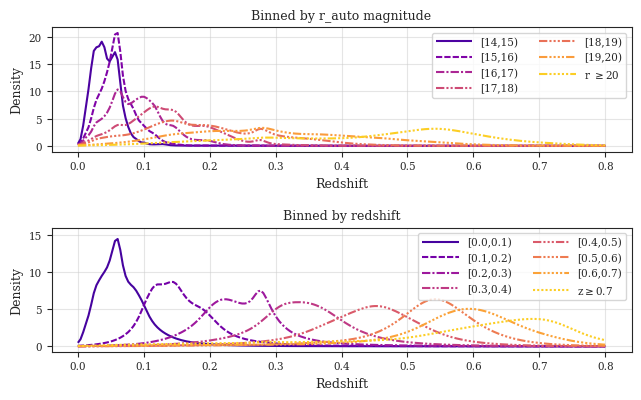

: 

In [71]:
# Average PDFs
average_pdfs = True

if average_pdfs:
    pdfs, _, x = calc_PDF_series(result_df[[col for col in result_df.columns.values if 'pdf_weight' in col]],
                                 result_df[[col for col in result_df.columns.values if 'pdf_means' in col]],
                                 result_df[[col for col in result_df.columns.values if 'pdf_std' in col]],
                                 x_range=torch.linspace(0, 0.8, 200), optimize_zml=True)

    fig = plt.figure(figsize=set_size(width=width, subplots=(2, 2), fraction=1))
    gs  = gridspec.GridSpec(2, 1, figure=fig, wspace=0.05, hspace=0.1)

    ax_pdf_mag = fig.add_subplot(gs[0, 0])
    ax_pdf_z   = fig.add_subplot(gs[1, 0])

    mag_bins   = np.arange(14, 21, 1)
    zspec_bins = np.arange(0, 0.8, 0.1)
    bins = 41
    dashes = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]

    colors = plt.cm.plasma(np.linspace(0, 0.9, len(mag_bins)+1))
    colors[0] = (0,0,0,1)
    for j, bin in enumerate(mag_bins):
        if bin != 20:
            label = f'[{bin},{bin+np.diff(mag_bins)[0]})'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+np.diff(mag_bins)[0], inclusive='left'))
        else:
            label = f'r $\geq${bin}'
            cond  = (result_df[f'r_{aperture}'].between(bin, bin+np.diff(mag_bins)[0], inclusive='left'))
        ax_pdf_mag.plot(x, pdfs[cond].mean(axis=0), color=colors[j+1], dashes=dashes[j], label=label)

    colors = plt.cm.plasma(np.linspace(0, 0.9, len(zspec_bins)+1))
    colors[0] = (0,0,0,1)
    for j, bin in enumerate(zspec_bins):
        if bin != zspec_bins[-1]:
            label = f'[{bin:.1f},{bin+np.diff(zspec_bins)[0]:.1f})'
            cond  = (result_df['z'].between(bin, bin+np.diff(zspec_bins)[0], inclusive='left'))
        else:
            label = f'z$\geq${bin:.1f}'
            cond  = (result_df['z'].between(bin, bin+np.diff(zspec_bins)[0], inclusive='left'))
        ax_pdf_z.plot(x, pdfs[cond].mean(axis=0), color=colors[j+1], dashes=dashes[j], label=label)

    for ax in [ax_pdf_mag, ax_pdf_z]:
        ax.set_xlabel('Redshift')
        ax.set_ylabel('Density')
        ax.legend(ncols=2, handlelength=3.5)

    ax_pdf_mag.set_title('Binned by r_auto magnitude')
    ax_pdf_z.set_title('Binned by redshift')

    ax_pdf_z.set_ylim(top=16)

    plt.savefig(f'images/results_pdf_average.{saveformat}', dpi=288, bbox_inches='tight')
    plt.show()

### 2.4.2 2D Results

In [72]:
bins_mag = np.linspace(14, 21, 25, endpoint=True)
bins_z   = np.linspace(0, 0.6, 25, endpoint=True)

mag_grid = np.diff(bins_mag)[0]
z_grid   = np.diff(bins_z)[0]

import matplotlib.colors as Mplcolours

def calculate_metrics_2d(dataset, metric='nmad', reference_mag='r_PStotal'):
    # For metrics in center plot
    metrics_2D    = {}
    
    for bin_r in bins_mag[:-1]:
        metrics_2D[bin_r] = {}

        for bin_z in bins_z[:-1]:
            metrics_2D[bin_r][bin_z] = []

            cond_R = dataset[f'{reference_mag}'].between(bin_r, bin_r+mag_grid)
            cond_Z = dataset['z']               .between(bin_z, bin_z+z_grid)

            delta     = dataset[cond_R & cond_Z]['zml'] - dataset[cond_R & cond_Z]['z']
            specz_bin = dataset[cond_R & cond_Z]['z']

            if len(delta) >= 5:
                if metric == 'nmad': metrics_2D[bin_r][bin_z].append( 1.48 * np.median(abs(delta - np.median(delta)) / (1+specz_bin)) )
                if metric == 'bias': metrics_2D[bin_r][bin_z].append( np.median(delta) )
                if metric == 'outf': metrics_2D[bin_r][bin_z].append( 100*(np.count_nonzero( abs(delta) / (1+specz_bin) > 0.15 ) / len(dataset)) )
                if metric == 'odds': metrics_2D[bin_r][bin_z].append( np.mean(dataset[cond_R & cond_Z]['odds']) )
                if metric == 'sig68': metrics_2D[bin_r][bin_z].append( np.mean((dataset[cond_R & cond_Z]['zml_68_upper'] - dataset[cond_R & cond_Z]['zml_68_lower'])/2) )
                if metric == 'pdf_peak_height': metrics_2D[bin_r][bin_z].append( np.mean(dataset[cond_R & cond_Z]['pdf_peak_height']) )
            elif len(delta) > 0 and len(delta) < 5:
                metrics_2D[bin_r][bin_z].append( -999 )
            else:
                metrics_2D[bin_r][bin_z].append( np.nan )
                
            if metric == 'number': 
                if len(delta) >= 1: 
                    metrics_2D[bin_r][bin_z].append( len(delta) )
                else:
                    metrics_2D[bin_r][bin_z].append( np.nan )
                    
    # Transform metrics_2D into a matrix
    concat_lists = []
    for bin_r in bins_mag[:-1]:
        concat_lists.append(np.concatenate(list(metrics_2D[bin_r].values())))

    result_matrix = np.vstack(concat_lists)

    return result_matrix

def calculate_metrics(dataframe, reference_mag, magnitude_bins=None, redshift_bins=None, cumulative=False):
    spec_z      = dataframe['z'].reset_index(drop=True)
    photo_z     = dataframe['zml'].reset_index(drop=True)
    magnitude_r = dataframe[reference_mag].reset_index(drop=True)

    if magnitude_bins is None:
        magnitude_bins = bins_mag

    if redshift_bins is None:
        redshift_bins = bins_z
        
    magnitude_grid = np.diff(magnitude_bins)[0]
    redshift_grid = np.diff(redshift_bins)[0]

    results = {}
    for metric in ['nmad', 'bias', 'bias_norm', 'outf', 'odds', 'sig68', 'numb', 'pdf_peak_height']:
        results[metric, 'r'] = []
        results[metric, 'z'] = []

    for bin_val in redshift_bins[:-1]:
        if cumulative == False:
            cond_z = spec_z.between(bin_val, bin_val+redshift_grid, inclusive='right')
            spec_z_bin  = spec_z[cond_z]
            photo_z_bin = photo_z[cond_z]

        if cumulative == True:
            if bin_val == redshift_bins[0]: pass
            cond_z = spec_z.between(redshift_bins[0], bin_val, inclusive='right')
            spec_z_bin  = spec_z[cond_z]
            photo_z_bin = photo_z[cond_z]

        delta = photo_z_bin - spec_z_bin
        results['nmad', 'z'].append( 1.48 * np.median(abs(delta - np.median(delta)) / (1+spec_z_bin)) )
        results['bias', 'z'].append( np.median(delta) )
        results['bias_norm', 'z'].append( np.median(delta / (1+spec_z_bin)) )
        if len(spec_z_bin) != 0: results['outf', 'z'].append( 100*np.count_nonzero( abs(delta) / (1 + spec_z_bin) > 0.15 ) / len(spec_z) )
        if len(spec_z_bin) == 0: results['outf', 'z'].append( np.nan )
        results['odds', 'z'].append( np.mean(dataframe[cond_z]['odds']) )
        results['sig68', 'z'].append( np.mean((dataframe[cond_z]['zml_68_upper'] - dataframe[cond_z]['zml_68_lower'])/2) )
        results['pdf_peak_height', 'z'].append( np.mean(dataframe[cond_z]['pdf_peak_height']) )
        results['numb', 'z'].append( len(delta) )

    for bin_val in magnitude_bins[:-1]:
        if cumulative == False:
            cond_r = magnitude_r.between(bin_val, bin_val+magnitude_grid, inclusive='right')
            spec_z_bin  = spec_z[cond_r]
            photo_z_bin = photo_z[cond_r]

        if cumulative == True:
            if bin_val == magnitude_bins[0]: pass
            cond_r = magnitude_r.between(magnitude_bins[0], bin_val, inclusive='right')
            spec_z_bin  = spec_z[cond_r]
            photo_z_bin = photo_z[cond_r]

        delta = photo_z_bin - spec_z_bin
        results['nmad', 'r'].append( 1.48 * np.median(abs(delta - np.median(delta)) / (1+spec_z_bin)) )
        results['bias', 'r'].append( np.median(delta) )
        results['bias_norm', 'r'].append( np.median(delta / (1+spec_z_bin)) )
        if len(spec_z_bin) != 0: results['outf', 'r'].append( 100*np.count_nonzero( abs(delta) / (1 + spec_z_bin) > 0.15 ) / len(spec_z) )
        if len(spec_z_bin) == 0: results['outf', 'r'].append( np.nan )
        results['odds', 'r'].append( np.mean(dataframe[cond_r]['odds']) )
        results['sig68', 'r'].append( np.mean((dataframe[cond_r]['zml_68_upper'] - dataframe[cond_r]['zml_68_lower'])/2) )
        results['pdf_peak_height', 'r'].append( np.mean(dataframe[cond_r]['pdf_peak_height']) )
        results['numb', 'r'].append( len(delta) )

    return results


: 

In [73]:
metrics_1d = calculate_metrics(result_df, f'r_{aperture}', magnitude_bins=bins_mag, redshift_bins=bins_z)

# 2D metrics
metrics_2d = {}
metrics_2d_masked = {}

for metric in ['nmad', 'bias', 'outf', 'odds', 'sig68', 'pdf_peak_height']:
    metrics_2d[metric] = calculate_metrics_2d(result_df, metric=metric, reference_mag=f'r_{aperture}')
    metrics_2d_masked[metric] = np.ma.masked_where(metrics_2d[metric] == -99, metrics_2d[metric])

cmap = plt.cm.viridis
cmap.set_bad(color='white')
cmap.set_under(color='grey')

bounds = {'nmad': np.arange(0, 0.11, 0.01),
          'outf': np.arange(0, np.round(np.nanmax(metrics_2d['outf']), 2), 0.002),
          'odds': np.arange(0.1, 1.05, 0.05),
          'sig68': np.arange(0, (5 * round(np.nanmax(metrics_2d['sig68'])*100/5))/100, 0.01),
          'pdf_peak_height': np.arange(0, np.ceil(np.nanmax(metrics_2d['pdf_peak_height'])), 1)}

norms = {'nmad': Mplcolours.BoundaryNorm(bounds['nmad'], cmap.N),
         'outf': Mplcolours.BoundaryNorm(bounds['outf'], cmap.N),
         'odds': Mplcolours.BoundaryNorm(bounds['odds'], cmap.N),
         'sig68': Mplcolours.BoundaryNorm(bounds['sig68'], cmap.N),
         'pdf_peak_height': Mplcolours.BoundaryNorm(bounds['pdf_peak_height'], cmap.N),
         'bias': Mplcolours.TwoSlopeNorm(vmin=-0.126, vcenter=0., vmax=0.126)
         }

: 

G:\Temp\ipykernel_2752\1176457285.py:104: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'images/results_spe_metrics_2d.{saveformat}', bbox_inches='tight')
G:\Temp\ipykernel_2752\1176457285.py:104: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig(f'images/results_spe_metrics_2d.{saveformat}', bbox_inches='tight')
e:\Programas\Miniconda\envs\PyTorch\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


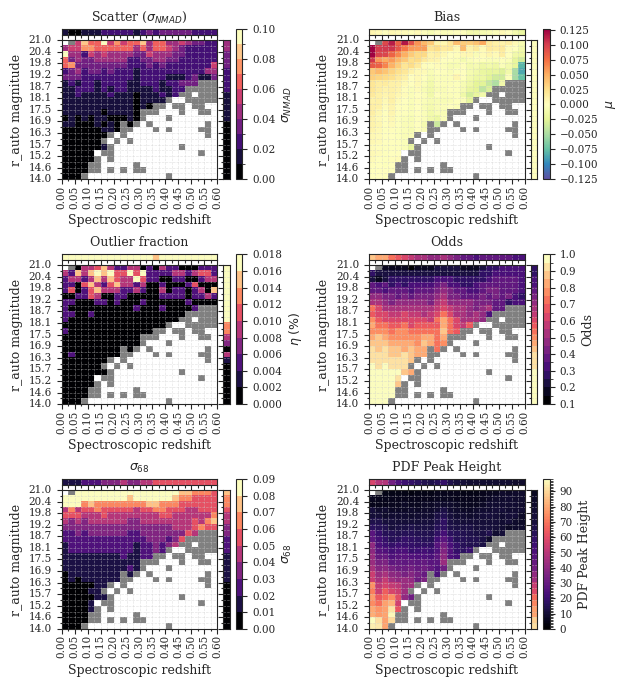

: 

In [74]:
import matplotlib.gridspec as gridspec

n_rows, n_cols = 3, 2
fig = plt.figure(figsize=set_size(width=width, subplots=(4, n_cols), fraction=1))
outer_gridspec = gridspec.GridSpec(n_rows, n_cols, wspace=0.7, hspace=0.5)

for i, metric in enumerate(['nmad', 'bias', 'outf', 'odds', 'sig68', 'pdf_peak_height']):
    inner_gridspec = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=outer_gridspec[i],
                                                     height_ratios=[.04, .96], width_ratios=[.92, .04, .04],
                                                     wspace=0.1, hspace=0.07)

    cmap = 'Spectral_r' if metric=='bias' else 'magma'

    cmap = plt.cm.Spectral_r if metric == 'bias' else plt.cm.magma
    cmap.set_bad(color='white')
    cmap.set_under(color='grey')

    top_ax = plt.Subplot(fig, inner_gridspec[0, 0])
    fig.add_subplot(top_ax)
    top_ax.imshow(np.reshape(metrics_1d[metric, 'z'], (1, len(metrics_1d[metric, 'z']))), extent=[np.min(bins_z), np.max(bins_z), 0, 1], 
                  origin='lower', aspect="auto", norm=norms[metric], cmap=cmap)
    top_ax.set_xticks(np.arange(np.min(bins_z), np.max(bins_z)+z_grid, z_grid))
    top_ax.set_xticklabels([])
    top_ax.set_yticks([])

    lone_ax = plt.Subplot(fig, inner_gridspec[0, 1])
    lone_ax.axis(False)

    center_ax = plt.Subplot(fig, inner_gridspec[1, 0])
    fig.add_subplot(center_ax)
    center_plot = center_ax.imshow(metrics_2d[metric], origin='lower', extent=[np.min(bins_z), np.max(bins_z), np.min(bins_mag), np.max(bins_mag)], 
                                   aspect="auto", norm=norms[metric], cmap=cmap)
    center_ax.set_xticks(np.arange(np.min(bins_z), np.max(bins_z)+z_grid, z_grid))
    center_ax.set_yticks(np.arange(np.min(bins_mag), np.max(bins_mag), mag_grid))
    center_ax.set_xlabel('Spectroscopic redshift')
    center_ax.set_ylabel(f"r_{aperture.replace('_corrected', '')} magnitude")

    right_ax = plt.Subplot(fig, inner_gridspec[1, 1])
    fig.add_subplot(right_ax)
    right_ax.imshow(np.reshape(metrics_1d[metric, 'r'], (len(metrics_1d[metric, 'r']), 1)), extent=[0, 1, np.min(bins_mag), np.max(bins_mag)], 
                    origin='lower', aspect="auto", norm=norms[metric], cmap=cmap)
    right_ax.set_yticks(np.arange(np.min(bins_mag), np.max(bins_mag), mag_grid))
    right_ax.set_yticklabels([])
    right_ax.set_xticks([])

    cbar_ax = plt.Subplot(fig, inner_gridspec[0:2, 2])
    fig.add_subplot(cbar_ax)
    cbar = plt.colorbar(center_plot, cax=cbar_ax)

    if metric == 'nmad':
        cbar_label = r'$\sigma_{NMAD}$'
        title_label = r'Scatter ($\sigma_{NMAD}$)'
    if metric == 'bias':
        cbar_label = r'$\mu$'
        title_label = 'Bias'
    if metric == 'outf':
        cbar_label = r'$\eta~(\%)$'
        title_label = 'Outlier fraction'
    if metric == 'odds':
        cbar_label = r'Odds'
        title_label = cbar_label
    if metric == 'sig68':
        cbar_label = r'$\sigma_{68}$'
        title_label = cbar_label
    if metric == 'pdf_peak_height':
        cbar_label = r'PDF Peak Height'
        title_label = cbar_label

    cbar.set_label(cbar_label)
    top_ax.set_title(title_label)

    for ax in [top_ax, center_ax, right_ax]:
        ax.grid(linestyle='--', alpha=0.5, lw=0.5)
        
    for ax in [top_ax, center_ax]:
        ax.set_xlim(0, 0.6) 
    
    for ax in [center_ax, right_ax]:
        ax.set_ylim(14, 21)

    center_ax.set_yticks(np.arange(np.min(bins_mag), np.max(bins_mag), mag_grid))
    center_ax.set_yticklabels([f'{s:.1f}' if i%2==0 else '' for i, s in enumerate(center_ax.get_yticks())], va='center')

    center_ax.set_xticks(np.arange(np.min(bins_z), np.max(bins_z)+0.001, z_grid))
    center_ax.set_xticklabels([f'{s:.2f}' if i%2==0 else '' for i, s in enumerate(center_ax.get_xticks())], 
                              rotation=90, ha='center', va='top')

    if metric == 'bias':
        cbar.set_ticks(np.arange(-0.125, 0.1251, 0.025))

    #https://stackoverflow.com/questions/58349845/change-length-of-one-or-however-many-ticks
    for tick_id in np.arange(0, len(center_ax.yaxis.get_major_ticks())-1, 2):
        center_ax.yaxis.get_major_ticks()[tick_id+1].tick1line.set_markersize(1.75)
        right_ax.yaxis.get_major_ticks()[tick_id+1].tick1line.set_markersize(1.75)

    for tick_id in np.arange(0, len(center_ax.xaxis.get_major_ticks())-1, 2):
        center_ax.xaxis.get_major_ticks()[tick_id+1].tick1line.set_markersize(1.75)
        top_ax.xaxis.get_major_ticks()[tick_id+1].tick1line.set_markersize(2)

    # Change padding of xticks
    for tick_id in np.arange(0, len(right_ax.yaxis.get_major_ticks()), 2):
        center_ax.xaxis.get_major_ticks()[tick_id].set_pad(1)

plt.savefig(f'images/results_spe_metrics_2d.{saveformat}', bbox_inches='tight')
plt.show()

### 2.4.3 Summary plot

In [52]:
def plot_summary(metrics_1d_boot, result_df, ref_mag='r_auto', figsize=(18, 9), dpi=288, saveformat='png'):
    fig = plt.figure(figsize=figsize, dpi=dpi, layout='tight')
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    bbox = dict(facecolor='white', edgecolor='grey', lw=0.5, boxstyle='round,pad=0.2')

    details_colour = 'black'

    gs = gridspec.GridSpec(2, 4, figure=fig)

    ##########################################
    # NMAD Mag
    ##########################################
    ax1 = fig.add_subplot(gs[0, 0])

    ax1.plot(bins_mag[:-1]+(mag_grid/2), np.nanmedian([metrics_1d_boot[i]['nmad']['r'] for i in range(n_boot)], axis=0), color='C0', lw=1)
    ax1.fill_between(bins_mag[:-1]+(mag_grid/2), 
                     y1=np.nanpercentile([metrics_1d_boot[i]['nmad']['r'] for i in range(n_boot)], 16, axis=0), 
                     y2=np.nanpercentile([metrics_1d_boot[i]['nmad']['r'] for i in range(n_boot)], 84, axis=0), 
                     color='C0', alpha=0.15)

    ax1.set_ylabel(r'$\sigma_{NMAD}$')
    ax1.set_xlabel('r_auto magnitude')
    ax1.set_xticks(np.arange(bins_mag[0], bins_mag[-1]+1, 1))
    ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

    ##########################################
    # BIAS Mag
    ##########################################
    ax2 = fig.add_subplot(gs[0, 1])

    for bias in ['bias']:#, 'bias_norm']:
        linestyle = '-' if bias == 'bias' else '--'
        ax2.plot(bins_mag[:-1]+(mag_grid/2), 
                 np.nanmedian([metrics_1d_boot[i][bias]['r'] for i in range(n_boot)], axis=0), linestyle, color='C0', lw=1)
        ax2.fill_between(bins_mag[:-1]+(mag_grid/2), 
                        y1=np.nanpercentile([metrics_1d_boot[i][bias]['r'] for i in range(n_boot)], 16, axis=0), 
                        y2=np.nanpercentile([metrics_1d_boot[i][bias]['r'] for i in range(n_boot)], 84, axis=0), 
                        color='C0', alpha=0.15)

    ax2.set_ylabel(r'$\delta z$')
    ax2.set_xlabel('r_auto magnitude')
    ax2.set_xticks(np.arange(bins_mag[0], bins_mag[-1]+1, 1))
    ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    ax2.axhline(0, color=details_colour, zorder=-1, linestyle='--', lw=1)
    ax2.set_ylim(-0.003, 0.003)
    #ax2.legend(loc='lower center')

    ##########################################
    # Plot the odds
    ##########################################
    ax3 = fig.add_subplot(gs[0, 2])

    viridis = plt.get_cmap('viridis', 40)
    N, bins, patches = ax3.hist(result_df['odds'], density=True, range=(0,1), bins=31, histtype='step')
    ax3.set_ylim(0, np.max(N)+1)

    ax3.set_xlim(-0.02, 1.02)
    ax3.set_ylabel('Relative frequency')
    ax3.set_xlabel('Odds')
    #ax3.legend(loc='lower center')

    ##########################################
    # PIT
    ##########################################
    ax4 = fig.add_subplot(gs[0, 3])

    n_bins = 31
    n_uniform = np.ones(n_bins)
    N, _ = np.histogram(result_df[f"pit"], density=True, range=(0,1), bins=n_bins)
    kl_final = np.sum(kl_div(n_uniform, N))
    ax4.hist(result_df['pit'], density=True, range=(0,1), bins=n_bins, histtype='step', label='PIT') #f"KL: {kl_final:.4f}"

    ax4.set_xlim(-0.02, 1.02)
    ax4.set_ylabel('Relative frequency')
    ax4.set_xlabel('PIT')

    # To show a comparison with an uniform distribution:
    ax4.plot([0, 0], [0, 1], '--', color=details_colour, lw=1, label='Uniform')
    ax4.plot([0, 1], [1, 1], '--', color=details_colour, lw=1)
    ax4.plot([1, 1], [0, 1], '--', color=details_colour, lw=1)

    ax4.legend(loc='lower center')

    ##########################################
    # nmad Z
    ##########################################
    ax5 = fig.add_subplot(gs[1, 0])

    ax5.plot(bins_z[:-1]+(z_grid/2), 
             np.nanmedian([metrics_1d_boot[i]['nmad']['z'] for i in range(n_boot)], axis=0), color='C0', lw=1)
    ax5.fill_between(bins_z[:-1]+(z_grid/2), 
                     y1=np.nanpercentile([metrics_1d_boot[i]['nmad']['z'] for i in range(n_boot)], 16, axis=0), 
                     y2=np.nanpercentile([metrics_1d_boot[i]['nmad']['z'] for i in range(n_boot)], 84, axis=0), 
                     color='C0', alpha=0.15)

    ax5.set_ylabel(r'$\sigma_{NMAD}$')
    ax5.set_xlabel('Spectroscopic redshift')
    ax5.set_xticks(np.arange(bins_z[0], bins_z[-1]+0.1, 0.1))
    ax5.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

    ##########################################
    # BIAS Z
    ##########################################
    ax6 = fig.add_subplot(gs[1, 1])

    for bias in ['bias']:# 'bias_norm']:
        linestyle = '-' if bias == 'bias' else '--'
        ax6.plot(bins_z[:-1]+(z_grid/2), 
                 np.nanmedian([metrics_1d_boot[i][bias]['z'] for i in range(n_boot)], axis=0), linestyle, color='C0', lw=1)
        ax6.fill_between(bins_z[:-1]+(z_grid/2), 
                        y1=np.nanpercentile([metrics_1d_boot[i][bias]['z'] for i in range(n_boot)], 16, axis=0), 
                        y2=np.nanpercentile([metrics_1d_boot[i][bias]['z'] for i in range(n_boot)], 84, axis=0), 
                        color='C0', alpha=0.15)

    ax6.set_ylabel(r'$\delta z$')
    ax6.set_xlabel('Spectroscopic redshift')
    ax6.set_xticks(np.arange(bins_z[0], bins_z[-1]+0.1, 0.1))
    ax6.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    ax6.axhline(0, color=details_colour, zorder=-1, linestyle='--', lw=1)

    ##########################################
    # HPDCI
    ##########################################
    ax7 = fig.add_subplot(gs[1, 2:4])

    dashes = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]

    c, f = ecdf(result_df['hpdci'].values)
    ax7.plot(c, f, label='HPDCI', dashes=dashes[0], lw=1)

    ax7.plot([0,1], [0,1], '--', color=details_colour, lw=1, zorder=-1, label='Ideal')
    ax7.set_ylabel(r'$\hat{F}(c)$')
    ax7.set_xlabel('c')
    ax7.set_xlim(-0.02, 1.02)
    ax7.legend(loc='lower right')

    ax7.text(0.5, 0.94, 'Underconfidence', transform=ax7.transAxes, ha='center', va='center', size=7)
    ax7.text(0.5, 0.05, 'Overconfidence',  transform=ax7.transAxes, ha='center', va='center', size=7)

    # Inset ax
    axins = ax7.inset_axes([0.02, 0.5, 0.3, 0.47])
    c, f = ecdf(result_df['hpdci'].values)
    axins.plot(c, f, label='HPDCI', dashes=dashes[0], lw=1)
    axins.plot([0,1], [0,1], '--', color=details_colour, lw=1, zorder=-1)

    # sub region of the original image
    x1, x2, y1, y2 = 0.4, 0.6, 0.4, 0.6
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.set_xticklabels('')
    axins.set_yticklabels('')
    axins.tick_params(axis="y",direction="in", pad=-22)
    axins.tick_params(axis="x",direction="in", pad=-15)

    ax7.indicate_inset_zoom(axins, edgecolor=details_colour, lw=1)

    plt.figtext(0.3, 0.93, 'SPE metrics', ha='center', va='center')
    plt.figtext(0.72, 0.93, 'PDF metrics', ha='center', va='center')

    # Texts
    ax1.text(0.05, 0.88, 'a)', transform=ax1.transAxes, bbox=bbox)
    ax2.text(0.05, 0.88, 'b)', transform=ax2.transAxes, bbox=bbox)
    ax3.text(0.05, 0.88, 'c)', transform=ax3.transAxes, bbox=bbox)
    ax4.text(0.50, 0.88, 'd)', transform=ax4.transAxes, bbox=bbox, ha='center')
    ax5.text(0.05, 0.88, 'e)', transform=ax5.transAxes, bbox=bbox)
    ax6.text(0.05, 0.05, 'f)', transform=ax6.transAxes, bbox=bbox)
    ax7.text(0.92, 0.50, 'g)', transform=ax7.transAxes, bbox=bbox)
    
    for i, ax in enumerate(fig.axes):
        ax.grid(True)

    return fig

: 

In [53]:
summary_fig = plot_summary(metrics_1d_boot, result_df, ref_mag=f'r_{aperture}', 
                           figsize=set_size(width=513.11743, subplots=(3, 4), fraction=11),
                           dpi=144)

summary_fig.savefig(f'images/photoz_summary.pdf', bbox_inches='tight')

: 

### 2.4.4 Optuna

In [4]:
import ast

: 

In [5]:
# Load Optuna results
apertures = ['res', 'PStotal', 'aper_3', 'aper_6', 'auto', 'petro', 'iso']

optuna_dfs   = {}
optuna_tvar  = {}
model_params = {}

for aperture in apertures:
    optuna_dfs[aperture] = pd.read_csv(f'_data/optuna_multi/{aperture}/study.csv')
    optuna_dfs[aperture] = optuna_dfs[aperture][optuna_dfs[aperture]['value'] <= -1]

    optuna_tvar[aperture] = np.array(ast.literal_eval(optuna_dfs[aperture]['user_attrs_train_var'][0]))

: 

In [6]:
# metrics = ['value', 'user_attrs_attention_weights_dict',
#            'user_attrs_bias_bright_(15-18)', 'user_attrs_bias_faint_(19-22)',
#            'user_attrs_bias_faint_low_z', 'user_attrs_sigma_nmad', 'user_attrs_train_var']

metrics = ['value', 'user_attrs_attention_weights_dict',
           'user_attrs_bias_all', 'user_attrs_bias_all_norm', 'user_attrs_sigma_nmad']

optuna_metrics = {}

for aperture in apertures:
    optuna_metrics[aperture] = {}

    for metric in metrics:
        if metric != 'user_attrs_attention_weights_dict':
            optuna_metrics[aperture][metric] = optuna_dfs[aperture][metric].values

        else:
            pass
            # attention_strings = [s[6:-1] for s in optuna_dfs[aperture]['user_attrs_attention_weights_dict']]
            # attention_lists   = np.array([eval(s) for s in attention_strings])
            # optuna_metrics[aperture][metric] = attention_lists

: 

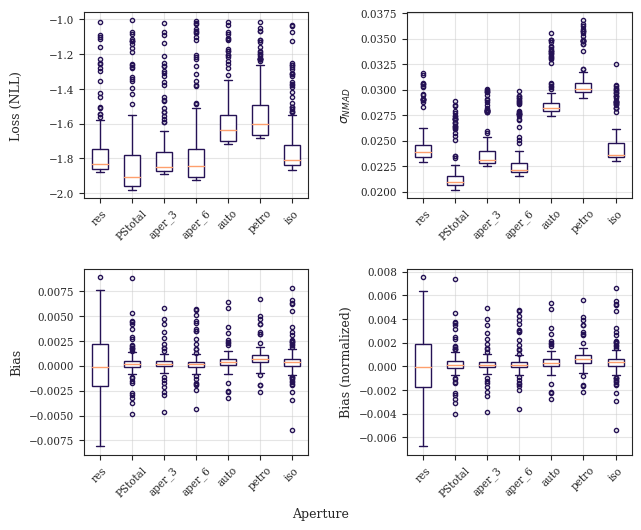

: 

In [53]:
fig  = plt.figure(figsize=set_size(width=width, subplots=(2, 1.5)))
gs   = gridspec.GridSpec(2, 2, figure=fig, wspace=0.1, hspace=0.1)
axes = [fig.add_subplot(gs[i]) for i in range(4)]

axes[0].boxplot([optuna_metrics[aperture]['value'] for aperture in apertures], 0, '.', 
                patch_artist=True, boxprops=dict(color=colors[0], facecolor='white'), 
                whiskerprops=dict(color=colors[0]), 
                capprops=dict(color=colors[0]), 
                medianprops=dict(color=colors[4]),
                flierprops=dict(markeredgecolor=colors[0]))
axes[0].set_ylabel('Loss (NLL)')

axes[1].boxplot([optuna_metrics[aperture]['user_attrs_sigma_nmad'] for aperture in apertures], 0, '.', 
                patch_artist=True, boxprops=dict(color=colors[0], facecolor='white'), 
                whiskerprops=dict(color=colors[0]), 
                capprops=dict(color=colors[0]), 
                medianprops=dict(color=colors[4]),
                flierprops=dict(markeredgecolor=colors[0]))
axes[1].set_ylabel(r'$\sigma_{NMAD}$')

axes[2].boxplot([optuna_metrics[aperture]['user_attrs_bias_all'] for aperture in apertures], 0, '.', 
                patch_artist=True, boxprops=dict(color=colors[0], facecolor='white'), 
                whiskerprops=dict(color=colors[0]), 
                capprops=dict(color=colors[0]), 
                medianprops=dict(color=colors[4]),
                flierprops=dict(markeredgecolor=colors[0]))
axes[2].set_ylabel('Bias')

axes[3].boxplot([optuna_metrics[aperture]['user_attrs_bias_all_norm'] for aperture in apertures], 0, '.', 
                patch_artist=True, boxprops=dict(color=colors[0], facecolor='white'), 
                whiskerprops=dict(color=colors[0]), 
                capprops=dict(color=colors[0]), 
                medianprops=dict(color=colors[4]),
                flierprops=dict(markeredgecolor=colors[0]))
axes[3].set_ylabel('Bias (normalized)')

for i in range(4):
    for aperture in apertures:
        axes[i].set_xticks(range(1, len(apertures) + 1), apertures, rotation=45)

fig.supxlabel('Aperture')
fig.align_ylabels()

plt.savefig(f'images/optuna_metrics_boxplots.{saveformat}', bbox_inches='tight')
plt.show()

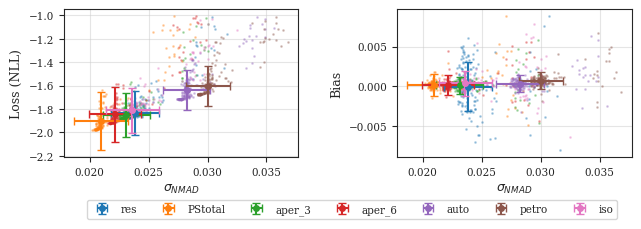

: 

In [17]:
# Scatter vs bias
# fig, axes = plt.subplots(1, 2, figsize=set_size(width=width, subplots=(1, 2)))
# plt.subplots_adjust(wspace=0.4, hspace=0.3)

fig = plt.figure(figsize=set_size(width=width, subplots=(1, 2)))
gs  = gridspec.GridSpec(1, 2, figure=fig, wspace=0.1, hspace=0.1)
axes = [fig.add_subplot(gs[i]) for i in range(2)]

colours = plt.cm.plasma(np.linspace(0, 0.8, len(apertures)))

for i, aperture in enumerate(apertures):

    # axes[0,0].errorbar(np.median(optuna_metrics[aperture]['user_attrs_sigma_nmad']),
    #             np.median(optuna_metrics[aperture]['user_attrs_bias_bright_(15-18)']),
    #             xerr=np.std(optuna_metrics[aperture]['user_attrs_sigma_nmad']),
    #             yerr=np.std(optuna_metrics[aperture]['user_attrs_bias_bright_(15-18)']), 
    #             fmt='o', capsize=3, markersize=2**2, label=aperture)
    # axes[0,0].axhline(0, color='black', lw=0.5, linestyle='--', zorder=-99, alpha=1)
    
    # axes[0,1].errorbar(np.median(optuna_metrics[aperture]['user_attrs_sigma_nmad']),
    #             np.median(optuna_metrics[aperture]['user_attrs_bias_faint_(19-22)']),
    #             xerr=np.std(optuna_metrics[aperture]['user_attrs_sigma_nmad']),
    #             yerr=np.std(optuna_metrics[aperture]['user_attrs_bias_faint_(19-22)']), 
    #             fmt='o', capsize=3, markersize=2**2)
    # axes[0,1].axhline(0, color='black', lw=0.5, linestyle='--', zorder=-99, alpha=1)

    axes[1].errorbar(np.median(optuna_metrics[aperture]['user_attrs_sigma_nmad']),
                np.median(optuna_metrics[aperture]['user_attrs_bias_all']),
                xerr=np.std(optuna_metrics[aperture]['user_attrs_sigma_nmad']),
                yerr=np.std(optuna_metrics[aperture]['user_attrs_bias_all']), 
                fmt='o', capsize=3, markersize=2**2, label=aperture)
    
    axes[0].errorbar(np.median(optuna_metrics[aperture]['user_attrs_sigma_nmad']),
                np.median(optuna_metrics[aperture]['value']),
                xerr=np.std(optuna_metrics[aperture]['user_attrs_sigma_nmad']),
                yerr=np.std(optuna_metrics[aperture]['value']), 
                fmt='o', capsize=3, markersize=2**2)#, label=aperture)
    
    # axes[0,0].scatter(optuna_metrics[aperture]['user_attrs_sigma_nmad'],
    #             optuna_metrics[aperture]['user_attrs_bias_bright_(15-18)'],
    #             s=1, alpha=0.15)
    
    # axes[0,1].scatter(optuna_metrics[aperture]['user_attrs_sigma_nmad'],
    #             optuna_metrics[aperture]['user_attrs_bias_faint_(19-22)'],
    #             s=1, alpha=0.15)
    
    axes[1].scatter(optuna_metrics[aperture]['user_attrs_sigma_nmad'],
                optuna_metrics[aperture]['user_attrs_bias_all'],
                s=1, alpha=0.3)
    
    axes[0].scatter(optuna_metrics[aperture]['user_attrs_sigma_nmad'],
                optuna_metrics[aperture]['value'],
                s=1, alpha=0.3)
    
# axes[0,0].set_xlabel(r'$\sigma_{NMAD}$')
# axes[0,0].set_ylabel(r'Bias bright $(15 < r \leq 18)$')

# axes[0,1].set_xlabel(r'$\sigma_{NMAD}$')
# axes[0,1].set_ylabel(r'Bias faint $(19 < r \leq 22)$')

axes[1].set_xlabel(r'$\sigma_{NMAD}$')
axes[1].set_ylabel('Bias')

axes[0].set_xlabel(r'$\sigma_{NMAD}$')
axes[0].set_ylabel('Loss (NLL)')

#fig.text(0.5, 0.925, f"Plot based on 200 models trained on random samples limited by r_auto <= 21", 
#         ha='center', va='center', size=9)

fig.legend(bbox_to_anchor=(0.55, -0.05), loc='center', ncols=7)
fig.align_labels()

plt.savefig(f'images/optuna_metrics_scatter.{saveformat}', bbox_inches='tight')
plt.show()

In [13]:
optuna_pstotal = pd.read_csv('_data/optuna_multi/PStotal/study.csv')

optuna_pstotal['selected'] = False

optuna_pstotal.loc[optuna_pstotal['number'].isin([4,5,8,11,23,26,28,29,31,32,41,43,44,48,49,55,56,95,100,104,105,106,107,108,109,116,122,123,125,134,137,138,140,147,148,149]), 'selected'] = True

optuna_pstotal.to_csv('_data/optuna_multi/PStotal/study.csv', index=False)

: 

## 2.5 PDF metrics illustration

In [4]:
import torch

: 

In [5]:
# General function to find the nearest idx of an item in a list
def find_nearest_idx(array, value):
    '''
    Returns the nearest element index of a list relative to a given value

    Keyword arguments:
    array -- Array or list containing all values
    value -- Value to search the closest corresponding element index in array
    '''

    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Step function
def step(x,y):
    '''
    Returns the step (Heaviside) function. Used to calculate the CRPS

    Keyword arguments:
    x -- Range of the function (corresponds to the photometric redshift)
    y -- Value where the 'step' is
    '''

    return 1 * (x > y)

# Calculate HPDCI per object
# https://stackoverflow.com/questions/33345780/empirical-cdf-in-python-similiar-to-matlabs-one
def check_intervals(x):
    '''
    Returns a splitted list if a certain condition is satisfied.
    In this case, the condition is a separation of more than one index.

    Keyword arguments:
    x -- List to be checked and possibly splitted
    '''

    List, last = [[]], None
    for elem in x:
        if last is None or abs(last - elem) <= 1:
            List[-1].append(elem)
        else:
            List.append([elem])
        last = elem
    return List

: 

In [ ]:
weights = torch.Tensor([0.6, 0.5])
means   = torch.Tensor([0.1, 0.2])
stds    = torch.Tensor([0.02, 0.03])

distrib = torch.distributions.MixtureSameFamily(torch.distributions.Categorical(weights),
                                                torch.distributions.Normal(means, stds))

x = torch.linspace(0, 0.5, 1000)
pdf = torch.exp(distrib.log_prob(x))
cdf = distrib.cdf(x)

fake_z = 0.13

: 

In [21]:
# Calculate the 68% credible interval
alpha = 68
q_val = (1-(alpha/100))/2
p68_lower  = x[find_nearest_idx(cdf, q_val)] # 16
p68_higher = x[find_nearest_idx(cdf, 1-q_val)] # 84

print(p68_lower, p68_higher)

tensor(0.0891) tensor(0.2112)


: 

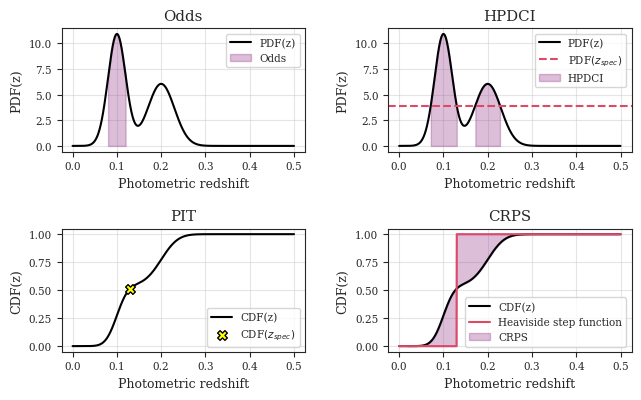

: 

In [26]:
fig = plt.figure(figsize=set_size(width=width, subplots=(1, 1), fraction=1))
gs  = gridspec.GridSpec(2, 2, figure=fig, hspace=0.1, wspace=0.1)

colors = plt.cm.plasma(np.linspace(0,0.8,3))

ax_odds  = fig.add_subplot(gs[0, 0])
ax_hpdci = fig.add_subplot(gs[0, 1])
ax_crps  = fig.add_subplot(gs[1, 0])
ax_pit   = fig.add_subplot(gs[1, 1])

# Odds
odds_interval = pd.Series(x).between(0.1-0.02, 0.1+0.02)
ax_odds.plot(x, pdf, color=colors[0], lw=1.5, label='PDF(z)')
ax_odds.fill_between(x[odds_interval], y1=0, y2=pdf[odds_interval], color=colors[2], alpha=0.3, label='Odds')
ax_odds.set_title('Odds', fontsize='large')

# HPDCI
ax_hpdci.plot(x, pdf, color=colors[0], lw=1.5, label='PDF(z)')
ax_hpdci.axhline(pdf[find_nearest_idx(x, fake_z)], linestyle='--', color=colors[3], lw=1.5, label='PDF$(z_{spec})$')
hpdci_idxs = list(np.where(pdf >= pdf[find_nearest_idx(x, fake_z)])[0])
hpdci_idxs = check_intervals(hpdci_idxs)
for i, interval in enumerate(hpdci_idxs):
    ax_hpdci.fill_between(x[interval], y1=0, y2=pdf[interval], color=colors[2], alpha=0.3, label='HPDCI' if i==0 else None)
ax_hpdci.set_title('HPDCI', fontsize='large')

# PIT
ax_crps.plot(x, cdf, color=colors[0], lw=1.5, label='CDF(z)')
ax_crps.scatter(x[find_nearest_idx(x, fake_z)], cdf[find_nearest_idx(x, fake_z)], marker='X', color='yellow', edgecolor='black', zorder=10, s=7**2, label='CDF$(z_{spec})$')
ax_crps.set_title('PIT', fontsize='large')

# CRPS
ax_pit.plot(x, cdf, color=colors[0], lw=1.5, label='CDF(z)')
ax_pit.plot(x, step(x, fake_z), color=colors[3], lw=1.5, label='Heaviside step function')
crps_interval_l = np.where(cdf >= step(x, fake_z)+1e-5)
crps_interval_r = np.where(step(x, fake_z) >= cdf)
ax_pit.fill_between(x[crps_interval_l], y1=0, y2=cdf[crps_interval_l], color=colors[2], alpha=0.3, label='CRPS')
ax_pit.fill_between(x[crps_interval_r], y1=cdf[crps_interval_r], y2=step(x, fake_z)[crps_interval_r], color=colors[2], alpha=0.3)
ax_pit.set_title('CRPS', fontsize='large')

for ax in [ax_odds, ax_hpdci, ax_crps, ax_pit]:
    ax.set_xlabel('Photometric redshift')
    ax.legend()
    
for ax in [ax_odds, ax_hpdci]:
    ax.set_ylabel('PDF(z)')

for ax in [ax_crps, ax_pit]:
    ax.set_ylabel('CDF(z)')

plt.savefig(f'images/results_pdf_metrics_illust.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

### 2.6 MDN output illustration

In [ ]:
torch.sof

Softmax(dim=tensor([0.6000, 0.3000, 0.2000, 0.1500, 0.3500]))

: 

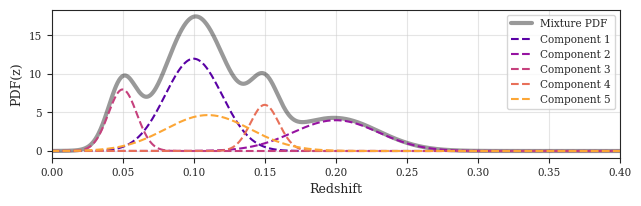

: 

In [30]:
fig = plt.figure(figsize=set_size(width=width, subplots=(1, 2), fraction=1))

colors = plt.cm.plasma(np.linspace(0,0.8,6))
colors[0] = (0,0,0,1)

weights = torch.Tensor([0.6, 0.3, 0.2, 0.15, 0.35])
means   = torch.Tensor([0.1, 0.2, 0.05, 0.15, 0.11])
stds    = torch.Tensor([0.02, 0.03, 0.01, 0.01, 0.03])

distrib = torch.distributions.MixtureSameFamily(torch.distributions.Categorical(weights),
                                                torch.distributions.Normal(means, stds))

x = torch.linspace(0, 0.5, 1000)
pdf = torch.exp(distrib.log_prob(x))
cdf = distrib.cdf(x)

pdf_components = [torch.exp(torch.distributions.Normal(means[i], stds[i]).log_prob(x)) for i in range(5)]

plt.plot(x, pdf*1.7, label='Mixture PDF', alpha=0.4, lw=3, color=colors[0])

for i in range(5):
    plt.plot(x, weights[i]*pdf_components[i]/np.trapz(pdf_components[i], x), '--', label=f'Component {i+1}', color=colors[i+1])

plt.ylabel('PDF(z)')
plt.xlabel('Redshift')
plt.xlim(0, 0.4)
plt.legend()

plt.savefig(f'images/mixture_pdf_5comp.{saveformat}', dpi=288, bbox_inches='tight')

## 2.7 Computational efficiency

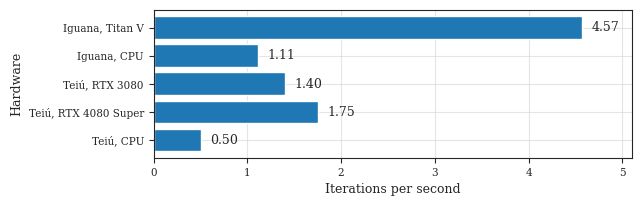

: 

In [17]:
fig, ax = plt.subplots(figsize=set_size(width=width, subplots=(1, 2), fraction=1))

computer_efficiency = {
    'Teiú, CPU': 0.5,
    'Teiú, RTX 4080 Super': 1.75,
    'Teiú, RTX 3080': 1.4,
    'Iguana, CPU': 1.11,
    'Iguana, Titan V': 4.57,
}

plt.barh(list(computer_efficiency.keys()), list(computer_efficiency.values()), color='C0')

for i, (key, value) in enumerate(computer_efficiency.items()):
    ax.text(value+0.1, i, f'{value:.2f}', ha='left', va='center')

plt.xlim(right=5.1)

plt.ylabel('Hardware')
plt.xlabel('Iterations per second')

plt.savefig(f'images/computer_efficiency.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

## 2.8 Evolution of Jeans length

In [4]:
horizon_df = pd.DataFrame({'X': [-0.000919066950051603, 0.05387859863422212, 0.10867841324487942, 0.41920412956909875, 0.8717654466643887],
                           'Y': [0.0857568978374349, 0.17449664429530198, 0.267710663683818, 0.7822520507084266, 1.0149142431021627]}).round(3)

baryonic_jeans_df = pd.DataFrame({'X': [-0.000919066950051603, 0.05387859863422212, 0.10867841324487942, 0.41920412956909875, 0.6420667616536329, 0.6428303823619377, 0.9693269464269216],
                                  'Y': [0.0857568978374349, 0.17449664429530198, 0.267710663683818, 0.7822520507084266, 0.7822520507084266, 0.37211036539895603, 0.13795674869500374]}).round(3)

cdm_jeans_df = pd.DataFrame({'X': [-0.000919066950051603, 0.05387859863422212, 0.1086476105333812, 0.4194064962202208, 0.6969281816872865],
                             'Y': [0.0857568978374349, 0.17449664429530198, 0.2035794183445191, 0.2035794183445191, 0.0037285607755408456]}).round(3)

silk_dampening_df = pd.DataFrame({'X': [0.46109510086455335, 0.6420273628366002],
                                 'Y': [-0.0007457121551082135, 0.7002237136465327]}).round(3)


: 

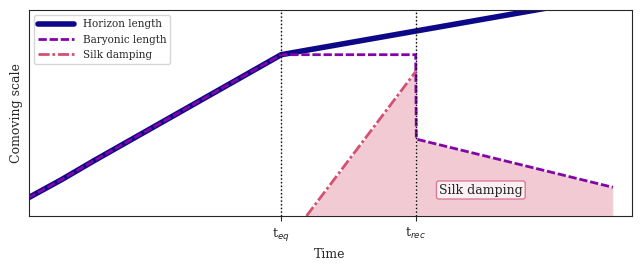

: 

In [15]:
fig, ax = plt.subplots(figsize=set_size(width=width, subplots=(1, 1.5), fraction=1))

colors = plt.cm.plasma(np.linspace(0,0.8,4))
dashes  = [[1,0] ,[3,1,3,1],[4,1,1,1],[4,1,1,1,1,1],[4,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1],[4,1,1,1,1,1,1,1,1,1,1,1],[1,1]]
hatches = [None, '+++', '\\\\\\\\', '---', '////', None, 'OOO', None, 'ooo', None, '|||', None]

ax.plot(horizon_df['X'], horizon_df['Y'], label='Horizon length', color=colors[0], lw=4)
ax.plot(baryonic_jeans_df['X'], baryonic_jeans_df['Y'], dashes=dashes[1], label='Baryonic length', color=colors[1], lw=2)

#ax.axvline(baryonic_jeans_df['X'].values[1], linestyle=':', color='black', lw=1)
#ax.axvline(baryonic_jeans_df['X'].values[2], linestyle=':', color='black', lw=1)
ax.axvline(baryonic_jeans_df['X'].values[3], linestyle=':', color='black', lw=1)
ax.axvline(baryonic_jeans_df['X'].values[4], linestyle=':', color='black', lw=1)

plt.xticks(baryonic_jeans_df['X'].values[3:5], [r't$_{eq}$', r't$_{rec}$'], size='medium')
#plt.xticks(baryonic_jeans_df['X'].values[1:5], [r't$_{NR}$', r't$_{dec}$', r't$_{eq}$', r't$_{rec}$'], size='medium')
plt.yticks([])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel('Time')
ax.set_ylabel('Comoving scale')

ax.plot(silk_dampening_df['X'], silk_dampening_df['Y'], dashes=dashes[2], label='Silk damping', color=colors[2], lw=2)
ax.fill_between(silk_dampening_df['X'], silk_dampening_df['Y'], color=colors[2], alpha=0.3, edgecolor=None)
ax.fill_between(baryonic_jeans_df['X'][4:], baryonic_jeans_df['Y'][4:], color=colors[2], alpha=0.3, edgecolor=None)
# plt.text(0.575, 0.25, 'Silk damping', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=colors[2], lw=1, boxstyle='round,pad=0.2', alpha=0.7), rotation=55)
plt.text(0.75, 0.125, 'Silk damping', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=colors[2], lw=1, boxstyle='round,pad=0.2', alpha=0.7))

# ax.plot(cdm_jeans_df['X'], cdm_jeans_df['Y'], dashes=dashes[3], label='CDM', color=colors[3], lw=2)
# ax.fill_between(cdm_jeans_df['X'], cdm_jeans_df['Y'], color=colors[3], alpha=0.3)
# plt.text(0.265, 0.1, 'Free streaming', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=colors[3], lw=1, boxstyle='round,pad=0.2', alpha=0.7))

plt.legend(loc='upper left', handlelength=3.5)

plt.savefig(f'images/early_universe_timeline_baryons.{saveformat}', dpi=288, bbox_inches='tight')
#plt.savefig(f'images/early_universe_timeline_baryons_withdm.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

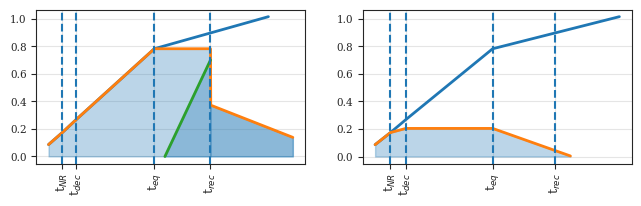

: 

In [ ]:
# #fig, ax = plt.subplots(1, 2, figsize=set_size(width=width, subplots=(1, 2), fraction=1))
# fig = plt.figure(figsize=set_size(width=width, subplots=(1, 2), fraction=1))
# gs  = gridspec.GridSpec(1, 2, figure=fig, wspace=0.1, hspace=0.1)

# ax = [fig.add_subplot(gs[i]) for i in range(2)]

# ax[0].plot(horizon_df['X'], horizon_df['Y'], label='Horizon', lw=2)
# ax[0].plot(baryonic_jeans_df['X'], baryonic_jeans_df['Y'], label='Baryonic Jeans', lw=2)
# #ax[0].plot(cdm_jeans_df['X'], cdm_jeans_df['Y'], label='CDM Jeans', lw=2)
# ax[0].plot(silk_dampening_df['X'], silk_dampening_df['Y'], label='Silk dampening', lw=2)
# ax[0].fill_between(baryonic_jeans_df['X'], baryonic_jeans_df['Y'], color='C0', alpha=0.3)
# ax[0].fill_between(silk_dampening_df['X'], silk_dampening_df['Y'], color='C0', alpha=0.3)
# ax[0].fill_between(baryonic_jeans_df['X'][4:], baryonic_jeans_df['Y'][4:], color='C0', alpha=0.3)
# #ax[0].fill_between(cdm_jeans_df['X'], cdm_jeans_df['Y'], color='C0', alpha=0.3)
# ax[0].axvline(baryonic_jeans_df['X'].values[1], linestyle='--')
# ax[0].axvline(baryonic_jeans_df['X'].values[2], linestyle='--')
# ax[0].axvline(baryonic_jeans_df['X'].values[3], linestyle='--')
# ax[0].axvline(baryonic_jeans_df['X'].values[4], linestyle='--')

# ax[1].plot(horizon_df['X'], horizon_df['Y'], label='Horizon', lw=2)
# #ax[1].plot(baryonic_jeans_df['X'], baryonic_jeans_df['Y'], label='Baryonic Jeans', lw=2)
# ax[1].plot(cdm_jeans_df['X'], cdm_jeans_df['Y'], label='CDM Jeans', lw=2)
# #ax[1].plot(silk_dampening_df['X'], silk_dampening_df['Y'], label='Silk dampening', lw=2)
# #ax[1].fill_between(baryonic_jeans_df['X'], baryonic_jeans_df['Y'], color='C0', alpha=0.3)
# #ax[1].fill_between(silk_dampening_df['X'], silk_dampening_df['Y'], color='C0', alpha=0.3)
# #ax[1].fill_between(baryonic_jeans_df['X'][4:], baryonic_jeans_df['Y'][4:], color='C0', alpha=0.3)
# ax[1].fill_between(cdm_jeans_df['X'], cdm_jeans_df['Y'], color='C0', alpha=0.3)
# ax[1].axvline(baryonic_jeans_df['X'].values[1], linestyle='--')
# ax[1].axvline(baryonic_jeans_df['X'].values[2], linestyle='--')
# ax[1].axvline(baryonic_jeans_df['X'].values[3], linestyle='--')
# ax[1].axvline(baryonic_jeans_df['X'].values[4], linestyle='--')

# ax[0].set_xticks(baryonic_jeans_df['X'].values[1:5], [r't$_{NR}$', r't$_{dec}$', r't$_{eq}$', r't$_{rec}$'], size='medium', rotation=90)
# ax[1].set_xticks(baryonic_jeans_df['X'].values[1:5], [r't$_{NR}$', r't$_{dec}$', r't$_{eq}$', r't$_{rec}$'], size='medium', rotation=90)

# for ax in axes:
#     ax.set_xlim(0, 1)
#     ax.set_ylim(0, 1)

#     ax.set_xlabel('Time')
#     ax.set_ylabel('Comoving scale')

## 2.9 Redshift space distortions

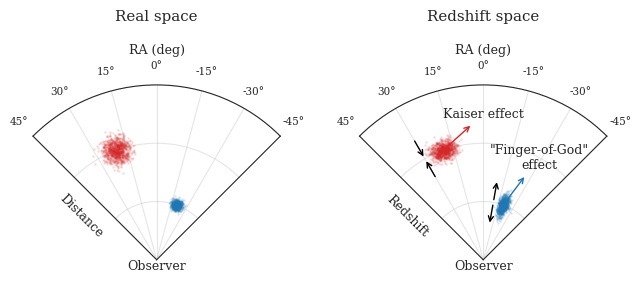

: 

In [8]:
fig = plt.figure(figsize=set_size(width=width, subplots=(1, 1), fraction=1))
gs  = gridspec.GridSpec(1, 2, figure=fig, wspace=0.1, hspace=0.1)
axes = [fig.add_subplot(gs[i], projection='polar') for i in range(2)]

for i, ax in enumerate(axes):
    ax.set_ylim(0, 0.3)
    ax.set_yticks(np.arange(0, 0.4, 0.1))
    ax.set_yticklabels([])#['%.1f' %s for s in np.arange(0, 0.4, 0.1)], va='top', ha='left')
    ax.set_theta_offset(90*np.pi/180)
    ax.set_thetamax(-45)
    ax.set_thetamin(45)
    ax.set_title('Real space' if i==0 else 'Redshift space', pad=20, size='large')
    ax.text(60*np.pi/180, 0.15, 'Distance' if i==0 else 'Redshift', ha='center', va='center', rotation=45-90)
    ax.text(0, 0.36, 'RA (deg)', ha='center', va='center', rotation=0)
    ax.text(0, 0, 'Observer', ha='center', va='top', rotation=0)

# Number of points to generate
num_points = 1000

# Center of 'clusters'
highz_center = [20*np.pi/180, 0.2]
lowz_center  = [-20*np.pi/180, 0.1]

# Covariances
highz_cov_real = [[.2, 0],
                  [0, .008]]
lowz_cov_real = [[.1, 0],
                 [0, .001]]

highz_cov_red = [[.2, 0],
                  [0, .008/2]]
lowz_cov_red = [[.1, 0],
                 [0, .001*5]]

# Plots
x, y = np.random.multivariate_normal(highz_center, np.array(highz_cov_real)*np.pi/180, num_points).T
axes[0].scatter(x, y, s=1, alpha=0.1, color='C3')
x, y = np.random.multivariate_normal(highz_center, np.array(highz_cov_red)*np.pi/180, num_points).T
axes[1].scatter(x, y, s=1, alpha=0.1, color='C3')

x, y = np.random.multivariate_normal(lowz_center, np.array(lowz_cov_real)*np.pi/180, num_points).T
axes[0].scatter(x, y, s=1, alpha=0.1, color='C0')
x, y = np.random.multivariate_normal(lowz_center, np.array(lowz_cov_red)*np.pi/180, num_points).T
axes[1].scatter(x, y, s=1, alpha=0.1, color='C0')

# Arrows indicating regions of interest in axes[1]
axes[1].annotate('Kaiser effect', xy=highz_center, xytext=(0.0, 0.25), ha='center', va='center', arrowprops=dict(facecolor='C3', edgecolor='C3', arrowstyle='<-'))
axes[1].annotate('"Finger-of-God"\neffect', xy=lowz_center, xytext=(-0.5, 0.2), ha='center', va='center', arrowprops=dict(facecolor='C0', edgecolor='C0', arrowstyle='<-'))

axes[1].annotate('', xy=(30*np.pi/180, 0.2), xytext=(30*np.pi/180, 0.24), ha='center', va='center', arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->'))
axes[1].annotate('', xy=(30*np.pi/180, 0.2), xytext=(30*np.pi/180, 0.16), ha='center', va='center', arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->'))

axes[1].annotate('', xy=(-10*np.pi/180, 0.14), xytext=(-10*np.pi/180, 0.1), ha='center', va='center', arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->'))
axes[1].annotate('', xy=(-10*np.pi/180, 0.06), xytext=(-10*np.pi/180, 0.1), ha='center', va='center', arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->'))

plt.savefig(f'images/redshift_space_distortions.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

## 2.10 LSS Fraction

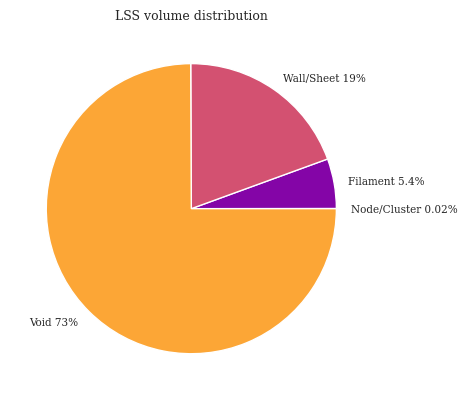

: 

In [47]:
fig = plt.figure(figsize=set_size(width=width, subplots=(1, 1), fraction=1))
gs  = gridspec.GridSpec(1, 1, figure=fig, wspace=0.1, hspace=0.1)
axes = [fig.add_subplot(gs[i]) for i in range(1)]
colors = plt.cm.plasma(np.linspace(0,0.8,4))

lss_components = ['Node/Cluster', 'Filament', 'Wall/Sheet', 'Void']
lss_volume     = [0.02, 5.4, 19, 73] #percent

axes[0].pie(lss_volume, labels=['Node/Cluster 0.02%', 'Filament 5.4%', 'Wall/Sheet 19%', 'Void 73%'], colors=colors)#, autopct='%1.1f%%', startangle=90, colors=colors)
#axes[0].legend(['Node/Cluster 0.02%', 'Filament 5.4%', 'Wall/Sheet 19%', 'Void 73%'], loc='center left', bbox_to_anchor=(1, 0.5))
axes[0].set_title('LSS volume distribution')

plt.show()

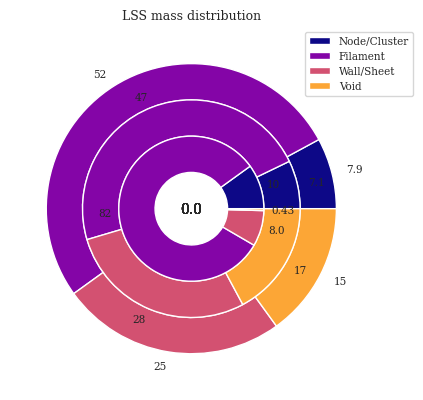

: 

In [96]:
fig = plt.figure(figsize=set_size(width=width, subplots=(1, 1), fraction=1))
gs  = gridspec.GridSpec(1, 1, figure=fig, wspace=0.1, hspace=0.1)
axes = [fig.add_subplot(gs[i]) for i in range(1)]
colors = plt.cm.plasma(np.linspace(0,0.8,4))

lss_components = ['Node/Cluster', 'Filament', 'Wall/Sheet', 'Void']

lss_mass_dm   = [7.9, 52, 25, 15]
lss_mass_gas  = [7.1, 47, 28, 17]
lss_mass_star = [10, 82, 8.0, 0.43]

size = 0.25
axes[0].pie(lss_mass_dm, radius=1, colors=colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=lss_mass_dm)

axes[0].pie(lss_mass_gas, radius=1-size, colors=colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=lss_mass_gas)

axes[0].pie(lss_mass_star, radius=1-2*size, colors=colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=lss_mass_star)

# Text with percentages inside each pie slice
for i, p in enumerate(axes[0].patches):
    percentage = '0.0'
    x = p.center[0]
    y = p.center[1]
    axes[0].text(x, y, percentage, fontsize=10, ha='center', va='center')


axes[0].legend(lss_components, loc='center left', bbox_to_anchor=(0.8, 0.9))
axes[0].set_title('LSS mass distribution')

plt.show()

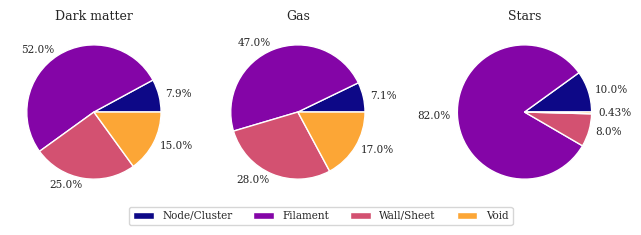

: 

In [97]:
fig = plt.figure(figsize=set_size(width=width, subplots=(2, 3), fraction=1))
gs  = gridspec.GridSpec(1, 3, figure=fig, wspace=0.1, hspace=0.1)
axes = [fig.add_subplot(gs[i]) for i in range(3)]
colors = plt.cm.plasma(np.linspace(0,0.8,4))

lss_components = ['Node/Cluster', 'Filament', 'Wall/Sheet', 'Void']

lss_mass_dm   = np.array([7.9, 52, 25, 15])
lss_mass_gas  = np.array([7.1, 47, 28, 17])
lss_mass_star = np.array([10, 82, 8.0, 0.43])

axes[0].pie(lss_mass_dm, colors=colors, labels=[f"{s}%" for s in lss_mass_dm])
axes[0].set_title('Dark matter')

axes[1].pie(lss_mass_gas, colors=colors, labels=[f"{s}%" for s in lss_mass_gas])
axes[1].set_title('Gas')

axes[2].pie(lss_mass_star, colors=colors, labels=[f"{s}%" for s in lss_mass_star])
axes[2].set_title('Stars')

fig.legend(lss_components, loc='center', ncols=4, bbox_to_anchor=(0.5, 0.1))

plt.savefig(f'images/lss_mass_distribution.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

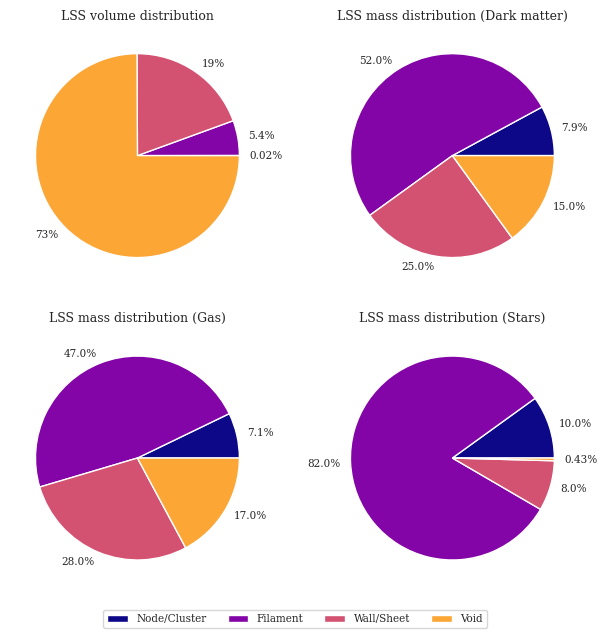

: 

In [18]:
fig = plt.figure(figsize=set_size(width=width, subplots=(1.5, 1), fraction=1))
gs  = gridspec.GridSpec(2, 2, figure=fig, wspace=0., hspace=0.1)
axes = [fig.add_subplot(gs[i]) for i in range(4)]
colors = plt.cm.plasma(np.linspace(0,0.8,4))

lss_components = ['Node/Cluster', 'Filament', 'Wall/Sheet', 'Void']
lss_volume     = [0.02, 5.4, 19, 73] #percent
lss_mass_dm    = np.array([7.9, 52, 25, 15])
lss_mass_gas   = np.array([7.1, 47, 28, 17])
lss_mass_star  = np.array([10, 82, 8.0, 0.43])

axes[0].pie(lss_volume, labels=[f"{s}%" for s in lss_volume], colors=colors)#, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('LSS volume distribution')

axes[1].pie(lss_mass_dm, colors=colors, labels=[f"{s}%" for s in lss_mass_dm])
axes[1].set_title('LSS mass distribution (Dark matter)')

axes[2].pie(lss_mass_gas, colors=colors, labels=[f"{s}%" for s in lss_mass_gas])
axes[2].set_title('LSS mass distribution (Gas)')

axes[3].pie(lss_mass_star, colors=colors, labels=[f"{s}%" for s in lss_mass_star])
axes[3].set_title('LSS mass distribution (Stars)')

fig.legend(lss_components, loc='center', ncols=4, bbox_to_anchor=(0.5, -0.05))

plt.savefig(f'images/lss_distribution.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

## 2.11 Galaxy templates

In [ ]:
cww_templates = {'E': pd.read_csv('_data/galaxy_templates/CWW_KINNEY/CWW_E_ext.sed', delim_whitespace=True, comment='#', names=['Wavelength', 'Flux']),
                 'Im': pd.read_csv('_data/galaxy_templates/CWW_KINNEY/CWW_Im_ext.sed', delim_whitespace=True, comment='#', names=['Wavelength', 'Flux']),
                 'Sbc': pd.read_csv('_data/galaxy_templates/CWW_KINNEY/CWW_Sbc_ext.sed', delim_whitespace=True, comment='#', names=['Wavelength', 'Flux']),
                 'Scd': pd.read_csv('_data/galaxy_templates/CWW_KINNEY/CWW_Scd_ext.sed', delim_whitespace=True, comment='#', names=['Wavelength', 'Flux'])}

cww_templates_norm = {key: value['Flux']/np.max(value['Flux']) for key, value in cww_templates.items()}

: 

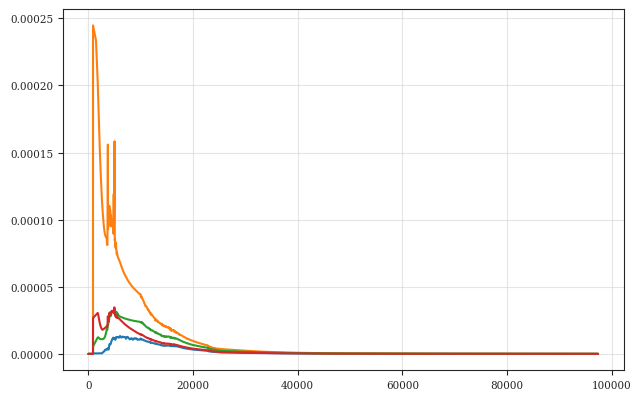

: 

In [6]:
fig = plt.figure(figsize=set_size(width=width, subplots=(1, 1), fraction=1))
gs  = gridspec.GridSpec(1, 1, figure=fig, wspace=0.1, hspace=0.1)
axes = [fig.add_subplot(gs[i]) for i in range(1)]

for key, value in cww_templates.items():
    axes[0].plot(value['Wavelength'], value['Flux'], label=key)

## 2.12 Softmax vs GumbellSoftmax

In [4]:
import torch

: 

In [ ]:
random_values_weight = np.random.rand((5))

: 

In [69]:
gumbell_softmax = torch.nn.functional.gumbel_softmax(torch.tensor(random_values_weight), tau=1)
normal_softmax  = torch.nn.functional.softmax(torch.tensor(random_values_weight*5), dim=0)

print(normal_softmax)

tensor([0.3454, 0.3947, 0.1592, 0.0091, 0.0916], dtype=torch.float64)


: 

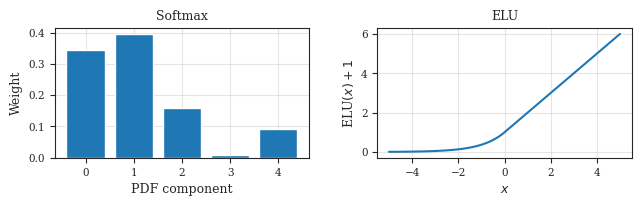

: 

In [72]:
fig = plt.figure(figsize=set_size(width=width, subplots=(1, 2), fraction=1))
gs  = gridspec.GridSpec(1, 2, figure=fig, wspace=0.1, hspace=0.1)
axes = [fig.add_subplot(gs[i]) for i in range(2)]

axes[0].bar(np.arange(5), normal_softmax)

axes[1].plot(np.linspace(-5, 5, 100), torch.nn.functional.elu(torch.tensor(np.linspace(-5, 5, 100)))+1)

axes[0].set_title('Softmax')
axes[1].set_title('ELU')

axes[0].set_xlabel(r'PDF component')
axes[0].set_ylabel('Weight')

axes[1].set_xlabel(r'$x$')
axes[1].set_ylabel(r'ELU$(x)+1$')

plt.savefig(f'images/gumbel_softmax_elu.{saveformat}', dpi=288, bbox_inches='tight')

## 2.13 Laerte fit

In [31]:
r_lim = [19.0, 19.3, 19.5, 19.8, 20.0, 20.3, 20.5, 20.8, 21.0, 21.3, 21.5, 21.8, 22.0]
l     = [0.203, 0.215, 0.225, 0.230, 0.253, 0.265, 0.291, 0.310, 0.319, 0.328, 0.341, 0.347, 0.359]

r_lim_fit = [18.9, 22.1]
l_fit     = [0.190, 0.380]

#

l_r = [0.200, 0.211, 0.220, 0.229, 0.250, 0.266, 0.292, 0.310, 0.319, 0.331, 0.341, 0.350, 0.362]
k_r = [2.23, 2.28, 1.91, 2.08, 2.31, 2.47, 2.74, 2.87, 2.85, 2.57, 2.44, 2.28, 2.15]

l_r_fit = [0.192, 0.369]
k_r_fit = [2.19, 2.59]

: 

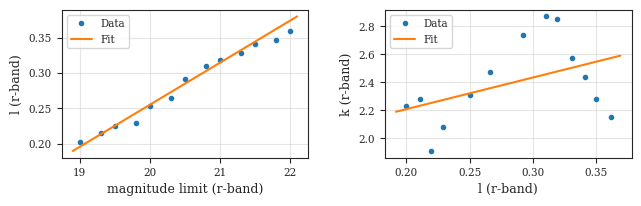

: 

In [40]:
fig = plt.figure(figsize=set_size(width=width, subplots=(1, 2), fraction=1))
gs  = gridspec.GridSpec(1, 2, figure=fig, wspace=0.1, hspace=0.1)
ax  = [fig.add_subplot(gs[i]) for i in range(2)]

ax[0].plot(r_lim, l, '.', label='Data')
ax[0].plot(r_lim_fit, l_fit, label='Fit')
ax[0].set_ylabel('l (r-band)')
ax[0].set_xlabel('magnitude limit (r-band)')

ax[1].plot(l_r, k_r, '.', label='Data')
ax[1].plot(l_r_fit, k_r_fit, label='Fit')
ax[1].set_ylabel('k (r-band)')
ax[1].set_xlabel('l (r-band)')

ax[0].legend()
ax[1].legend()

plt.savefig(f'images/laerte_fit.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

## 2.13 Stripe82 photo-z

In [75]:
s82_result = pd.read_csv('_data/2024-10-30/train/s82_20241030.csv')

: 

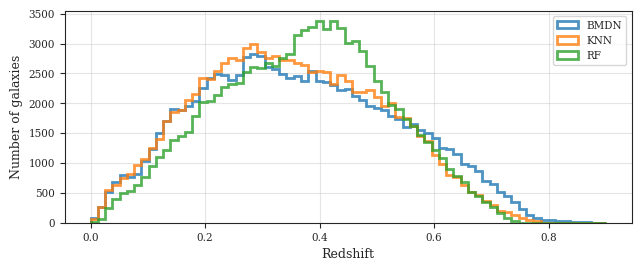

: 

In [77]:
fig = plt.figure(figsize=set_size(width=width, subplots=(1, 1.5), fraction=1))

plt.hist(s82_result['zml'], bins=71, color='C0', histtype='step', alpha=0.8, lw=2, range=(0, 0.9), label='BMDN')
plt.hist(s82_result['zknn'], bins=71, color='C1', histtype='step', alpha=0.8, lw=2, range=(0, 0.9), label='KNN')
plt.hist(s82_result['zrf'], bins=71, color='C2', histtype='step', alpha=0.8, lw=2, range=(0, 0.9), label='RF')
plt.legend()

plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')

plt.savefig(f'images/s82_redshifts.{saveformat}', dpi=288, bbox_inches='tight')
plt.show()

: 